# Resume Mining Using Natural Language Processing

Natural language processing is a branch of artificial intelligence and computational linguistics. It can be defined as the process which is involved in the interaction between a computer and natural language i.e the language spoken by humans. It is directly related to the field of human-computer interaction. Now that natural language processing is properly 
defined, we will be using the following constraints of NLP to parse the information from the resumes.

## Stages of Natural Language Processing

* Morphology & Phonetic
* Semantic Analyis
* Syntatic Analysis
* Lexical Analysis
* Pragmetic Analysis
* Discourse

## 1. Problem Statement

Natural language processing is tools for processing the Natural language. It's process for automatic manipulating of natural language, like speech and text processing by a software.Every Organization have a recuitement process in which they need to they have to filter or short list the top ranked candidates from a long list of candidates and that is a very very time consuming process. To solve this problem a tool called NLP come into play and rank  the candidate profile based on their skills, expericnce and education.Recuitement Agencies and corporate companies numerous resumes daily, which is very tedious and time consuming task.Our purpose is to design a model that can parse information from unstractured resumes and transform it to a strractured JSON format, Also, Present the extracted resumes to the employer, based on the job description.


## 2. INTRODUCTION

Every Goverment, Semi-governement and private organization have go through a recuitement process to hire an talent which fillfill the job desription, which is a very tedious and time comsuming.If there are thousands resumes for human to process and sortlist top 10 resumes.It will takes days or months to process and also need filed specilization for which candidate is going to be hired. There should be an automated intelligent system will take all unstractured resume and extract the useful information from resumes and also can rank the resumes on the based of job description.Parsed Infromation Inclue name, email, contact number, social profile, personal website, years of work experience, education,publications, certifications and keywords. We will perform some text precessing techniques on parsed resumes and save into csv or json format and perform and show results from that results into graphical format. Finally we will train a machine learning model and check the accuracy of our model.

## 3. Data Collection and Preprocessing

Data collection and preprocessing is the first and forest step of Natural language processing project.Data Pre-processing is the technique of data minnig which transform raw data into a comprehensive format. Data from the real world is mostly inadequate conflicting and contains innumerable errors. We are collecting the resumes from differnt resurces for the purpose of learning. like open course already collected and pre-processed and saved in json or csv format.
Data is passed through a series of steps in following sequences.


In [1]:
#import Necessary libraries
import io
import os
import re
import nltk
import numpy as np
import pandas as pd
import docx2txt
from datetime import datetime
from dateutil import relativedelta
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFSyntaxError
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import constants as cs
import spacy

### Parse PDF Document

    Helper function to extract the plain text from .pdf files
    param pdf_path: path to PDF file to be extracted (remote or local)
    return: iterator of string of extracted text

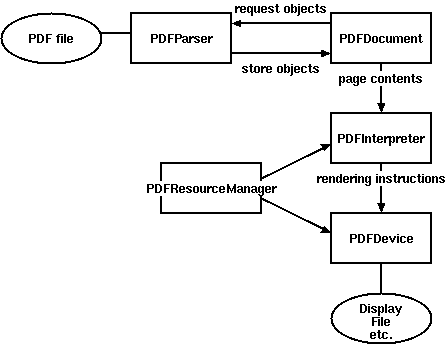

In [2]:
from IPython.display import Image
Image(filename='objrel.png') 
#https://www.unixuser.org/~euske/python/pdfminer/programming.html

In [3]:
def extract_text_from_pdf(pdf_path):
 
    # https://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
    if not isinstance(pdf_path, io.BytesIO):
        # extract text from local pdf file
        with open(pdf_path, 'rb') as fh:
            try:
                for page in PDFPage.get_pages(fh,caching=True,check_extractable=True):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(resource_manager,fake_file_handle,codec='utf-8',laparams=LAParams())
                    page_interpreter = PDFPageInterpreter(resource_manager, converter)
                    page_interpreter.process_page(page)
                    text = fake_file_handle.getvalue()
                    yield text
                    #return text

                    # close open handles
                    converter.close()
                    fake_file_handle.close()
            except PDFSyntaxError:
                return
    else:
        # extract text from remote pdf file
        try:
            for page in PDFPage.get_pages(pdf_path,caching=True,check_extractable=True):
                resource_manager = PDFResourceManager()
                fake_file_handle = io.StringIO()
                converter = TextConverter(resource_manager,fake_file_handle,codec='utf-8',laparams=LAParams())
                page_interpreter = PDFPageInterpreter(resource_manager,converter)
                page_interpreter.process_page(page)
                text = fake_file_handle.getvalue()
                yield text 
                #return text
                # close open handles
                converter.close()
                fake_file_handle.close()
        except PDFSyntaxError:
            return

In [4]:
#test our function
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    pdf_obj = extract_text_from_pdf(path) 
    text=''
    for page in pdf_obj:
        #help(page)
        text += ' '.join([line.replace('\t', ' ') for line in page.split('\n') if line]) 
    print(text)
    print('----------------------------')

    Contact mohamednassar2016@gmail.com www.linkedin.com/in/ mohamednassar96 (LinkedIn) Top Skills Computer Vision Data Analysis Natural Language Processing (NLP) Certifications twitter hall of fame Microsoft Hall of fame Microsoft Students Stars Competition Yahoo hall of fame   Mohamed Nassar Machine Learning Team Lead at Synapse Analytics|MSc Candidate in Computer Communication Engineering at Cairo University | AI Instructor Giza Summary - AI Team Lead with 3 years of experience in Computer Vision and Natural Language Processing handling the whole pipeline of design, development, testing, and deployment into production. Currently, Leading Azka-OCR Division in Synapse Analytics. Azka- OCR is involved in Arabic Documents end-to-end analysis through Document Detection, Layout Analysis, Text Extraction, OCR, and finally Information Extraction. Optical mark recognition (OMR) - AI instructor. Experience Synapse Analytics 2 years 1 month Machine Learning Team Lead May 2021 - Present (8 mont

    Contact egypt 01149948099 (Mobile) ahmedfathi520@gmail.com www.linkedin.com/in/ahmed- fathi-382441133 (LinkedIn) Top Skills Web Development Design Graphics Certifications Certificate of completion - Introduction to Data and Data Science   Ahmed Fathi data science enthusiast || civil engineer || future data scientist Giza Summary Hello, I Am Ahmed Fathi Front End Developer Develop Myself Experience I Work In Front-End Web Development, And I Have Experience In Dealing With Programming And Modern Web Technologies, And I Have Built A Lot Of Projects That Have Increased My Experience And Trained A Lot, I Am A Fast Learner And Always Love To National Telecommunication Institute (NTI) Student October 2021 - Present (3 months) PETROJET Trainee June 2019 - August 2020 (1 year 3 months) worked as a trainee civil engineer in somid project  Education technology  technical, Computer Systems Networking  · (2013 - 2015) Ain Shams University Bachelor's degree, Civil Engineering · (2015 - 2020) Nat

Contact 6 october, giza 01113709072 (Mobile) redamahmoud722@gmail.com www.linkedin.com/in/ mahmoud3899 (LinkedIn) github.com/MAHMOUDRR707 (Personal) Top Skills Leadership Arduino Electronics Certifications Convolutional Neural Networks HCIA-AI Structuring Machine Learning Projects Computer Vision Basics Introduction to Internet of things       Mahmoud Reda Machine Learning Engineer Cairo Summary Majoring in Computer Engineering, a technology and science enthusiast with the ability to learn rapidly and cooperate. Very flexible and willing to be pushed to the limits when it comes to working. Ex-intern at DevisonX as well as YAT both worked as a software engineer as Machine Learning Engineer and Mobile Android Developer.. Experienced in student activities as being a DSC founder , Member at IEEE ZSB CS and  vice chairman at IEEE ZSB RAS.  Experience Omdena Junior Machine Learning Engineer May 2021 - July 2021 (3 months) Egypt Spurwing Software Engineer Intern March 2021 - April 2021 (2 mon

----------------------------
      Contact amrelagoz@outlook.com www.linkedin.com/in/amrelagoz (LinkedIn) Certifications AWS Machine Learning Foundations Intermediate Python Introduction to Data Visualization with Plotly in Python Amr El Agoz Artificial Intelligence Intern at ITI | Machine Learning Engineer | Embedded Systems Engineer Egypt Summary Fresh graduate embedded systems engineer, worked with various platforms and programming languages including: Introduction to Python Microcontrollers: AVR, Tiva C LaunchPad, STM32F4xx, ESP8266 Introduction to Statistics in Python NodeMCU Programming languages: C, C++, Python Tools: Eclipse IDE, KEIL IDE, Atmel Studio >Also worked with machine learning and communication protocols such: Analysis) Machine learning algorithms: Linear Regression, Logistic Regression, SVM (support vector machine), K-Means Clustering, ANN (Artificial Neural Networks), PCA (Principal Component Communication protocols: MQTT, HTTP  Platforms: AzureML, Adafruit, IFTTT  

Contact 00201003371334 (Mobile) fakhri100@gmail.com www.linkedin.com/in/ fakhraddinalwajih (LinkedIn) Top Skills SQL C# Machine Learning Languages English (Professional Working) Arabic (Native or Bilingual) Certifications Big Data Engineer - Explorer Award for Students 2018 Machine Learning Using SAS Viya Big Data Engineer - Mastery Award for Students 2018 Deep Learning Specialization OFSAA - Financial Crime and Compliance Management (FCCM) Solution Engineer Specialist       Fakhraddin Alwajih Data Scientist at Ibtikar Technologies Egypt Experience Ibtikar Technologies Data Scientist July 2021 - Present (6 months) DataGear 4 years 8 months Data Scientist January 2020 - Present (2 years) ETL Developer May 2017 - December 2019 (2 years 8 months) Faculty of Computers and Information - Cairo University PhD Candidate February 2017 - Present (4 years 11 months) Giza, Al Jizah, Egypt Ibb University Software Engineer | Assistant Lecturer April 2014 - April 2017 (3 years 1 month) Ibb, Yemen MTN

Contact Egypt, Alexanderia 01062860476 (Mobile) Islam.Elsayed101@gmail.com www.linkedin.com/in/islam- elsayed-8a19a2180 (LinkedIn) Top Skills Machine Learning data scientist Artificial Intelligence (AI) Certifications Applied Plotting, Charting & Data Representation in Python Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization Convolutional Neural Networks Applied Machine Learning in Python Machine Learning       Islam Elsayed AI trainee at ITI | Machine learning engineer | Machine learning intern at Tekomoro Alexandria Summary I love writing code. Ever since writing my first program in python and manipulating it to produce a desired output, I have been obsessed with the idea of using software to solve practical problems. I believe in the power of programming to transform and improve the lives of people around the world. I am a data scientist, I graduated from faculty of electronic engineering computer science department. I love programming. I have ve

      Ahmed Salama Data Scientist ةرهاقلا زجوم لاصتالا Egypt, Cairo +201285322814 (Mobile) salama4ai@gmail.com www.linkedin.com/in/salama4ai (LinkedIn) kaggle.com (Portfolio) hackerrank.com (Portfolio) تاراهملا لضفأ Python AI I'm extremely enthusiast about Data Science and seeks to work remotely as a Data Scientist,(Kindly check my sample code on  kaggle.com/salama4ai   hackerrank.com/salama4ai)  that illustrate my experience in Python3, MySQL, Numpy, Pandas, Machine Learning Matplotlib, Scikit learn, PyTorch,  also please find my attached CV for more information ميلعتلا Cairo University Arab academy Master of Science - MS, Artifitial intellegence   · (2016 - 2021) Bachelor of Science - BS, Electronic & Electrical Engineering Page 1 of 1 
----------------------------
    Contact sheharyarasif121@gmail.com www.linkedin.com/in/sheharyar- asif-22b970198 (LinkedIn) Top Skills Machine Learning Deep Learning Certifications Neural Networks and Deep Learning  A learner with a can do attitude,

### Parse Word Document

Extract text from document take document path and extract text from it using docx2text library

In [5]:
## Extract text from word document
def extract_text_from_docx(doc_path):
    '''
    Helper function to extract plain text from .docx files

    :param doc_path: path to .docx file to be extracted
    :return: string of extracted text
    '''
    try:
        temp = docx2txt.process(doc_path)
        text = [line.replace('\t', ' ') for line in temp.split('\n') if line]
        return ' '.join(text)
    except KeyError:
        return ' '


In [6]:
## test for single resume
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\DocFiles'):
    #print(resume)
    path='DocFiles/'+resume
    print(path)
    raw_text = extract_text_from_docx(path) 
    print(raw_text)
    print('----------------------------')

DocFiles/asif cv-converted.docx
Asif Ali  Father Name: Abdul Rasheed  Phone No. 0303-0400209  CNIC 35405-0495250-9  Mailing Address: Gulshan Zafar Colony Tehsil Muridke Dist. Sheikhupura Date of Birth: 15 August 1998  Nationality: Pakistani  Religious: Islam  Marital Status: Single  Gender: Male   Objective:  To seek a challenging career in a dynamic organization with opportunities of learning, development and rapid growth in competitive, professional and team oriented environment. Possess ‘can-do’ aggressive approach towards job assignments. Believe in hard work, responsible, reliable, social and cooperative person.   Qualification:  Sr.# Degree Subject Institute/ Board Year 1. BA (General Group) General Allama Iqbal Open University Islamabad 2019 2. FA General Bise Lahore 2017 3. Matric (science Group) Science subject with bio Bise Lahore 2014   Experience:   2 years experience of Embroidery Designer at Pearl embroidery.  2 years experience of Embroidery Designer at Ghousia embroider

DocFiles/CVTANVIRAKHTARMUHAMMADIKHLAQKHAN.docx
To work pragmatically in an organization where I can show my talent and enhance my skills to meet company goals and objectives with full integrity and zest. To build a challenging career with honesty and loyalty by translating my experience ,knowledge,skills and abilities into value for  an organization TANVIR AKHTAR +923051366447 tanvirakhtar240@gmail.com Address: H-E/967 Ghazi Road Ferozpure Road Lahore EXPERIENCE  PHP /LARAVEL NOC (KING REVOLUTION) EDUCATION Bachelor of information technology   (BSIT) In 2020 CERTIFICATION Web development from VTI  Web development from brain college of Lahore. TECHNICAL SKILLS PHP  Frontend Development Networking(NOC)     BASIC Java And OOP Concept Microsoft office MS WORD MS EXCEL MS POWERPOINT Call Center  Operating System(Window /Linux) COMPUTER TEACHER MATRIC INTERMEDIATE A LEVEL/O LEVEL HIGHLIGHTS Results-oriented  Business development Effective marketing Organizational capacity Operability and com

 
----------------------------
DocFiles/ResumeRizwanKhaliq.docx
RIZWAN KHALIQ BHUTTO COLONY JOIYAWALA MORE SHEIKHUPURA, SHEIKHUPURA LAHORE. +923123406304 rizimalik304@gmail.com  I am very organized and punctual person. I have the ability to communicate and work with other members of a group and organization. I am seeking a unique opportunity in the extensive field of computer networks , android web development or IT to gain industry experience and polish skills in the respective fields. Education March 2016 – January 2020 Bechloars of science in Telecommunication & Networking, Comsats University Islamabad,Abbottabad Campus GPA:2.8/4 2013-2015 FSc in computer Science, B.i.s.e lahore Marks:591/1100 2011-2013 Metric, B.i.s.e lahore Marks:786/1050 Certifications CCNA Routing & Switching (200-125) Skills OOP ( Java  ) C++ HTML  CSS PHP Javascript  Bootstrap experience and achievement   I have very good knowledge in java , c++ and android programming  I done my final year project in android 

In [7]:
## generalized method with extract text from files , .pdf,.docx and .doc file,
def extract_text(file_path, extension):
    '''
    Wrapper function to detect the file extension and call text
    extraction function accordingly

    :param file_path: path of file of which text is to be extracted
    :param extension: extension of file `file_name`
    '''
    text = ''
    if extension == '.pdf':
        for page in extract_text_from_pdf(file_path):
            #text += ' ' + page
            text =' '.join([line.replace('\t', ' ') for line in page.split('\n') if line])
    elif extension == '.docx':
        text = extract_text_from_docx(file_path)
    elif extension == '.doc':
        text = extract_text_from_doc(file_path)
    return text

In [8]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    

EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY  SOFTWARE LABS. Web Development I have worked in virtual  university lab as a web  Development Trainee  and have learned a  variety of languages  like,  HTML,CSS,BOOTSTRA P,PHP,LARAVEL BS Software  Engineering VIRTUAL UNIVERSTY  OF PAKISTAN ,LAHOR E INTERESTS   Interest LEARNING NEW SKILLS  Interest READING NOVELS PROJECTS 2020 COLONY RECORD  MANAGEMENT I have done my final year  web based project in  which i have made colony  record management a web  based application by using  different type of tools like, HTML,CSS,BOOTSTRAP, JAVASCRIPT,PHP,MYSQL LIST OF PROJECTS I HAVE  BEEN DONE!  SAHULAT HOME FOOD   ONLINE DOCTOR SEARCH AND  APPOINTMENT SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER EDUCATION 2020 PROFILE Highly motivated BSSE graduate with a strong  foundation in software developing and programing  principles. proficient in a variety of platforms and  languages with an innate ability to learn and master new  technologies. SKILLS Front_end 

• PHP • Laravel • VueJS • WordPress • Git • Bootstrap • HTML5 • CSS3 • JavaScript • MySQL • Mongo DB • Adobe Photoshop 
FORMAL EDUCATION MCS (Continue) Superior University BSC University of Punjab F.Sc SSC Pre-Engineering Leadership College Science Al-Falah School TECHNICAL SKILLS Hafiz Muhammad Saad Shahid CAREER OBJECTIVE Seeking for a challenging position in an organization that will allow me to display my experience and good problem solving skills to make a company grow  by solving their problems.Looking forward to use my skills for the betterment of the company and to  increase my pottential as well.  House # 634, Street # 17,  Gulistan Colony, Dharam- -pura ,Lahore Phone +92 324 4113048 sdshahid033@gmail.com CERTIFICATION FULLSTACK WEB-DEVELOPMENT From PNY PHP & LARAVEL From EVS URDU ENGLISH 
Sadia Shahbaz   +92-3344846360                     sadiashahbaz54@gmail.com              https://www.linkedin.com/in/sadia-shahbaz-679911115  Computer Science Student with fundamental know

RESUME OF LEIGH WILLIAM BRADBURY  LCDR  Leigh  W.  Bradbury was  born  In  Fremont,  Nebraska  on  November  8,  1948.  He  received  a  Bachelor  of  Science  degree  in  Aeronautical  Tech  nology  from  Arizona  State  University  In  1970  and  a  Masters  of  Science  degree  in  Computer  Science  from Corpus Christi State University in 1985.  Following  graduation  from  Arizona  State  Uni  versity,  he  worked  as  a  civilian  flight  Instructor  for  the  Air  Force  before  entering  the  Navy  in  May  1972.  _He  was  commissioned  on  September  15,  1972  through  the  Aviation  officer  Candidate  Pro  gram.  He  earned  his wings  as  a  Naval  Flight  Officer  on February 23, 1973.  Upon  completion  of  flight  training,  He  reported  to  VA-128  training  as  an  A-6  Bombar  dier/Navigator  and  then  to  VA-145  for  duty.  As  signed  to  VA-145,  he  completed  two  Pacific  deploy  ments aboard USS RANGER.  for  In April  1976 LCDR  Bradbury was  assigned to 

  References        Ilya Kolmanovsky, Professor, Department of Aerospace Engineering, University of Michigan  3038 FXB Building, 1320 Beal Avenue, Ann Arbor, MI 48109-2140, USA  Tel: +1-734-615-9655        E-mail: ilya@umich.edu        Jing Sun, Professor, Department of Naval Architecture and Marine Engineering/ Department of  Electrical Engineering and Computer Science, University of Michigan  211 NA&ME Building, 2600 Draper Road, Ann Arbor, MI 48109-2145, USA  Tel: +1-734-615-8061        E-mail: jingsun@umich.edu  Marcello Romano, Associate Professor, Department of Mechanical and Aerospace Engineering,  Naval Postgraduate School   340 Watkins Hall, 877 Dyer Rd, Monterey, CA 93943, USA         Tel: +1-831-656-2885        E-mail: mromano@nps.edu  Philip Stone, Senior Research and Development Engineer, GE Energy Power Conversion Naval  Systems Inc.   610 Epsilon Drive, Pittsburgh, PA 15238, USA  Tel: +1-412-963-3090        E-mail: philip.stone@ge.com     In-Seuck  Jeung,  Professor,  D

      October 2017 - 2018 (1 year) Lahore  Self-employed Oracle Developer October 2017 - November 2017 (2 months) Pakistan Education National University of Computer and Emerging Sciences MS(CS), Computer Science · (2018 - 2021) Government  College University, Faisalabad Bachelor's degree, Computer Science · (2013 - 2017) Punjab Group Of College Intermediate, F.Sc (Pre-Engineering) · (2011 - 2013) Page 2 of 2 
      Bachelor of Engineering - BE, Computer Engineering · (2012 - 2018) Page 2 of 2 
    لاصتالا ak4410040@gmail.com www.linkedin.com/in/ahmed- khaled-sedkey-1565201ab (LinkedIn) تاراهملا لضفأ analysis data science machine learning model   Ahmed khaled Sedkey #training data science in epsilon # machine learning engineering اينملا زجوم I'm Ahmed, I learned Python ,numpy,pandas, data cleaning, data visualization, data analysis, data preprocessing, remove missing data,machine learning model ميلعتلا Minia University Udacity student, data science · (2019 - 2023) Training , Data anal

      The Accelerator has been developed for those who want a more intensive entrepreneurial experience.  This accelerator empowers me with the tools i need to grow my business and provide me with the skills that makes me better entrepreneur and leader. The Accelerator have accessed : - Legal services - Financial services - Mentoring /coaching - Entrepreneurship training - B2B linkage broaden my learning experience. INJAZ Egypt Injaz Startup Program November 2013 - April 2014 (6 months) American University in Cairo And this has lined me with the key business contacts, develop my skills, and This is a competition between entrepreneurs to choose the best 20 startups that participated in the program from egypt. Me and my team has been chosen in between the best 34 startups that arrived the semi-finals. it is a great chance to learn more and more about entrepreneurship. we have training in many fields such as business model canvas ,financial planning ,marketing, digital marketing , team bu

      Education University of Management and Technology - UMT Master's degree, Project Management · (2018 - 2020) University of Management and Technology - UMT Bachelor's degree, Computer Software Engineering · (2012 - 2016) Page 3 of 3 
      Contact House no.136 Street no. 10 Tariq Abad Ichra, Lahore. 03244596515 (Mobile) babar.shakeel515@gmail.com Babar Shakeel .NET Framework | .Net Core | SQL Server | MySQL | PowerBI | Grow.com | Talend | SmarterAsp | IIS | Javascript | React-Native Lahore District www.linkedin.com/in/babar-shakeel (LinkedIn) Summary Top Skills Microsoft Power BI Databases React Native I am very enthusiastic to start my career within a vibrant and providing excellent opportunities to prove my worth and to utilize my maximum extent. I am quite sure that with my hard work and progressive organization, skills to the dedication, I’ll prove myself an asset for the firm. Experience i3RL Private Limited Software Engineer November 2021 - Present (2 months) Lahore, Punjab,

    Contact abdelrhmanmohsen777@gmail.c om www.linkedin.com/in/abdelrhman- mohsen-5a9821204 (LinkedIn) Top Skills Microsoft Excel Analytical Skills R (Programming Language) Languages Arabic (Native or Bilingual) English (Native or Bilingual) German (Limited Working) Certifications Google Data Analytics Certificate What is Data Science? Certificate of achievement - Data Analyst Introduction to Python Data Cleaning and Preprocessing with pandas   Abdelrhman Mohsen Data Analyst Cairo Summary A Data Analyst who is experienced with collecting, transforming, and organizing data for analysis to help make informed decisions. Excellent understanding and proficiency of platforms for effective data analyses, including R, spreadsheets, Tableau, and SQL. Strong analytical and organizational skills. Recently completed the Google Data Analytics Certificate-a beautiful hands-on program that covers the entire scope of the data analysis process. Experience Symbios Account Executive February 2021 - Octob

      Mercantile exchange of Pakistan Human Resources Manager(internships) September 2017 - December 2017 (4 months) Lahore, Punjab, Pakistan Directorate general public relation(DGPR) Human Resources Administrative Assistant January 2017 - July 2017 (7 months) Lahore District, Punjab, Pakistan Education University Of Central Punjab MSc, Mass Communication/Media Studies · (2016 - 2018) University Of Central Punjab Msc, Mass Communication/Media Studies · (2016 - 2018) Page 2 of 2 
    Contact Alexandra 01286 948317 (Mobile) mohamedhassan201055@gmail.c om www.linkedin.com/in/ engmohamedhassan20 (LinkedIn)   Mohamed Hassan Al-Pro Scholarship Trainee at Information Technology Institute (ITI) powered by EPITA Alexandria Experience Information Technology Institute (ITI) Software Engineer Page 1 of 1 
      Minia University Bachelor's degree, Computer Science · (2011 - 2015) Page 2 of 2 
      Contact afnanmabdultwab@gmail.com www.linkedin.com/in/afnan- mohamed-4728bb1b9 (LinkedIn) Afnan Mo

      The Artificial Intelligence Professional (AI-Pro) program is a 9-month post- graduate professional training program in Machine Learning and Artificial Intelligence. The program provides a unique learning experience with a balance between theoretical foundations, practical tools, and applications. The program is developed in partnership with the French Graduate School of Computer Science and Advanced Technologies (EPITA). Education Monoufia University Good  · (October 2015 - June 2019) Page 3 of 3 
      Contact yousefessamjoe@gmail.com www.linkedin.com/in/yousef- essam-420463211 (LinkedIn) Yousef Essam IBM Data Science Certified | Data Science Trainee at IBM Giza Summary Python (Programming Language) learning ,Data Science , Cloud Computing and have good I am a computer science student who interested in Machine experience in C++ , Java ,Python , Dart , Problem Solving and Eager to learn new technologies Top Skills oop Data Science Languages English Arabic Certifications Foundati

      Hossam Hassan AI | Machine Learning Cairo Education Kafr El-Sheikh University Bachelor's degree, Computer Science Contact KafrElsheikh 01001641719 (Mobile) HosamHasan667666@gmail.com www.linkedin.com/in/hossam- hassan-0017571b8 (LinkedIn) Top Skills Data Science Machine Learning Algorithms Data Visualization Certifications Egypt FWD Data Analysis Challenger Track   Machine Learning Neural Network and Deep learning Structuring Machine Learning Projects Page 1 of 1 
Contact asmaa.mohy.354@gmail.com www.linkedin.com/in/asmaa- mohy-72b8181a9 (LinkedIn) github.com/Asmaa-Mohy (Other) www.kaggle.com/asmaamohy/ account (Other) www.youracclaim.com/users/ asmaa-mohy/badges (Other) Top Skills Research Data analysis Microsoft Office Certifications Artificial Intelligence V2 Machine Learning V2 IBM Watson V3 Artificial Intelligence Analyst 2020 - Explorer Award Watson Machine Learning V2       Asmaa Mohy AI and Machine learning trainee at ITI ( 9 month) Cairo Ai and machine learning engineer

      Education Modern Academy Maadi Bachelor's degree, Computer Science · (2017 - 2021) Page 2 of 2 
    لاصتالا 01157173830 (Mobile) hanyabdousaadhussien@gmail. com www.linkedin.com/in/hany- abdou-731b831a1 (LinkedIn) تاراهملا لضفأ data structure Java C++ Certifications Artificial Intelligence V2 Data Analysis Professional Nanodegree HCIA-Big Data Database Fundamentals Coding Intro   Hany Abdou Undergraduate CS | Data science and ML Enthusiast ةرهاقلا Artificial Intelligence and data science researcher, a trainee at IBM and Huawei ICT Academy, a junior problem solver at ACM Egypt. زجوم ةربخلا Huawei ICT Academy-Egypt Data Science Trainee روهش 4) ٢٠٢٠ ربمتبس‏ - ٢٠٢٠ وينوي‏) Cairo, Egypt ميلعتلا Luxor University Student, Computer Science · (2018 - 2022) Page 1 of 1 
      BSCS, Computer and Information Sciences and Support Services · (2017 - 2021) Page 3 of 3 
      Fatima Imran || Web developer || Faisalabad District Experience Iconsols Intern September 2021 - Present (4 months) Fa

      Amr Atef Data analyst Cairo Summary Contact amratef390@gmail.com www.linkedin.com/in/amr- atef-665336151 (LinkedIn) Top Skills SQL pandas Python (Programming Language) Seeking a suitable position that utilizes my courses and technical skills to fulfills my personal ambition and increase my knowledge through working in a creative and productive development team that aims to meet the organization's and customer's requirements and Languages satisfaction. ةيبرعلا (Native or Bilingual) English (Limited Working) Education Minufiya University Faculty of computers and information Bachelor , Computer Science · (2014 - 2018) Page 1 of 1 
      Bachelor's degree, Architecture · (September 2016 - July 2021) Page 2 of 2 
      The Artificial Intelligence Professional (AI-Pro) program is a 9-month post- graduate professional training program in Machine Learning and Artificial Intelligence. The program provides a unique learning experience with a balance between theoretical foundations, pract

      Faculty of Electronic Engineering, Menoufia University Bachelor's degree, Computer Science · (2015 - 2020) Page 2 of 2 
    Experienced Developer with a demonstrated history of working in the computer software industry. Skilled in  Management, Data Analytics, and Data Analysis. Strong engineering professional with a Bachelor's degree focused in Computer Programming, Specific Applications Languages from assuit university. Contact ahmedayman.aa191@gmail.com www.linkedin.com/in/ahmed- ayman-a29a38130 (LinkedIn) Top Skills Python Data Analysis Machine Learning English (Professional Working) Arabic (Native or Bilingual) Certifications sololearn JavaScript  python  Process Data from Dirty to Clean Prepare Data for Exploration Google Data Analytics Certificate   Ahmed Ayman data analyst Egypt Summary Experience Self-employed Developer January 2019 - Present (3 years) Egypt Education assuit university Bachelor's degree, Computer Science , Information System  · (2014 - 2018) Page 1 of 1 

      Contact qtahoor50@gmail.com www.linkedin.com/in/tahoor- rehman-0800831a6 (LinkedIn) Tahoor Rehman Big Data Engineer at Blutech Consulting Lahore Summary Top Skills HTML C++ Cascading Style Sheets (CSS) I have done Bachelors in Computer Science. Looking for a career which will allow me to continue practicing and expanding my skill set and knowledge base by utilizing the opportunity to work with a team of professionals. Quick learner ability to quickly grasp complex issues or concepts, prioritize and delegate tasks effectively in order to complete project objectives. Experience Blutech Consulting Big Data Engineer September 2021 - Present (4 months) NoQode Solutions Junior Developer July 2021 - August 2021 (2 months) Islamabad, Islāmābād, Pakistan Red Sun Associates Islamabad Information Technology Officer September 2019 - April 2020 (8 months) F-10 Markaz Islamabad Education National University of Sciences and Technology (NUST) Master's degree, Computer Science · (October 2021 - 2

Projects    Baat Cheet    Jumping Rabbit –    Carvaan    Intelligent Bus Monitoring and Smart Assistant System - FYP  -  A smart and efficient android based bus monitoring system for Superior University.  -  The mobile chat application with one-to-one and group chat options.  -  The android game in which the rabbit jumps to collect the balls.  -  This is a taxi booking app where passengers can choose nearby taxi for themselves.  2019  2019  2017  2019  Key Skills & Interests  Interests    Visual Design    JavaScript    User Experience Design    User Interface Design    Wireframing    Graphic Design    UI Mockups and Prototypes    Flow Diagrams    Basic Designing Rules        Technical Skills    Languages/Technologies: HTML5, CSS3, JavaScript, C, C++,  Object Oriented Programming    Development Tools: Android Studio, Adobe Dreamweaver,  Sublime Text, Visual Studio Code, IntelliJ IDEA, Filezilla,  GenyMotion, Vysor    Database: mySQL, Microsoft SQL Server, SQLite, Firebas

0  RESUME  OF  FORREST  ROGER  WILLIAMS  Forrest R.  Williams,  United  States Navy,  was  born in Manila,  Kentucky,  on 9  September  1933.  He  attended the U.  S.  Naval Academy,  receiving the degree of Bachelor of  Science with distinction in  1956.  Following a  tour in operations  and gunnery  aboard  the  cruiser USS  NORTHAMPTON,  he  served as  Chief  Engineer on the  Destroyer GEARING.  In June  1962  he  received the  degree  of Master of Science in Mete  orology with distinction from the  Naval  Postgraduate School.  He  then  served as  Gunnery  Department Head  on the Amphibious Assault Ship  THETIS BAY.  0  In April  1966  he  served at Fleet Weather  Central,  Norfolk,  Virginia,  as  a  Forecast Duty Officer and  then  as  Data Systems  Officer  responsible  for  the  computer and  communications divisions.  He  then  returned  to  graduate  study in tropical  storm research,  receiving the degree  of Master of Science from the  Massachusetts  Institute of Technology

0  RESUME  OF  WILLIAM  ALAN  MAUER  William A.  Mauer was  born in Los  Angeles,  California,  on 15 September  l 930.  He  was  granted a  Bachelor of Arts degree  in industrial  relations by San Jose State  University  in 1955,  a  Master of Science  degree  in economics ty Texas A&tM  Col  lege in 1957.  In  1960 he was  granted a  Doctor of Philosophy degree  by Duke  Uni  versity.  His  specialized areas of  study  were  economics,  mathematics,  and  sta  tistics.  He taught at Tulane University from  1960 to  1963,  at the  University of Iowa  from 1963  to  1966,  and  at the  Navy Man  agement Systems  Center at the Naval  Postgraduate School,  Monterey,  Cali  fornia from  1966-1973.  0  He then served as  Bernard M.  Baruch Professor of Manage  ment at the  U.  S.  Army War  College,  Carlisle  Barracks,  Pennsyl  vania,  from  1973  to  June  l 975.  In July  1975  he  rejoined the faculty  of the  Naval Postgraduate  School,  Monterey,  California,  where he  is teaching 

Education      Certification’s       University of Sargodha, Sargodha  Bachelor of science in computer science, sep 2015-june 2019    GPA: 3.2/4.0      Web Designing And Development  .      Microsoft office 2013  .      SQL server 2008    HTML 5    CSS3     Core PhP    CMS in word pres by using Elementor.    ASP.Net MVC    Bootstrap 4     Python 3 intermediate level with Face recognition, Matplotlib, with anaconda.     Proficient in Microsoft Office and Adobe Illustrator     Designing skills adobe XD PSD design adobe illustrator and Photoshop     Theme development PSD to WordPress        Awarded an employee travel award due to “Performance Excellence”         Waseemelahi35@gmail,com    www.linkedin.com/in/waseem-elahi-a18987128    03094282543          Additional   Skills                  Awards and  Honors        Contacts and  Emails                                


### Data cleaning

Processes, like filling in missing values, removing noisy data 

In [9]:
def clean_text(raw_text):
    text = re.sub('[^a-zA-Z]',' ',raw_text)
    text = re.sub('\xa0',' ',text)
    text = re.sub('(\uf073)',' ',text)
    text = re.sub('(\uf004)',' ',text)
    text = re.sub('(\uf015)',' ',text)
    text = re.sub('(\uf095)',' ',text)
    text = re.sub('(\uf10b)',' ',text)
    text = re.sub('(\uf0e0)',' ',text)
    text = re.sub('(\uf0e1)',' ',text)
    text = re.sub('(\x0c)',' ',text)
    #text = re.sub('\n',' ',text)
    #text = re.sub('\t',' ',text)
    #text = raw_text.lower()
    return text
    

In [10]:
# def cleanup(token, lower=True):
#     if lower:
#         token = token.lower()
#     return token.strip()


In [11]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    cleaned_text = clean_text(raw_text)
    #entities= extract_entity_sections_grad(cleaned_text)
    print(cleaned_text)

EXPERIENCE        Present VIRTUAL UNIVERSTY  SOFTWARE LABS  Web Development I have worked in virtual  university lab as a web  Development Trainee  and have learned a  variety of languages  like   HTML CSS BOOTSTRA P PHP LARAVEL BS Software  Engineering VIRTUAL UNIVERSTY  OF PAKISTAN  LAHOR E INTERESTS     Interest LEARNING NEW SKILLS  Interest READING NOVELS PROJECTS      COLONY RECORD  MANAGEMENT I have done my final year  web based project in  which i have made colony  record management a web  based application by using  different type of tools like  HTML CSS BOOTSTRAP  JAVASCRIPT PHP MYSQL LIST OF PROJECTS I HAVE  BEEN DONE    SAHULAT HOME FOOD     ONLINE DOCTOR SEARCH AND  APPOINTMENT SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER EDUCATION      PROFILE Highly motivated BSSE graduate with a strong  foundation in software developing and programing  principles  proficient in a variety of platforms and  languages with an innate ability to learn and master new  technologies  SKILLS Front end 

  PHP   Laravel   VueJS   WordPress   Git   Bootstrap   HTML    CSS    JavaScript   MySQL   Mongo DB   Adobe Photoshop  
FORMAL EDUCATION MCS  Continue  Superior University BSC University of Punjab F Sc SSC Pre Engineering Leadership College Science Al Falah School TECHNICAL SKILLS Hafiz Muhammad Saad Shahid CAREER OBJECTIVE Seeking for a challenging position in an organization that will allow me to display my experience and good problem solving skills to make a company grow  by solving their problems Looking forward to use my skills for the betterment of the company and to  increase my pottential as well   House        Street        Gulistan Colony  Dharam   pura  Lahore Phone                 sdshahid    gmail com CERTIFICATION FULLSTACK WEB DEVELOPMENT From PNY PHP   LARAVEL From EVS URDU ENGLISH  
Sadia Shahbaz                                      sadiashahbaz   gmail com              https   www linkedin com in sadia shahbaz            Computer Science Student with fundamental know

RESUME OF LEIGH WILLIAM BRADBURY  LCDR  Leigh  W   Bradbury was  born  In  Fremont   Nebraska  on  November             He  received  a  Bachelor  of  Science  degree  in  Aeronautical  Tech  nology  from  Arizona  State  University  In        and  a  Masters  of  Science  degree  in  Computer  Science  from Corpus Christi State University in        Following  graduation  from  Arizona  State  Uni  versity   he  worked  as  a  civilian  flight  Instructor  for  the  Air  Force  before  entering  the  Navy  in  May          He  was  commissioned  on  September             through  the  Aviation  officer  Candidate  Pro  gram   He  earned  his wings  as  a  Naval  Flight  Officer  on February            Upon  completion  of  flight  training   He  reported  to  VA      training  as  an  A    Bombar  dier Navigator  and  then  to  VA      for  duty   As  signed  to  VA       he  completed  two  Pacific  deploy  ments aboard USS RANGER   for  In April       LCDR  Bradbury was  assigned to 

   References        Ilya Kolmanovsky  Professor  Department of Aerospace Engineering  University of Michigan       FXB Building       Beal Avenue  Ann Arbor  MI             USA  Tel                         E mail  ilya umich edu        Jing Sun  Professor  Department of Naval Architecture and Marine Engineering  Department of  Electrical Engineering and Computer Science  University of Michigan      NA ME Building       Draper Road  Ann Arbor  MI             USA  Tel                         E mail  jingsun umich edu  Marcello Romano  Associate Professor  Department of Mechanical and Aerospace Engineering   Naval Postgraduate School       Watkins Hall      Dyer Rd  Monterey  CA        USA         Tel                         E mail  mromano nps edu  Philip Stone  Senior Research and Development Engineer  GE Energy Power Conversion Naval  Systems Inc        Epsilon Drive  Pittsburgh  PA        USA  Tel                         E mail  philip stone ge com     In Seuck  Jeung   Professor   D

            ak        gmail com www linkedin com in ahmed  khaled sedkey        ab  LinkedIn                analysis data science machine learning model   Ahmed khaled Sedkey  training data science in epsilon   machine learning engineering             I m Ahmed  I learned Python  numpy pandas  data cleaning  data visualization  data analysis  data preprocessing  remove missing data machine learning model         Minia University Udacity student  data science                 Training   Data analysis                                EPSILON AI INSTITUTE Training   Data science                                Udemy Training                  data analysis  Page   of    
      Contact mohandabdelhalim gmail com www linkedin com in mohand  abdelhalim   a b  b   LinkedIn  Mohand Abdelhalim Machine Learning Intern at Information Technology Institute  ITI  Benha Engineering student of Biomedical department that passionate about learning and looking forward to work in  a career oriented environment

      The Accelerator has been developed for those who want a more intensive entrepreneurial experience   This accelerator empowers me with the tools i need to grow my business and provide me with the skills that makes me better entrepreneur and leader  The Accelerator have accessed     Legal services   Financial services   Mentoring  coaching   Entrepreneurship training   B B linkage broaden my learning experience  INJAZ Egypt Injaz Startup Program November        April         months  American University in Cairo And this has lined me with the key business contacts  develop my skills  and This is a competition between entrepreneurs to choose the best    startups that participated in the program from egypt  Me and my team has been chosen in between the best    startups that arrived the semi finals  it is a great chance to learn more and more about entrepreneurship  we have training in many fields such as business model canvas  financial planning  marketing  digital marketing   team bu

            Nasr city mohamedanis       gmail com www linkedin com in mohamed  ebrahim    a b     LinkedIn                ARM Architecture Embedded Software Atmel AVR   Mohamed Ebrahim Embedded Software trainee              Egypt space Agency Software Engineer               Present          Cairo  Egypt                                        Al Azhar University Al Azhar University                     Bachelor of Engineering   BE  Computer Engineering            Page   of    
      Education University of Management and Technology   UMT Master s degree  Project Management                 University of Management and Technology   UMT Bachelor s degree  Computer Software Engineering                 Page   of    
      Contact House no     Street no     Tariq Abad Ichra  Lahore               Mobile  babar shakeel    gmail com Babar Shakeel  NET Framework    Net Core   SQL Server   MySQL   PowerBI   Grow com   Talend   SmarterAsp   IIS   Javascript   React Native Lahore District www linkedi

    Contact abdelrhmanmohsen    gmail c om www linkedin com in abdelrhman  mohsen  a         LinkedIn  Top Skills Microsoft Excel Analytical Skills R  Programming Language  Languages Arabic  Native or Bilingual  English  Native or Bilingual  German  Limited Working  Certifications Google Data Analytics Certificate What is Data Science  Certificate of achievement   Data Analyst Introduction to Python Data Cleaning and Preprocessing with pandas   Abdelrhman Mohsen Data Analyst Cairo Summary A Data Analyst who is experienced with collecting  transforming  and organizing data for analysis to help make informed decisions  Excellent understanding and proficiency of platforms for effective data analyses  including R  spreadsheets  Tableau  and SQL  Strong analytical and organizational skills  Recently completed the Google Data Analytics Certificate a beautiful hands on program that covers the entire scope of the data analysis process  Experience Symbios Account Executive February        Octob

      Mercantile exchange of Pakistan Human Resources Manager internships  September        December         months  Lahore  Punjab  Pakistan Directorate general public relation DGPR  Human Resources Administrative Assistant January        July         months  Lahore District  Punjab  Pakistan Education University Of Central Punjab MSc  Mass Communication Media Studies                 University Of Central Punjab Msc  Mass Communication Media Studies                 Page   of    
    Contact Alexandra               Mobile  mohamedhassan       gmail c om www linkedin com in  engmohamedhassan    LinkedIn    Mohamed Hassan Al Pro Scholarship Trainee at Information Technology Institute  ITI  powered by EPITA Alexandria Experience Information Technology Institute  ITI  Software Engineer Page   of    
      Minia University Bachelor s degree  Computer Science                 Page   of    
      Contact afnanmabdultwab gmail com www linkedin com in afnan  mohamed     bb b   LinkedIn  Afnan Mo

      The Artificial Intelligence Professional  AI Pro  program is a   month post  graduate professional training program in Machine Learning and Artificial Intelligence  The program provides a unique learning experience with a balance between theoretical foundations  practical tools  and applications  The program is developed in partnership with the French Graduate School of Computer Science and Advanced Technologies  EPITA   Education Monoufia University Good     October        June       Page   of    
      Contact yousefessamjoe gmail com www linkedin com in yousef  essam            LinkedIn  Yousef Essam IBM Data Science Certified   Data Science Trainee at IBM Giza Summary Python  Programming Language  learning  Data Science   Cloud Computing and have good I am a computer science student who interested in Machine experience in C     Java  Python   Dart   Problem Solving and Eager to learn new technologies Top Skills oop Data Science Languages English Arabic Certifications Foundati

Contact asmaa mohy     gmail com www linkedin com in asmaa  mohy   b    a   LinkedIn  github com Asmaa Mohy  Other  www kaggle com asmaamohy  account  Other  www youracclaim com users  asmaa mohy badges  Other  Top Skills Research Data analysis Microsoft Office Certifications Artificial Intelligence V  Machine Learning V  IBM Watson V  Artificial Intelligence Analyst        Explorer Award Watson Machine Learning V        Asmaa Mohy AI and Machine learning trainee at ITI     month  Cairo Ai and machine learning engineer trainee at ITI  fresh graduate in Faculty Of Science From Helwan University Department Computer and mathematics  Looking forward to increase my knowledge in the field of Data Science and Machine Learning by studying online courses with Summary faculty  Experience TIEC Accelerator Program Technical Support Team Lead September        October         months  TIEC Internship Trainee at Innovegypt July        July         month  Al Jizah  Egypt Education Information Technolog

      BSCS  Computer and Information Sciences and Support Services                 Page   of    
      Fatima Imran    Web developer    Faisalabad District Experience Iconsols Intern September        Present    months  Faisalabad  Punjab  Pakistan Contact fatimaimran     gmail com www linkedin com in fatima  imran            LinkedIn  Top Skills JavaScript Web Development PHP Languages English Urdu  Full Professional  Education Government  College University  Faisalabad Bachelor s degree  Information Technology    October        June       Government  College University  Faisalabad Bs  Information Technology                 Government  College University  Faisalabad Bs  Information Technology                 Page   of    
      UCL Training course  Data Intensive Science    January        January       Jami at Al Balqa Al Tatbiqiyya       computer engineer                 Page   of    
      Faculty of Electronic Engineering  Menoufia University Bachelor s degree  Computer Science     

      Bachelor s degree  Architecture    September        July       Page   of    
      The Artificial Intelligence Professional  AI Pro  program is a   month post  graduate professional training program in Machine Learning and Artificial Intelligence  The program provides a unique learning experience with a balance between theoretical foundations  practical tools  and applications  The program is developed in partnership with the French Graduate School of Computer Science and Advanced Technologies  EPITA   Education Monoufia University Good     October        June       Page   of    
      Contact               Mobile  zhahmed  my gmail com www linkedin com in ahmedzaroath  LinkedIn  Ahmed Zaroath Undergraduate   B Sc  in Information Technology   AI Enthusiast   Deep Learning Ampara District Top Skills English Teamwork Communication Summary IT Undergraduate  AI Enthusiast   A fast learner and a good team worker  able to work in different circumstances and working environments   Have 

      Ain Shams University Big Data Engineer Training June        July         months  Cairo  Egypt   Weeks Training in Ain shams University in cooperation with IBM  Education Ain Shams University Bachelor s degree  Computer Science                 Page   of    
    Contact ahmed abbas     gmail com www linkedin com in ahmed  abbas      LinkedIn  Top Skills Data Analysis Data Visualization Python  Programming Language  Certifications Big Data Engineer on Cloud Mastery Award Data Analyst Nanodegree Data Scientist with Python   Ahmed Hesham Abbas Data Scientist at Orange Egypt Egypt Experience Orange Egypt Data Scientist June        Present    months  Egypt Nana         Data Scientist October        May         months  Education Information Technology Institute  ITI    Month Program  Data Science                 October   University Bachelor s degree  Computer Science                 Page   of    
      Faculty of Computer and Artificial Intelligence Helwan University Bachelor s degree  

      Contact qtahoor   gmail com www linkedin com in tahoor  rehman        a   LinkedIn  Tahoor Rehman Big Data Engineer at Blutech Consulting Lahore Summary Top Skills HTML C   Cascading Style Sheets  CSS  I have done Bachelors in Computer Science  Looking for a career which will allow me to continue practicing and expanding my skill set and knowledge base by utilizing the opportunity to work with a team of professionals  Quick learner ability to quickly grasp complex issues or concepts  prioritize and delegate tasks effectively in order to complete project objectives  Experience Blutech Consulting Big Data Engineer September        Present    months  NoQode Solutions Junior Developer July        August         months  Islamabad  Isl m b d  Pakistan Red Sun Associates Islamabad Information Technology Officer September        April         months  F    Markaz Islamabad Education National University of Sciences and Technology  NUST  Master s degree  Computer Science    October         

Projects     Baat Cheet     Jumping Rabbit       Carvaan     Intelligent Bus Monitoring and Smart Assistant System   FYP     A smart and efficient android based bus monitoring system for Superior University      The mobile chat application with one to one and group chat options      The android game in which the rabbit jumps to collect the balls      This is a taxi booking app where passengers can choose nearby taxi for themselves                           Key Skills   Interests  Interests     Visual Design     JavaScript     User Experience Design     User Interface Design     Wireframing     Graphic Design     UI Mockups and Prototypes     Flow Diagrams     Basic Designing Rules        Technical Skills     Languages Technologies  HTML   CSS   JavaScript  C  C     Object Oriented Programming     Development Tools  Android Studio  Adobe Dreamweaver   Sublime Text  Visual Studio Code  IntelliJ IDEA  Filezilla   GenyMotion  Vysor     Database  mySQL  Microsoft SQL Server  SQLite  Firebas

   RESUME  OF  FORREST  ROGER  WILLIAMS  Forrest R   Williams   United  States Navy   was  born in Manila   Kentucky   on    September         He  attended the U   S   Naval Academy   receiving the degree of Bachelor of  Science with distinction in         Following a  tour in operations  and gunnery  aboard  the  cruiser USS  NORTHAMPTON   he  served as  Chief  Engineer on the  Destroyer GEARING   In June        he  received the  degree  of Master of Science in Mete  orology with distinction from the  Naval  Postgraduate School   He  then  served as  Gunnery  Department Head  on the Amphibious Assault Ship  THETIS BAY      In April        he  served at Fleet Weather  Central   Norfolk   Virginia   as  a  Forecast Duty Officer and  then  as  Data Systems  Officer  responsible  for  the  computer and  communications divisions   He  then  returned  to  graduate  study in tropical  storm research   receiving the degree  of Master of Science from the  Massachusetts  Institute of Technology

   RESUME  OF  WILLIAM  ALAN  MAUER  William A   Mauer was  born in Los  Angeles   California   on    September  l       He  was  granted a  Bachelor of Arts degree  in industrial  relations by San Jose State  University  in        a  Master of Science  degree  in economics ty Texas A tM  Col  lege in        In       he was  granted a  Doctor of Philosophy degree  by Duke  Uni  versity   His  specialized areas of  study  were  economics   mathematics   and  sta  tistics   He taught at Tulane University from       to         at the  University of Iowa  from       to         and  at the  Navy Man  agement Systems  Center at the Naval  Postgraduate School   Monterey   Cali  fornia from                 He then served as  Bernard M   Baruch Professor of Manage  ment at the  U   S   Army War  College   Carlisle  Barracks   Pennsyl  vania   from        to  June  l       In July        he  rejoined the faculty  of the  Naval Postgraduate  School   Monterey   California   where he  is teaching 

Education      Certification s       University of Sargodha  Sargodha  Bachelor of science in computer science  sep      june          GPA                Web Designing And Development         Microsoft office              SQL server          HTML       CSS       Core PhP     CMS in word pres by using Elementor      ASP Net MVC     Bootstrap        Python   intermediate level with Face recognition  Matplotlib  with anaconda       Proficient in Microsoft Office and Adobe Illustrator      Designing skills adobe XD PSD design adobe illustrator and Photoshop      Theme development PSD to WordPress         Awarded an employee travel award due to  Performance Excellence           Waseemelahi   gmail com     www linkedin com in waseem elahi a                                  Additional   Skills                  Awards and  Honors        Contacts and  Emails                                 


### Data Integration

Data consists of various representation, are clustred togather and clashes between data from diffrent resources are removed and convert into single format.Here we are getting data from three diffrent formats like DPF, Word Doc  and CSV files which is downloaded from kaggle.


### Data Transforamtion

Data collected from diffrent resources is transformed into a single format.

#### TF-IDF For Text Processing

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+resume
    print(path)
    raw_text = extract_text(path,'.pdf')
    corpus =clean_text(raw_text)
    cv = CountVectorizer(max_features=3000)
    inputstring=[corpus]
    print(inputstring)
    x= cv.fit_transform(inputstring).toarray()
    print(x)

data/ahtishamCV-1 (1).pdf
['EXPERIENCE        Present VIRTUAL UNIVERSTY  SOFTWARE LABS  Web Development I have worked in virtual  university lab as a web  Development Trainee  and have learned a  variety of languages  like   HTML CSS BOOTSTRA P PHP LARAVEL BS Software  Engineering VIRTUAL UNIVERSTY  OF PAKISTAN  LAHOR E INTERESTS     Interest LEARNING NEW SKILLS  Interest READING NOVELS PROJECTS      COLONY RECORD  MANAGEMENT I have done my final year  web based project in  which i have made colony  record management a web  based application by using  different type of tools like  HTML CSS BOOTSTRAP  JAVASCRIPT PHP MYSQL LIST OF PROJECTS I HAVE  BEEN DONE    SAHULAT HOME FOOD     ONLINE DOCTOR SEARCH AND  APPOINTMENT SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER EDUCATION      PROFILE Highly motivated BSSE graduate with a strong  foundation in software developing and programing  principles  proficient in a variety of platforms and  languages with an innate ability to learn and master new  tec

['  PHP  Laravel  Restful API Development    rd Parties Packages    years    MySQL  SQL Server  PostgreSQL Databases    years    Ruby on Rails  TypeScript  React Native  ASP  Net for Self Learning    year    Git Version Control  NVM  NPM    years     years    Since   July      I am learning Node JS   Mongo DB  Less than   year  Links https   drive google com file d   BjcvqoCgTBZACyFWrkvkGHlPUGdGCWL view usp sharing https   drive google com file d  DqMx r BeiF Ndu if  qV LRdcS KaO view usp sharing  ']
[[1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 4]]
data/CVMuhammadZubair.pdf
['  PHP   Laravel   VueJS   WordPress   Git   Bootstrap   HTML    CSS    JavaScript   MySQL   Mongo DB   Adobe Photoshop  ']
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
data/CVSaadShahid.pdf
['FORMAL EDUCATION MCS  Continue  Superior University BSC University of Punjab F Sc SSC Pre Engineering Leadership College Science Al Falah School TECHNICAL SKILLS Hafiz

['ZUBAIR AHMAD Web Developer f S OBJECTIVE As a Computer Science Student and having background knowl  edge  of  Programming     Development   I  will  help  you  with  all  ASP NET  Core  and  MVC Web  Applications  with  my  five  years  of  experience in Microsoft VISUAL STUDIO  EDUCATION           PUNJAB UNIVERRSTY BACHELOR  OF  SCIENCE  IN  INFORMATION  TECH  NOLOGY CGPA                  APTECH COMPUTER EDUCATION INSTITUTE DIPLOMA IN WEB DEVELOPMENT           SJ SCHOOL SYSTEM MATRIC  Science  E mail rana zubair    gmail com Phone               Website www zubairiteng tk Address Hafizabad road  Gujranwala PROJECTS Petvet social https   petvet social Donna Donna Final Year Project Online Doctor Appoint  ment system for city  KEY SKILLS Asp Net  MVC   Microsoft SQL DATABASE WordPress LANGUAGES English Urdu http   gruppodonnadonna com SOFTWARE HTML CSS JS   BOOTSTRAP WORK EXPERIENCE     VISUAL  STUDIO     MICROSOFT SQL     WORDPRESS     ILLUSTRATOR           JUNIOR WEB DESIGNER SPECIAL

['corporations  financial institutions  capital markets participants and investment fund managers  Our clients are the most innovative firms and institutions across the financial markets  and rely on us for our ability to provide solutions to their most important legal and business issues  They develop globally minded  entrepreneurial lawyers who are experts in their field and committed to client service  Walkers is consistently ranked in the top tier of the leading global legal directories  Recognized for being a  dynamic team that is very user friendly   a regular comment by clients is that Walkers is the  go to  firm for offshore legal advice  We are developing  an intranet Sharepoint Solution which is used for internal documents sharing  walkers internal Business processes  Nuvella Billing System http   devbilling vurella com  Vurella is Customer Retailer system which provide Integration of products telephone with technology  Please visit http   www vurella com  for more detail vur

['   References        Ilya Kolmanovsky  Professor  Department of Aerospace Engineering  University of Michigan       FXB Building       Beal Avenue  Ann Arbor  MI             USA  Tel                         E mail  ilya umich edu        Jing Sun  Professor  Department of Naval Architecture and Marine Engineering  Department of  Electrical Engineering and Computer Science  University of Michigan      NA ME Building       Draper Road  Ann Arbor  MI             USA  Tel                         E mail  jingsun umich edu  Marcello Romano  Associate Professor  Department of Mechanical and Aerospace Engineering   Naval Postgraduate School       Watkins Hall      Dyer Rd  Monterey  CA        USA         Tel                         E mail  mromano nps edu  Philip Stone  Senior Research and Development Engineer  GE Energy Power Conversion Naval  Systems Inc        Epsilon Drive  Pittsburgh  PA        USA  Tel                         E mail  philip stone ge com     In Seuck  Jeung   Professor  

['    English  Professional Working  School of Engineering and Computer Science   A   month post graduate professional training program in Machine Learning and Artificial Intelligence  developed in partnership with the French EPITA   Shefaa Saied AI Pro Intern at Information Technology Institute  ITI  Al Jizah Experience Information Technology Institute  ITI  Internship Trainee April        Present    months  AAST Egypt Entrepreneurship Rally        Advanced Training Program September        November         months  Education Cairo University        August       Bachelor s degree  Systems and Biomedical Engineering    September Contact shefaasaied   gmail com www linkedin com in shefaa  saied   a  a     LinkedIn  Top Skills Machine Learning Python  Programming Language  Technical Writing Languages Arabic  Native or Bilingual  Honors Awards   th Place  UBORA International Design Competition       st place  Africathon Competition Participant Research Abstract acceptance Egypt Entrepreneu

['      Cairo Governorate  Egypt Education University FEPS   Faculty of Economics and Political Sciences at Cairo Bachelor s degree  Statistics                 Page   of    ']
[[1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1]]
data/Profile (115).pdf
['      Contact              Mobile  sa edmohmmed gmail com www linkedin com in saeed  mohmmed            LinkedIn  Saeed Mohmmed Python developer    Machine learning engineer Al Jizah Top Skills Software Development Machine Learning Data Analysis Languages Arabic English iam graduated from faculty of computer and artificial intelligence at very passionate about software engineer and machine learning Summary helwan university Experience fresh graduate from faculty of computer and information science  Software Programmer September        Present    years   months  Cairo  Egypt Education awsiem secondary school Fresh graduate from faculty of information and computer science   Computer Science    September        June       faculty of computer and artifici

['      Contact mohamedadel        gmail co m www linkedin com in mohamed  adel   bb   b   LinkedIn  Mohamed Adel Artificial Intelligence Trainee at ITI Cairo Top Skills Data Analysis Databases Tableau Data Scientist   ML Engineer and Data Analyst Summary Experience Information Technology Institute  ITI  Data Analyst April        Present    months  Cairo  Egypt Entry Level PHP Web Developer  January        Present    years  Cairo  Egypt Education Ain Shams University Bachelor s degree  Computer Science                 Page   of    ']
[[2 1 1 2 1 1 1 1 1 1 3 1 1 1 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1
  1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]]
data/Profile (125).pdf
['      High School Diploma  Computational and Applied Mathematics                 Page   of    ']
[[1 1 1 1 1 1 1 1 1]]
data/Profile (126).pdf
['            Nasr city mohamedanis       gmail com www linkedin com in mohamed  ebrahim    a b     LinkedIn                ARM Architecture Embedded Software Atmel AVR   Mohamed 

['      Contact mahmoud       gmail com www linkedin com in mahmoud  sayed         a  LinkedIn  Mahmoud Sayed Student at Faculty of Science Cairo University Giza Top Skills Machine Learning Java Microsoft Excel Education Cairo University       Udacity Bachelor of Science   BS  Computer Science    September        February Nanodegree  Machine Learning    July        October       Page   of    ']
[[1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 1 1 1 3 1 2 3 1 1 1 1 1 2 1]]
data/Profile (138).pdf
['                         Mobile  mostafaabbas     gmail com www linkedin com in mostafa  abbas        b   LinkedIn    Mostafa Abbas data analysis                 Madina academy for engineering  Srudent   Electrical and Electronics Engineering Page   of    ']
[[2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1]]
data/Profile (139).pdf
['    Contact said gamal   yahoo com www linkedin com in said gamal  LinkedIn  Top Skills Artificial Intelligence  AI  Communication Java   Said Gamal Artificial Intelligence En

['      Education Nile University   NU Master s degree  Data Science     February        February       Udacity NanoDegree  Data Analysis    June        September       Fayoum University Engineering                 Bachelor of Engineering   BE  Mechatronics  Robotics  and Automation Page   of    ']
[[1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2]]
data/Profile (15).pdf
['      Education Udacity Udacity Nano degree program    Data analyess                 Nano degree program  Data Anayses                 Ain Shams University Master of Engineering   MEng  Rf and microwave design                 MTC Engineering                 Bachelor of Engineering   BE  Electrical  Electronics and Communications Page   of    ']
[[1 1 1 2 1 1 1 2 2 1 1 1 1 3 1 1 1 1 2 3 1 2 1 1 2 1]]
data/Profile (150).pdf
['    Contact amrhelal    gmail com www linkedin com in amr  helal     a      LinkedIn  Top Skills Artificial Intelligence  AI  Deep Neural Networks  DNN  SolidWorks Languages Arabic  Native or Bili

['        alnagar ashraf    gmail com www linkedin com in ashraf  elnagar  b         LinkedIn                SQL Python  Programming Language  Data Analysis Certifications Python for Data Science Machine Learning IBM Watson V  Mathematics for Machine Learning  Linear Algebra Artificial Intelligence V        Ashraf Elnagar Business Intelligence Developer  Data Analyst            Information Technology Institute  ITI  Business Intelligence Specialist                Present         Markaz El Mansoura  Ad Daqahliyah  Egypt CAT Reloaded Member of Data Science circle at CAT Reloaded                                             TIEC Tiec Ambassador                                               Egypt IBM Artificial Intelligence Analyst Trainee                                                                     computer science                 Page   of    ']
[[1 1 1 1 1 2 2 3 1 2 2 1 1 2 1 1 4 1 2 1 2 2 1 2 1 1 1 4 1 1 2 1 2 2 1 1
  1 1 2 1 1 1 2 2 3 1 1 1 2 1 1 1]]
data/Profile (2).pdf
['     

['    Contact sarawageeh    gmail com www linkedin com in sara  wageeh  b  aa bb  LinkedIn  Top Skills Data Science Problem Solving Data Analysis   Sara Wageeh data scientist Alexandria Education faculty of computers and Data science Bachelor s degree  Computer Science                 Page   of    ']
[[1 1 1 1 1 1 2 1 1 1 4 1 1 1 1 1 2 2 1 1 2 1 3 1 1 1 1 2 1]]
data/Profile (3).pdf
['    Contact afzaalmuhammad     gmail co m www linkedin com in muhammad  afzaal  b b a     LinkedIn    muhammad afzaal Student at The Islamia University of Bahawalpur Bahawalpur District Education The Islamia University of Bahawalpur Bscs  Computer Science                 Page   of    ']
[[2 1 1 3 1 1 1 1 1 1 1 1 1 2 2 2 3 1 1 1 2 2 1]]
data/Profile (30).pdf
['    Contact amargamal       gmail com www linkedin com in amar  gamal  a bab     LinkedIn  Top Skills Computer Science Project Management Education   amar gamal Student at computer science  nd year bani suwef university Markaz Nasser Education bani su

['      Contact               Mobile  zhahmed  my gmail com www linkedin com in ahmedzaroath  LinkedIn  Ahmed Zaroath Undergraduate   B Sc  in Information Technology   AI Enthusiast   Deep Learning Ampara District Top Skills English Teamwork Communication Summary IT Undergraduate  AI Enthusiast   A fast learner and a good team worker  able to work in different circumstances and working environments   Have some working experiences in C  C    Python  TensorFlow HTML  CSS  Java Script  My SQL etc  Experience Freelance January        Present    years  Kalmunai  Sri Lanka Education Rajarata University of Sri Lanka   Bachelor of Science   BS  Information Technology                 Aquinas College of Higher Studies Diploma In English    September        December       Zahira College Kalmunai        September       High School Diploma  Biology Biological Sciences  General    April Page   of    ']
[[1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1
  1 1 1 5 2 1 1 1 2 2 1 

['              aliwagdy     gmail com www linkedin com in ali wagdy  a          LinkedIn  Ali Wagdy Machine Learning   Deep Learning   NLP                        machine learning Deep Learning Natural language processing  NLP  I m a software engineer adept at analyzing datasets  machine learning algorithms   deep learning and natural language processing Hoping to become a valuable asset in any organization that I join Languages English  Professional Working        Native or Bilingual  Certifications machine learning nanodegree  Python    Programming beginner to advanced machine learning  Neural Networks and Deep Learning Contestant at ACM ICPC Honors Awards Participated at ACM Egyptian Collegiate Programming Contest        iNetworks Machine Learning Intern                Present                  MET Computer Science                 Stanford University machine learning  Page   of    ']
[[ 2  1  1  1  2  1  1  2  1  1  3  1  1  1  1  1  1  2  1  1  1  1  4  1
   1  1  1  1  1  1  2  1  

['        Reimplement Temporal Segmentation Network TSN  Algorithm to train  validate and test Inception CNN on UCF    Dataset   Also Kinetics Dataset used for transfer learning and performance enhancement     Implement the sliding window technique to enhance real time performance    Tools  Python  Pytorch  Numpy  Education Alexandria University Engineering                 Bachelor s degree  Electrical  Electronics and Communications Page   of    ']
[[1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
  1 2 1 1 1 1 1 1 1 1 1]]
data/Profile (67).pdf
['    Contact arslan muhammad     gmail c om www linkedin com in muhammad  arslan ma     LinkedIn  Top Skills Teamwork Java C  Programming Language    Muhammad Arslan Software Quality Assurance Engineer Lahore Summary I am learning the aesthetics of software quality assurance and procuring competence in automation technologies  I am more interested in seamless delivery and maintainence of projects  Experience Devsinc   y

['    Contact basel  Mahmoud gmail com www linkedin com in  baselmahmoud  LinkedIn  Top Skills Computer Science Photography Graphic Design Certifications Advanced Entrepreneurship Training  Startup Factory Entrepreneurship Training Python Level       Basel Mahmoud Freelance Data Scientist Egypt Summary Experience Upwork Data Scientist August        Present    months  Egypt I am a passionate computer science student who aims to make a difference through data science  Education Alexandria University computer science  Business analysis                 Homeschool IGCSE   Mathematics    September        May       Page   of    ']
[[1 1 1 1 1 1 2 1 1 1 2 3 1 3 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1
  1 1 1 1 4 2 1 1 1 1 1 1 1 1 2 1 1 1 1]]
data/Profile (82).pdf
['Contact onabil    gmail com www linkedin com in omar  nabil  b   a     LinkedIn  Top Skills Data analysis Machine Learning Certifications Data Science With Pyhton Data Analyst for Enterprise Protection of information assets Arti

['      Bubble Co Founder   Senior Developer February        April         year   months  Bubble is a Startup that made Educational Software Solutions using modern technologies like Augmented Reality   Virtual Reality   etc    ElRoof IO Senior PHP Developer February        February         year   month  Eldokki   Giza Google Student Ambassador Multimedia Head February        May         years   months  Manages The Media Work Between the team Robotics Student Organisation Advertising Member October        April         year   months  Help The advertising team to make Media work Matoreed E Commercial Website Co Founder May        December         months  The CTO and The Developer of the website Education Free Code Camp Full Stack Web Development Certification  Computer Software Engineering                 Faculty of Engineering Helwan University Bachelor of Engineering   BE  Computer Engineering                 Page   of    ']
[[2 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 3 1 1 1 1 1 4 1 1 4 2 1 1

['      Bachelor s degree  Architecture    September        July       Page   of    ']
[[1 1 1 1 1 1 1]]
data/ResumeHaiderAli.pdf
['Haider Ali Education Bachelor of Computer Sciences            Global Institute of Management Sciences B A Mass Communication            Allama Iqbal Open University Employment History Computer Operator           KIPS Evening Coaching Excellent grip in ERP software  Preparations of concession detail  Recording of expenses  Reviewing of student fee  progress  attendance in  ERP software UI UX Designer Dec      May       Techreneur Solutions Gather and evaluate user requirements in collaboration  with product managers and engineers  Illustrate design ideas using storyboards  process flows  and sitemaps  and widgets  Design graphic user interface elements  like menus  tabs  Build page navigation buttons and search fields  Develop UI mockups and prototypes that clearly  illustrate how sites function and look like  Create original graphic designs UI UX Designer 

['RESUME  OF  ELMO  JOSEPH  STEWART  Elmo J   Stewart was born in Salt  Lake  City   Utah on    November         He  attended the  University  of Utah   where he  majored in mathematics   He  received  the degree of Bachelor of Science in June         Graduate  study followed  at the  Uni  versity of Utah  where  he  received the  degree  of Master of Science  in         His  research was  done  under the  direction of  Professor Anna A   Stafford  in the field  of Boolean Algebra   Through  the  years        to         he  taught mathematics  at  the  Salt  Lake  City High Schools   did  graduate work in  mathematics  at Princeton University   was  an officer in the Signal  Corps of the  U   S   Army   and taught mathematics  at the  University  of Utah   In September         on leave from the  University of Utah   he  pursued graduate  study  in mathematics  at  Rice  Institute   Houston   Texas   and  received the  degree  of Doctor of Philosophy  in June         His  research was  

['                                         RESUME  OF  PETER  PURDUE  Peter  Purdue  was  born   n  Dublin   Ireland  on      September         He  received  the  Bachelor  of Science  degree  in  Mathematic  and  Chemistry  from  the  University  of  London          and  the  Master  of  Science  degree          and  Ph D   degree          in  Statistics  from  Purdue  University   He  taught  statistics   probability  and  operations  research  courses  at the  University  of  Kentucky  from        to         From        to        he  was  Program  Director  for  Statistics  and  Probability  at  the  National  Science  Foundation   Washington   O   C   In  September        he  joined  the  faculty  at  the  Naval  Postgraduate  School  as  Professor  and  Chairman    n  the  Operations  Research  Department   He  has  been  a  Visiting  Professor  at Virginia  Polytechnic  Institute  and  at  the  University  of  of  Umea  in  Sweden      Research   His  research  interests  are  in

[[ 1  3  1  1  1  1  1 12  1  1  3  1  1  2  1  4  1  1  1  1  1  1  1  1
   1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  3  2  2  1  1
   1  2  1  1  1  1  1  1  1  1  1  1  1  1  5  1  1  1  1 12  1  1  5  1
   1 14  1  1  1  1  4  1  1  2  1  1  1  2  1  1  2  1  1  1  1  2  1  1
   1  1  1  1  1  1  2  4  2  2  1  1 26  7  1  1  1  1  1  1  2  1  1  1
   4  1  1  1  1  1  2  1  2  1  3  1  2  5  1  1  1  1  1  1  2  1  1  1
   1  1  2  2  1  1  2  1  2  1  1  1  1  2  1  1 22  1  2  1  1  3  1  1
   1  1  1  1  1  2  1  1  1  1  1  1  1  3  2  1  1  1  2  2  3  1  1  2]]
data/RICHARD_W_BELL_1981.pdf
['    REStME  OF  RICHARD  W   BELL  Richard  W   Bell was  bom  in  Chio  in         Be  attended  Oberlin  College   receiving  the  AB  in Physics  with  minor  in mathematics  in         He  completed  requirements  for  the Master  of  Science  in Aeronautics  and  the  professional  degi ee  of  Aeronautical Engineer  at  the  Califor  nia Institute  of  Technology  in

### Tokenization

Tokenization is the task of chopping off a provided character sequence and a detailed document unit. It does away with certain characters like punctuations and the chopped units are further called tokens.Tokens are unually refered to as terms of words, but sometimes fabricating of a type/token distinction is essential.

In [14]:
#nltk.download('punkt')

In [15]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    cleaned_text = clean_text(raw_text)
    sentances = [nltk.sent_tokenize(cleaned_text)]
    print('total tokens: ' ,len(sentances))
    for sentance in sentances:
        print(sentance)
    print('----------------------------')

EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY  SOFTWARE LABS. Web Development I have worked in virtual  university lab as a web  Development Trainee  and have learned a  variety of languages  like,  HTML,CSS,BOOTSTRA P,PHP,LARAVEL BS Software  Engineering VIRTUAL UNIVERSTY  OF PAKISTAN ,LAHOR E INTERESTS   Interest LEARNING NEW SKILLS  Interest READING NOVELS PROJECTS 2020 COLONY RECORD  MANAGEMENT I have done my final year  web based project in  which i have made colony  record management a web  based application by using  different type of tools like, HTML,CSS,BOOTSTRAP, JAVASCRIPT,PHP,MYSQL LIST OF PROJECTS I HAVE  BEEN DONE!  SAHULAT HOME FOOD   ONLINE DOCTOR SEARCH AND  APPOINTMENT SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER EDUCATION 2020 PROFILE Highly motivated BSSE graduate with a strong  foundation in software developing and programing  principles. proficient in a variety of platforms and  languages with an innate ability to learn and master new  technologies. SKILLS Front_end 

Muhammad Shaharyar IOS Developer shaharyarkhan3333@gmail.com +923042800035 Lahore, pakistan linkedin.com/in/muhammad-shaharyar- ba7849126 An innovative thinker, initiative taker and multi-dimensional professional with exceptional logical skills. Looking for Opportunity . WORK EXPERIENCE SKILLS IOS Developer HorizamTech 01/2020 - Present,  https://horizam.com/ Achievement/Tasks TapTied (Published) TapNGO (published) GoTaps (Published) Kifak (Published) Contact: 03228087259 senior Ios developer (Zain) - IOS Developer Freelancer 04/2019 - 10/2019,  Freelancing Achievements/Tasks TruckDrop (userSide + Design) HeroBear (userSide + Design) c++ Swift swiftui HTML CSS Lahore FireBase PERSONAL PROJECTS FYP(Final Year Project) (02/2019 - 08/2019) IOS And Web Based Project Like Uber And Careem Plagiarism Checker C++ Based (2015) Project that check Plagiarism of Two Files lahore Cattle Farm Management System(DBMS+WEB)  (2016) Control Shed System EDUCATION BSCS(Bachelor In Computer Science) Univers

SHAHBAZ ALI Web Developer | Java Programmer Personal Profile Career Summary How to reach me: Cell: +92320-4340296 Email: shahbaz.brame@gmail.com Linkedin: linkedin.com/in/theshahbazali  Address:  Street#01 Muhallah Mai Juwai Kasur Nationality: Pakistani Developed Projects University student dashboard web & mobile application Library Management System DBMS E-Commerce Website Automated Lawn Mower App Object detection using YOLO Image Classification Area Of Interests Artificial Intelligence Robotics Travelling Music Character References I am an inquisitive, energetic computer scientist with robust problem-solving skills, strong foundation in math, programming logic and coding Educational Background GIFT University Bachelor of Science in Computer Science Enrolled since Oct. 2017 to Oct. 2021 Taking up specialization courses in data science to broaden skill set GPA: 3.8 Punjab Group Of Colleges Intermediate Attended from Mar. 2015 to June 2017 Percentage: 81% Moon Star Public High School Ma

·~  RESUME  OF  JACK  RAYMOND  BORSTING  Jack  Borsting  was  born  in  Portland,  Oregon,  in  1929  and  received  a  B.A.  in  mathematics  from  Oregon  State  College  in  1951,  and  a  M.A.  (1952)  in  mathematics  and  a  Ph.D.  (1959)  in  mathematical  sta  tistics  from  the  University  of  Oregon.  His  present  position  is  Provost  and  Academic  Dean  at  the  Naval  Postgraduate  School.  Prior  to  assuming  the  position  of  Provost,  he  was  Professor  and  Chairman  of  the  Department  of  Operations  Research  and  Administrative  Sciences  at  the  Naval  Postgraduate  School;  prior  to  that  he  was  a  professor  in  the  Mathematics  Department.  Other  academic  positions  he  has  held  in  clude  Visiting  Professor  at  the  University  of  Colorado  at  Boulder,  Visiting  Distin  guished  Professor  at  the  Oregon  State  University  and  teaching  positions  at  the  University  of  Oregon.  0  He  has  been  a  consultant  on  various  statisti

corporations, financial institutions, capital markets participants and investment fund managers. Our clients are the most innovative firms and institutions across the financial markets, and rely on us for our ability to provide solutions to their most important legal and business issues. They develop globally-minded, entrepreneurial lawyers who are experts in their field and committed to client service. Walkers is consistently ranked in the top tier of the leading global legal directories. Recognized for being a 'dynamic team that is very user friendly', a regular comment by clients is that Walkers is the "go-to" firm for offshore legal advice. We are developing  an intranet Sharepoint Solution which is used for internal documents sharing, walkers internal Business processes. Nuvella Billing System http://devbilling.vurella.com/ Vurella is Customer Retailer system which provide Integration of products telephone with technology. Please visit http://www.vurella.com/ for more detail vurel

  Jun. 2013 – Aug. 2015    FIELD EXPERIENCE  Sep. – Oct. 2017    Jun. 2016    Sep. 2014 – May 2015    Dec. 1-17 2013    Jul. – Nov. 2013    May – Jun. 2013    Apr. 2013  Feb. – Mar. 2013    Oct. 2009  University of Miami – RSMAS  Representative & Co-Founding Member to the Student-Led Evaluations and Development  Committee  University of Miami – RSMAS        Couple  Air  Sea  Processes  and  Electromagnetic  ducting  Research  (CASPER)  ONR/MURI,  R/P  FLIP, Investigator, Southern California, 35 total field days                    Coastal  Land-Air-Sea  Interaction  Experiment,  Investigator  &  Research  Assistant,  Monterey,  CA, 18 field total days  CARTHE Drifter Design Project, Investigator, Miami, FL, 10 total field days  Research Assistant, CARTHE: Surfzone and Coastal Oil Pathways Experiment (SCOPE), Destin,  FL, 17 total field days  CARTHE Drifter Design Project, Investigator, Biscayne Bay, Miami, FL, 12 total field days  RIVET  ONR/DRI,  R/V  Point  Sur,  Research  Assistant  

Certifications I did many projects in Embedded System such as Contact fam.ayman10@gmail.com www.linkedin.com/in/fam- ayman-6163691aa (LinkedIn) Top Skills Data Structures Arduino Embedded Systems fundamentals of Networking (CCNA v7) algorithms and data structure   (C,C+ +,Python) Introduction to IOT Embedded Microcontroller Serial Communication protocols Introduction to Embedded Systems Software and Development Environments       Fam Ayman Machine learning | | Embedded system Engineer Suhaj I am a communication and electronics engineer, I believe in the Power of Computer Vision and Embedded Systems to change our world so I am  interested in both Machine Learning and Embedded Summary Systems 1-Fire Alarm System 2-Digital Door Locker that checks the password stored in EEPROM if it is right it will open the door  and tell him the temperature of his home. After 3 tries of wrong password the System will shut down for 30 seconds. EEPROM and  LCD are connected with I2C Protocol to reduce GPIO

----------------------------
    لاصتالا ak4410040@gmail.com www.linkedin.com/in/ahmed- khaled-sedkey-1565201ab (LinkedIn) تاراهملا لضفأ analysis data science machine learning model   Ahmed khaled Sedkey #training data science in epsilon # machine learning engineering اينملا زجوم I'm Ahmed, I learned Python ,numpy,pandas, data cleaning, data visualization, data analysis, data preprocessing, remove missing data,machine learning model ميلعتلا Minia University Udacity student, data science · (2019 - 2023) Training , Data analysis  · (٢٠٢١ ويام# - ٢٠٢١ رياربف#) EPSILON AI INSTITUTE Training , Data science  · (٢٠٢١ ويام# - ٢٠٢٠ ربوتكأ#) Udemy Training , تانايبلا ليلحت data analysis  Page 1 of 1 
total tokens:  1
['            ak        gmail com www linkedin com in ahmed  khaled sedkey        ab  LinkedIn                analysis data science machine learning model   Ahmed khaled Sedkey  training data science in epsilon   machine learning engineering             I m Ahmed  I learned Python 

      لاصتالا eslamahme@gmail.com www.linkedin.com/in/ eslamahmed235 (LinkedIn) Eslam Ahmed Master's Student in University of Ottawa at Digital Egypt Builders Initiative- DEBI ةرهاقلا تاراهملا لضفأ Creativity Skills Presentation Skills Project Management Languages ةيبرعلا english Certifications traning at electrical controlling system Artificial Intelligence Analyst 2021 - Mastery Award Predictive Analytics Modeler 2020 - Mastery Award training at communication engineering Microsoft Certified: Azure Data Scientist Associate ( DP-100 ) Patents SCU Tank High-energy, Creative and resourceful , able to adapt to changing priorities and maintain a positive attitude and strong work ethic. زجوم ةربخلا Digital Egypt Builders Initiative- DEBI Master Student ٢٠٢١ رياربف‏ - Present (11 ارهش) Artificial Intelligence & Data science Track  Egyptian Armed Forces Army Officer روهش 4 ماوعألا نم 2) ٢٠٢١ رياني‏ - ٢٠١٨ ربوتكأ‏) Cairo, Egypt communication and signal officer  Master of Engineering - MEng, Ar

      Experience Tahaluf Al Emarat Technical Solutions لولحلل تارامإلا فلاحت ةينقتلا Deep Learning Engineer - Computer vision January 2021 - Present (1 year) RoboEye Tech Computer Vision Engineer June 2019 - January 2021 (1 year 8 months) Cairo, Egypt -  Implement the state-of-the art deep learning algorithms to solve Object detection, Image classification problems. - Developed  OCR application classifies English and Arabic digits and letters using Tensorflow to build CNN model in python achieving high precision and recall. - Developed RoboMark OMR desktop application using classical computer vision techniques in C#. This application is currently used by number of Egyptian universities and institutions. - Built object detection model implements YOLO v3 object detector to detects vehicles on streets. warning system. - Built Road lane detection algorithm as part of aftermarket lane depature EGYPTAIR Engineer Intern July 2019 - August 2019 (2 months) Cairo Education Udacity  Computer Visi

      High School Diploma, Computational and Applied Mathematics · (2012 - 2015) Page 2 of 2 
total tokens:  1
['      High School Diploma  Computational and Applied Mathematics                 Page   of']
----------------------------
    لاصتالا Nasr city mohamedanis098765@gmail.com www.linkedin.com/in/mohamed- ebrahim-616a2b171 (LinkedIn) تاراهملا لضفأ ARM Architecture Embedded Software Atmel AVR   Mohamed Ebrahim Embedded Software trainee نيصلا ةربخلا Egypt space Agency Software Engineer ٢٠٢١ سطسغأ‏ - Present (5 روهش) Cairo, Egypt ةجمربلا , ةسدنهلا ةيلك يف بلاط ميلعتلا Al-Azhar University Al-Azhar University ٢٠٢٢ ويلوي‏ - ٢٠١٧) Bachelor of Engineering - BE, Computer Engineering · (ربوتكأ‏ Page 1 of 1 
total tokens:  1
['            Nasr city mohamedanis       gmail com www linkedin com in mohamed  ebrahim    a b     LinkedIn                ARM Architecture Embedded Software Atmel AVR   Mohamed Ebrahim Embedded Software trainee              Egypt space Agency Software Engineer     

Contact Amman/Jordan/As-Sakhrah Al- Musharrafah St  +962788980941 (Mobile) prof.omaralsaabi@gmail.com www.linkedin.com/in/omar- alsaabi-32675b193 (LinkedIn) Top Skills Python (Programming Language) Programming Languages SQL Certifications Databases and SQL for Data Science Machine Learning with Python Python for Data Science and AI Data Analysis with Python Python for Applied Data Science       omar alsaabi Looking for Job/ Internship in Data Engineering,Data analysis, BI engineering in Jordan Amman Summary utilize my technical and To work in a competitive and challenging environment, where I can analytical skills to serve the organization with positive attitude and intelligence. I am willing to learn the new things at any condition, and believe in continuous learning by putting best efforts. Im confident that with the knowledge and experience gained over time, i would make a significant contribution for the growth of the organization & also provide the opportunity to enhance my skills

total tokens:  1
['    Contact said gamal   yahoo com www linkedin com in said gamal  LinkedIn  Top Skills Artificial Intelligence  AI  Communication Java   Said Gamal Artificial Intelligence Engineer at Information Technology Institute  ITI  Aga An Artificial Intelligence Engineer with a demonstrated history of working in the Machine Learning and Data Science projects  Skilled in Python  Java  Linux  Data Visualization  Machine Learning and Summary Deep Learning   Experience Upwork Freelance Data Scientist November        Present    months  Information Technology Institute  ITI  Artificial Intelligence Engineer April        Present    months  El Mansoura  Ad Daqahliyah  Egypt Creative Solutions Civil Engineer September        March         months  Education Mansoura University Bachelor s degree  Civil Engineering                 Page   of']
----------------------------
    Contact abdelrhmanmohsen777@gmail.c om www.linkedin.com/in/abdelrhman- mohsen-5a9821204 (LinkedIn) Top Skills Mic

      Information Technology Institute (ITI) internship, business intelligence  Page 2 of 2 
total tokens:  1
['      Information Technology Institute  ITI  internship  business intelligence  Page   of']
----------------------------
      Contact alisyedshah1996@gmail.com www.linkedin.com/in/syed-ali- abbas-shah-852456179 (LinkedIn) Syed Ali Abbas Shah Dotnet Developer at i3RL Private Limited Raiwind Summary Software engineer with almost 2.5+ years of development experience. I am working on enterprise level retailing solutions. Currently, I am working as a backend developer. I use Asp.net mvc, c#, Wcf services, Web Api etc for backend development. Experience i3RL Private Limited Dotnet Developer April 2019 - Present (2 years 9 months) I am working as a .Net developer from 22th April 2019 till now Software Developer (C# / WPF / .NET) Software Engineer September 2018 - Present (3 years 4 months) Education Superior university Computer Software Engineering Page 1 of 1 
total tokens:  1
[

      Minia University Bachelor's degree, Computer Science · (2011 - 2015) Page 2 of 2 
total tokens:  1
['      Minia University Bachelor s degree  Computer Science                 Page   of']
----------------------------
      Contact afnanmabdultwab@gmail.com www.linkedin.com/in/afnan- mohamed-4728bb1b9 (LinkedIn) Afnan Mohamed Business Intelligence (BI) Trainee at Information technology institute (ITI) Cairo Top Skills English Teamwork Analytical Skills Languages Arabic (Native or Bilingual) English (Professional Working) Summary Hi , There. I am a biomedical engineer who's very interested in data analysis and data mining so I decided to jump into fields of my passion , I got courses in data science and programming concepts using python and now I'm a Trainee at the ITI studying Business Intelligence. A journey of learning and achievements nonstop. Experience Kattameya Clinic Hospital  Clinical Engineer July 2020 - Present (1 year 6 months) Qesm 1st New Cairo, Cairo, Egypt Biomedic

      Google Data Analytics Professional Certificate This is my path to a career in data analytics. In this program, I learned in-demand skills that I need to be good at data science. In this important intern, There are 8 Courses in this Professional Certificate I take them Courses 1-Foundations: Data, Data, Everywhere 2-Ask Questions to Make Data-Driven Decisions 3-Prepare Data for Exploration 4-Process Data from Dirty to Clean 5-Analyze Data to Answer Questions 6-Share Data Through the Art of Visualization 7-Data Analysis with R Programming 8-Google Data Analytics Capstone: Complete a Case Study egFWD Data Analyst ٢٠٢١ سطسغأ‏ - Present (5 روهش) online ميلعتلا Faculty of Science, Damanhour University Bachelor of physics - BA, physics and chemistry · (2018 - 2022) Google / Data Analytics Professional Certificate Data Analytics · (٢٠٢٢ رياربف‏ - ٢٠٢١ ربمتبس‏) Page 2 of 2 
total tokens:  1
['      Google Data Analytics Professional Certificate This is my path to a career in data analyti

      Contact yousefessamjoe@gmail.com www.linkedin.com/in/yousef- essam-420463211 (LinkedIn) Yousef Essam IBM Data Science Certified | Data Science Trainee at IBM Giza Summary Python (Programming Language) learning ,Data Science , Cloud Computing and have good I am a computer science student who interested in Machine experience in C++ , Java ,Python , Dart , Problem Solving and Eager to learn new technologies Top Skills oop Data Science Languages English Arabic Certifications Foundations: Data, Data, Everywhere Data Visualization Using Python Algorithmic Toolbox Flutter: Part 03 Flutter Widgets Python for Data Science and AI Experience IBM Data Science Intern August 2021 - October 2021 (3 months) Route Flutter Developer Intern July 2021 - September 2021 (3 months) Egypt Huawei ICT Academy-Egypt Cloud Intern December 2019 - March 2020 (4 months) Cairo, Egypt Education Cairo University Bachelor's degree, Computer Science · (2018 - 2022) Page 1 of 1 
total tokens:  1
['      Contact you

    Contact 01100240054 (Mobile) mhmdelsabaa20@gmail.com www.linkedin.com/in/ mohammedelsabaa (LinkedIn) Top Skills Data Science Data Analysis Statistics Certifications SQL for Data Science Data Analysis Professional Nanodegree Program Introduction to Data Science in Python Pandas Learning Data Analytics   Mohammed Elsabaa Data Analyst Cairo Summary Data analyst with strong statistical analysis and research skills and ability to work with a variety of data environments, with a Bachelor’s degree in computer science. I'm looking forward to starting a career in the field of data analysis. And I'm interested in doing research and development in this field. Finding the right appropriate projects and applying the needed analysis with Experience Freelancer.com Data Analyst April 2021 - Present (9 months) analysis tools. Gathering, Assessing, Cleaning data. Analysing data, Visualizing findings. Education Assiut University Bachelor's degree, computer science · (2015 - 2019) Page 1 of 1 
total 

      Hossam Hassan AI | Machine Learning Cairo Education Kafr El-Sheikh University Bachelor's degree, Computer Science Contact KafrElsheikh 01001641719 (Mobile) HosamHasan667666@gmail.com www.linkedin.com/in/hossam- hassan-0017571b8 (LinkedIn) Top Skills Data Science Machine Learning Algorithms Data Visualization Certifications Egypt FWD Data Analysis Challenger Track   Machine Learning Neural Network and Deep learning Structuring Machine Learning Projects Page 1 of 1 
total tokens:  1
['      Hossam Hassan AI   Machine Learning Cairo Education Kafr El Sheikh University Bachelor s degree  Computer Science Contact KafrElsheikh              Mobile  HosamHasan       gmail com www linkedin com in hossam  hassan        b   LinkedIn  Top Skills Data Science Machine Learning Algorithms Data Visualization Certifications Egypt FWD Data Analysis Challenger Track   Machine Learning Neural Network and Deep learning Structuring Machine Learning Projects Page   of']
----------------------------
Co

      Page 2 of 2 
total tokens:  1
['      Page   of']
----------------------------
      The German University in Cairo Bachelor, Computer Engineering · (2013 - 2018) Page 2 of 2 
total tokens:  1
['      The German University in Cairo Bachelor  Computer Engineering                 Page   of']
----------------------------
      Mohamed Ahmed Gomaa Artificial Intelligence and ML Trainee at ITI (9-Month) Al Jizah Summary Contact 01124545040 (Mobile) m.ahmed9788@gmail.com www.linkedin.com/in/mohamed- ahmed-gomaa (LinkedIn) Top Skills Artificial Intelligence (AI) Data Science Natural Language Processing (NLP) graduated from ITI AI-Pro 9 months intake 1 in 2021. I worked on Engineer specializing in artificial intelligence and data science. I various AI and data science projects at ITI and Kaggle. I'm excited to learn new things and develop my technical and soft abilities. Now I'm on the lookout for a decent chance to pursue my Certifications Analyzing Police Activity with pandas Explora

    لاصتالا 01157173830 (Mobile) hanyabdousaadhussien@gmail. com www.linkedin.com/in/hany- abdou-731b831a1 (LinkedIn) تاراهملا لضفأ data structure Java C++ Certifications Artificial Intelligence V2 Data Analysis Professional Nanodegree HCIA-Big Data Database Fundamentals Coding Intro   Hany Abdou Undergraduate CS | Data science and ML Enthusiast ةرهاقلا Artificial Intelligence and data science researcher, a trainee at IBM and Huawei ICT Academy, a junior problem solver at ACM Egypt. زجوم ةربخلا Huawei ICT Academy-Egypt Data Science Trainee روهش 4) ٢٠٢٠ ربمتبس‏ - ٢٠٢٠ وينوي‏) Cairo, Egypt ميلعتلا Luxor University Student, Computer Science · (2018 - 2022) Page 1 of 1 
total tokens:  1
['                         Mobile  hanyabdousaadhussien gmail  com www linkedin com in hany  abdou    b   a   LinkedIn                data structure Java C   Certifications Artificial Intelligence V  Data Analysis Professional Nanodegree HCIA Big Data Database Fundamentals Coding Intro   Hany Abdou Undergr

Contact sondosmohmed95@gmail.com www.linkedin.com/in/sondos- mohamed1 (LinkedIn) Top Skills Data Analysis Data Science Biomedical Engineering Certifications Building Web Applications in PHP What is Data Science? Python for Data Science and AI Database fundamentals -ITI - mahara-tech Java development SE       Sondos Mohamed Data scientist Egypt Experience INFINITY MARKETING & ADVERTISING LIMITED Wordpress Developer September 2020 - Present (1 year 4 months) Cairo, Egypt CASBEC - Qasr Al Aini hospitals team Clinical Engineer January 2020 - Present (2 years) Cairo, Egypt Dimensions Student Organization IT member  July 2017 - January 2020 (2 years 7 months) helwan  Education helwan university pre master of biomedical engineering, Biomedical/Medical Engineering · (2019 - 2020) engineering Bachelor's degree, Biomedical/Medical Engineering · (2014 - 2019) Page 1 of 1 
total tokens:  1
['Contact sondosmohmed   gmail com www linkedin com in sondos  mohamed   LinkedIn  Top Skills Data Analysis 

      Amr Atef Data analyst Cairo Summary Contact amratef390@gmail.com www.linkedin.com/in/amr- atef-665336151 (LinkedIn) Top Skills SQL pandas Python (Programming Language) Seeking a suitable position that utilizes my courses and technical skills to fulfills my personal ambition and increase my knowledge through working in a creative and productive development team that aims to meet the organization's and customer's requirements and Languages satisfaction. ةيبرعلا (Native or Bilingual) English (Limited Working) Education Minufiya University Faculty of computers and information Bachelor , Computer Science · (2014 - 2018) Page 1 of 1 
total tokens:  1
['      Amr Atef Data analyst Cairo Summary Contact amratef    gmail com www linkedin com in amr  atef            LinkedIn  Top Skills SQL pandas Python  Programming Language  Seeking a suitable position that utilizes my courses and technical skills to fulfills my personal ambition and increase my knowledge through working in a creative a

    Contact ahmed.abbas1296@gmail.com www.linkedin.com/in/ahmed- abbas1296 (LinkedIn) Top Skills Data Analysis Data Visualization Python (Programming Language) Certifications Big Data Engineer on Cloud Mastery Award Data Analyst Nanodegree Data Scientist with Python   Ahmed Hesham Abbas Data Scientist at Orange Egypt Egypt Experience Orange Egypt Data Scientist June 2021 - Present (7 months) Egypt Nana | عانعن Data Scientist October 2020 - May 2021 (8 months) Education Information Technology Institute (ITI) 9-Month Program, Data Science · (2019 - 2020) October 6 University Bachelor's degree, Computer Science · (2015 - 2019) Page 1 of 1 
total tokens:  1
['    Contact ahmed abbas     gmail com www linkedin com in ahmed  abbas      LinkedIn  Top Skills Data Analysis Data Visualization Python  Programming Language  Certifications Big Data Engineer on Cloud Mastery Award Data Analyst Nanodegree Data Scientist with Python   Ahmed Hesham Abbas Data Scientist at Orange Egypt Egypt Experience

      Ain Shams University Big Data Engineer Training June 2019 - July 2019 (2 months) Cairo, Egypt 2 Weeks Training in Ain-shams University in cooperation with IBM. Education Ain Shams University Bachelor's degree, Computer Science · (2015 - 2020) Page 2 of 2 
total tokens:  1
['      Ain Shams University Big Data Engineer Training June        July         months  Cairo  Egypt   Weeks Training in Ain shams University in cooperation with IBM  Education Ain Shams University Bachelor s degree  Computer Science                 Page   of']
----------------------------
    Contact ahmed.abbas1296@gmail.com www.linkedin.com/in/ahmed- abbas1296 (LinkedIn) Top Skills Data Analysis Data Visualization Python (Programming Language) Certifications Big Data Engineer on Cloud Mastery Award Data Analyst Nanodegree Data Scientist with Python   Ahmed Hesham Abbas Data Scientist at Orange Egypt Egypt Experience Orange Egypt Data Scientist June 2021 - Present (7 months) Egypt Nana | عانعن Data Scientist

      Education National University of Computer and Emerging Sciences Master's degree, Data Science · (2018 - 2020) National University of Computer and Emerging Sciences Bachelor's degree, Computer Science Page 3 of 3 
total tokens:  1
['      Education National University of Computer and Emerging Sciences Master s degree  Data Science                 National University of Computer and Emerging Sciences Bachelor s degree  Computer Science Page   of']
----------------------------
      لاصتالا omar.reda2015@outlook.com Omar reda www.linkedin.com/in/omar-reda1 (LinkedIn) Machine Learning Engineer at A-eye Tech ةزيجلا embedded software developer experienced in machine learning تاراهملا لضفأ Software Development Communication Electronics Certifications Embedded software diploma System Simulation course New and renwable energy زجوم programming . ةربخلا A-eye Tech Machine Learning Engineer ٢٠٢١ سرام‏ - Present (10 روهش) New Cairo, Cairo, Egypt MINISO Egypt Sales Representative روهش 5) ٢٠١٨

      Bubble Co-Founder & Senior Developer February 2016 - April 2017 (1 year 3 months) Bubble is a Startup that made Educational Software Solutions using modern technologies like Augmented Reality , Virtual Reality , etc..  ElRoof.IO Senior PHP Developer February 2015 - February 2016 (1 year 1 month) Eldokki , Giza Google Student Ambassador Multimedia Head February 2012 - May 2014 (2 years 4 months) Manages The Media Work Between the team Robotics Student Organisation Advertising Member October 2012 - April 2014 (1 year 7 months) Help The advertising team to make Media work Matoreed E-Commercial Website Co-Founder May 2013 - December 2013 (8 months) The CTO and The Developer of the website Education Free Code Camp Full Stack Web Development Certification, Computer Software Engineering · (2016 - 2017) Faculty of Engineering Helwan University Bachelor of Engineering - BE, Computer Engineering · (2011 - 2017) Page 2 of 2 
total tokens:  1
['      Bubble Co Founder   Senior Developer Feb

      - Won seven local robotic competitions and also been a part of global competitions such as Minesweeper.  - Made electronics workshops for students in college. Electrical Team Member دحاو رهش دحاو ماع) ٢٠١٨ سطسغأ‏ - ٢٠١٧ سطسغأ‏) Zaqazeq, Sharjah, Egypt - Learnt the basics of robotics including electronics, microcontrollers, and ROS.  - Built a CNC machine and several robot rovers. ميلعتلا Zagazig University Bachelor's degree, Computer Engineering · (2017 - 2022) Page 2 of 2 
total tokens:  1
['        Won seven local robotic competitions and also been a part of global competitions such as Minesweeper     Made electronics workshops for students in college  Electrical Team Member                                               Zaqazeq  Sharjah  Egypt   Learnt the basics of robotics including electronics  microcontrollers  and ROS     Built a CNC machine and several robot rovers          Zagazig University Bachelor s degree  Computer Engineering                 Page   of']
-----------

Projects    Baat Cheet    Jumping Rabbit –    Carvaan    Intelligent Bus Monitoring and Smart Assistant System - FYP  -  A smart and efficient android based bus monitoring system for Superior University.  -  The mobile chat application with one-to-one and group chat options.  -  The android game in which the rabbit jumps to collect the balls.  -  This is a taxi booking app where passengers can choose nearby taxi for themselves.  2019  2019  2017  2019  Key Skills & Interests  Interests    Visual Design    JavaScript    User Experience Design    User Interface Design    Wireframing    Graphic Design    UI Mockups and Prototypes    Flow Diagrams    Basic Designing Rules        Technical Skills    Languages/Technologies: HTML5, CSS3, JavaScript, C, C++,  Object Oriented Programming    Development Tools: Android Studio, Adobe Dreamweaver,  Sublime Text, Visual Studio Code, IntelliJ IDEA, Filezilla,  GenyMotion, Vysor    Database: mySQL, Microsoft SQL Server, SQLite, Firebas

----------------------------
RESUME  OF  ELMO  JOSEPH  STEWART  Elmo J.  Stewart was born in Salt  Lake  City,  Utah on 2  November  1913.  He  attended the  University  of Utah,  where he  majored in mathematics.  He  received  the degree of Bachelor of Science in June  1937.  Graduate  study followed  at the  Uni  versity of Utah  where  he  received the  degree  of Master of Science  in  1939.  His  research was  done  under the  direction of  Professor Anna A.  Stafford  in the field  of Boolean Algebra.  Through  the  years  1939  to  1953,  he  taught mathematics  at  the  Salt  Lake  City High Schools,  did  graduate work in  mathematics  at Princeton University,  was  an officer in the Signal  Corps of the  U.  S.  Army,  and taught mathematics  at the  University  of Utah.  In September  1949,  on leave from the  University of Utah,  he  pursued graduate  study  in mathematics  at  Rice  Institute,  Houston,  Texas,  and  received the  degree  of Doctor of Philosophy  in June 

0  RESUME  OF  FRANK  MICHAEL  TETI  Frank  Teti  was  born  in  Utica,  New  York,  in 1937.  He  received  a  B.A.,  with  a  major  in Political  Science  and  a  minor  in  Philosophy,  from  Los  Angeles  State  College  in 1960.  1962  he  received  an  M.A.  in  American  Studies,  also  from  Los  Angeles  State.  In  In  the  sunmer  of  1961  he  attended  the  In  stitute of  World  Affairs  at  Twin  Lakes,  Con  necticut,  on  a  Crown  Zellerbach  Foundation  Fellowship.  From  1962  to  1966  he  continued  his  grad  uate  study  at  the  Maxwell  Graduate  School  of  Citizenship  and  Public  Affairs  at  Syracuse  University.  A Mosher  Fund  recipient,  his  dissertation  topic  was  an  intellectual  history  of  the  Progressive  Era  and  its  relationship  to  the  Public  Administration  Movement.  The  dis- sertation  was  entitled  Profile  of  a  Progres- sive:  The  Life  of  Frederick  Morgan  Davenport,  and  is  to  be  published  by  Syracuse  Universit

0  RESUME  OF  WILLIAM  ALAN  MAUER  William A.  Mauer was  born in Los  Angeles,  California,  on 15 September  l 930.  He  was  granted a  Bachelor of Arts degree  in industrial  relations by San Jose State  University  in 1955,  a  Master of Science  degree  in economics ty Texas A&tM  Col  lege in 1957.  In  1960 he was  granted a  Doctor of Philosophy degree  by Duke  Uni  versity.  His  specialized areas of  study  were  economics,  mathematics,  and  sta  tistics.  He taught at Tulane University from  1960 to  1963,  at the  University of Iowa  from 1963  to  1966,  and  at the  Navy Man  agement Systems  Center at the Naval  Postgraduate School,  Monterey,  Cali  fornia from  1966-1973.  0  He then served as  Bernard M.  Baruch Professor of Manage  ment at the  U.  S.  Army War  College,  Carlisle  Barracks,  Pennsyl  vania,  from  1973  to  June  l 975.  In July  1975  he  rejoined the faculty  of the  Naval Postgraduate  School,  Monterey,  California,  where he  is teaching 

----------------------------
:)  REStME  OF  RICHARD  W.  BELL  Richard  W.  Bell was  bom  in  Chio  in  1918.  Be  attended  Oberlin  College.  receiving  the  AB  in Physics  with  minor  in mathematics  in  1939.  He  completed  requirements  for  the Master  of  Science  in Aeronautics  and  the  professional  degi:ee  of  Aeronautical Engineer  at  the  Califor  nia Institute  of  Technology  in  1941.  His  re  search  on  problems  of stability  and  control  of  propeller-powered  aircraft  was  performed  under  the  direction  of  Professor  Clark  B.  Millikan.  For  the  following  ten  years  he was  engaged  in  the  research  and  development  of  new  military  aircraft used  in World War  II  and  the  Korean  War,  and  in  the  design  and  erection  of  new  test  facilities  for  that  purpose.  As  chief  of  the  experimental  division,  Southern  Califomia  Cooperative  Wind  Tt.mnel  at  Caltech,  he  also  served as  Lecturer  in  Aeronautics,  with  specialt

Education      Certification’s       University of Sargodha, Sargodha  Bachelor of science in computer science, sep 2015-june 2019    GPA: 3.2/4.0      Web Designing And Development  .      Microsoft office 2013  .      SQL server 2008    HTML 5    CSS3     Core PhP    CMS in word pres by using Elementor.    ASP.Net MVC    Bootstrap 4     Python 3 intermediate level with Face recognition, Matplotlib, with anaconda.     Proficient in Microsoft Office and Adobe Illustrator     Designing skills adobe XD PSD design adobe illustrator and Photoshop     Theme development PSD to WordPress        Awarded an employee travel award due to “Performance Excellence”         Waseemelahi35@gmail,com    www.linkedin.com/in/waseem-elahi-a18987128    03094282543          Additional   Skills                  Awards and  Honors        Contacts and  Emails                                
total tokens:  1
['Education      Certification s       University of Sargodha  Sargodha  Bachelor of sci

### Stemming

According to linguistic morphology and retrieval of information, stemming is the mechanism of lowering altered or derived words to their word stem, root or base. The stem shouldn't always match the morphological root of the words. It is satisfactory that relevant words map to the same stem even when the stem is not even a valid root.

In [16]:
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#pip install stopwords-zh

In [18]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    sentences = nltk.sent_tokenize(raw_text)
    stemmer = PorterStemmer()
    
    for i in range(len(sentences)):
        words =nltk.word_tokenize(sentences[i])
        words= [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
        sentences[i]= ' '.join(words)
    print(sentences)
    
#     print('-----------------------')
#     string_text = ' '.join(sentences)
#     print(extract_entity_sections_grad(string_text))
    

['experi 2019 - present virtual universti softwar lab .', 'web develop i work virtual univers lab web develop traine learn varieti languag like , html , css , bootstra p , php , laravel bs softwar engin virtual universti of pakistan , lahor e interest \uf004 \uf004 interest learn new skill interest read novel project 2020 coloni record manag i done final year web base project made coloni record manag web base applic use differ type tool like , html , css , bootstrap , javascript , php , mysql list of project i have been done !', '\uf00c sahulat home food \uf00c \uf00c onlin doctor search and appoint system ihtisham khan softwar engin educ 2020 profil highli motiv bsse graduat strong foundat softwar develop program principl .', 'profici varieti platform languag innat abil learn master new technolog .', 'skill front_end html5 css bootstrap javascript backend php laravel mysql github contact fcw7+g82 , ali park gulshan e ali coloni lahor 03026173597 03107576393 ahtishamkhan785 @ gmail.com

['shahbaz ali web develop | java programm person profil career summari how reach : cell : +92320-4340296 email : shahbaz.bram @ gmail.com linkedin : linkedin.com/in/theshahbazali address : street # 01 muhallah mai juwai kasur nation : pakistani develop project univers student dashboard web & mobil applic librari manag system dbm e-commerc websit autom lawn mower app object detect use yolo imag classif area of interest artifici intellig robot travel music charact refer i inquisit , energet comput scientist robust problem-solv skill , strong foundat math , program logic code educ background gift univers bachelor scienc comput scienc enrol sinc oct. 2017 oct. 2021 take special cours data scienc broaden skill set gpa : 3.8 punjab group of colleg intermedi attend mar .', '2015 june 2017 percentag : 81 % moon star public high school matric attend jun .', '2013 juli 2015 percentag : 93 % develop softshack softwar hous januari 2021 march 2021 design creat web interfac design prototyp modifi co

['python program - kaggl februari 2020 present python program , data structur panda - kaggl august 2020 present introduct numpi , panda , data analysi data visual - kaggl septemb 2020 present data visual introduct to machin learn octob 2020 present introduct machin learn , supervis learn , unsupervis learn , reinforc learn intermedi machin learning- kaggl novemb 2020 present machin learn pipelin , corss valid techniqu , data reangl , .. introduct deep learn - kaggl march 2021 present neural network , layer , tensor flow , pipelin ..']
['numan ijaz +92-3157162060 numanijaz.engr @ gmail.com http : //www.linkedin.com/in/numanijaz-engr seek posit softwar qa autom enginn work experi it industri expertis area qualiti assur autom tool busi domain like erp , e-commerc telecommun .', 'key skill • experienc selenium webdriv web autom ( chrome firefox ) • experienc ( automation/manu ) test applic • custom solut strong knowledg test life cycl test methodolog profession experi • well vers tool defe

['also develop univers app use c # xaml .', "academ appfactori `` helwan univers '' leader april 2015 - june 2015 ( 3 month ) microsoft egypt i helwan univers team leader cycl 9 , respons lead team develop univers app deliv one month , connect academ appfactori manger team .", 'hci junior traine june 2014 - septemb 2014 ( 4 month ) i junior traine human comput interact lab , learn lot interact work real project .', "educ the german univers cairo master 's degre , data scienc secur · ( 2017 - 2021 ) helwan univers cairo bachelor 's degre , comput inform scienc · ( 2013 - 2017 ) saint mari languag school high school , mathemat · ( 2000 - 2013 ) page 3 3"]
['contact +962 770148152 ( mobil ) mohammed.basil596 @ gmail.com www.linkedin.com/in/mohd-basil ( linkedin ) moham basil artifici intellig - fresh graduat amman summari top skill problem solv commun custom servic artifici intellig fresh graduat good experi python , java , machin learn , nlp deep learn .', "fast learner hard worker educ 

["cairo governor , egypt educ univers fep - faculti econom polit scienc cairo bachelor 's degre , statist · ( 2013 - 2018 ) page 2 2"]
['contact 01005702541 ( mobil ) sa3edmohm @ gmail.com www.linkedin.com/in/saeed- mohmmed-219470173 ( linkedin ) saeed mohm python develop || machin learn engin al jizah top skill softwar develop machin learn data analysi languag arab english iam graduat faculti comput artifici intellig passion softwar engin machin learn summari helwan univers experi fresh graduat faculti comput inform scienc softwar programm septemb 2017 - present ( 4 year 4 month ) cairo , egypt educ awsiem secondari school fresh graduat faculti inform comput scienc , comput scienc · ( septemb 2017 - june 2021 ) faculti comput artifici intellig helwan univers faculti comput artifici intligi graduat , comput scienc · ( septemb 2017 - august 2021 ) page 1 1']
['the acceler develop want intens entrepreneuri experi .', 'thi acceler empow tool need grow busi provid skill make better entrepr

['contact hous no.136 street .', '10 tariq abad ichra , lahor .', '03244596515 ( mobil ) babar.shakeel515 @ gmail.com babar shakeel .net framework | .net core | sql server | mysql | powerbi | grow.com | talend | smarterasp | ii | javascript | react-n lahor district www.linkedin.com/in/babar-shakeel ( linkedin ) summari top skill microsoft power bi databas react nativ i enthusiast start career within vibrant provid excel opportun prove worth util maximum extent .', 'i quit sure hard work progress organ , skill dedic , i ’ prove asset firm .', 'experi i3rl privat limit softwar engin novemb 2021 - present ( 2 month ) lahor , punjab , pakistan edraak system softwar engin june 2019 - novemb 2021 ( 2 year 6 month ) careem custom servic repres februari 2018 - februari 2019 ( 1 year 1 month ) lahor , punjab , pakistan educ univers of central punjab bachelor scienc - bs , comput scienc · ( 2013 - 2017 ) fazaia intermedi colleg intermedi , mathemat comput scienc · ( 2011 - 2013 ) page 1 1']
['tr

['contact met ghamr , mansoura , aldakhalia , egypt 01281748649 ( mobil ) antoniosmalak14 @ gmail.com www.linkedin.com/in/antonios- malak-327606202 ( linkedin ) github.com/antoniosmalak ( other ) icpc.baylor.edu/ icpcid/1dwhdzbq046w ( other ) top skill problem solv machin learn python ( program languag ) certif machin learn foundat : a case studi approach problem solv ecpc2021 intermedi machin learn huawei certif hcia-ai v3 python program cours bundl : build 15 applic antonio malak seek machin learn internship el mansoura summari i experi ml proven success build success algorithm .', 'highli adept regress & classif & cluster & reinforc & neural network , data analysi & visual increas busi effici .', 'passion engin & thrive analyst abil appli ml techniqu & algorithm develop solv real-world busi problem .', "experi icpc mansoura technic team member april 2021 - novemb 2021 ( 8 month ) icpc mansoura chapter practic problem solv help student solv problem nation telecommun institut ( nti ) 

['contact 35 moham hassan st - imbaba - giza 01126663279 ( mobil ) loaimohamed791998 @ gmail.com www.linkedin.com/in/ loaimohamed79 ( linkedin ) github.com/loaimohamed79 ( other ) top skill data analysi machin learn deep learn certif udac advanc data analysi loai moham junior data analyst giza summari i freshli graduat faculti scienc depart comput scienc , i junior data analyst freelanc .', "hardwork creativ person , i 'm data analyst strong knowledg python .", 'i work variou project differ dataset .', 'i enjoy learn someth new everi day everi singl posit i work i acquir experi role duti new posit read job descript surf internet know inform posit .', "experi megapharma graphic design april 2021 - septemb 2021 ( 6 month ) saudi arabia - graphic design pharmaci megapharm saudi arabia educ cairo univers cairo univers tran , data analysi · ( juli 2021 - septemb 2021 ) bachelor 's degre , faculti scienc depart comput scienc · ( septemb 2016 - june 2021 ) page 1 1"]
['educ lahor garrison uni

['contact 01100240054 ( mobil ) mhmdelsabaa20 @ gmail.com www.linkedin.com/in/ mohammedelsabaa ( linkedin ) top skill data scienc data analysi statist certif sql data scienc data analysi profession nanodegre program introduct data scienc python panda learn data analyt moham elsabaa data analyst cairo summari data analyst strong statist analysi research skill abil work varieti data environ , bachelor ’ degre comput scienc .', "i 'm look forward start career field data analysi .", "and i 'm interest research develop field .", 'find right appropri project appli need analysi experi freelancer.com data analyst april 2021 - present ( 9 month ) analysi tool .', 'gather , assess , clean data .', 'analys data , visual find .', "educ assiut univers bachelor 's degre , comput scienc · ( 2015 - 2019 ) page 1 1"]
['contact 01010483839 ( mobil ) ahmedelsyd5 @ gmail.com www.linkedin.com/in/ahmed- hindi-358a77123 ( linkedin ) ahmedhindi.medium.com/ ( blog ) top skill python machin learn data scienc la

['contact m.alisahib1515 @ gmail.com www.linkedin.com/in/ali-shah- b4b9031a7 ( linkedin ) top skill microsoft power bi power bi bi analyst ali shah summari visual .', 'experi student univers engin technolog , lahor lahor i 3 year experi power bi develop deepcloud busi intellig analyst novemb 2019 - present ( 2 year 2 month ) educ univers engin technolog , lahor bsc , web page , digital/multimedia inform resourc design · ( 2016 - 2020 ) page 1 1']
['contact +94772069832 ( mobil ) zhahmed95mi @ gmail.com www.linkedin.com/in/ahmedzaroath ( linkedin ) ahm zaroath undergradu | b.sc .', 'inform technolog | ai enthusiast | deep learn ampara district top skill english teamwork commun summari it undergradu , ai enthusiast .', 'a fast learner good team worker , abl work differ circumst work environ .', 'have work experi c , c++ , python , tensorflow html , css , java script , my sql etc .', 'experi freelanc januari 2019 - present ( 3 year ) kalmunai , sri lanka educ rajarata univers sri lanka ba

["contact elhamamsy.m.a @ gmail.com www.linkedin.com/in/melhamamsi ( linkedin ) moham elhamamsi data scientist etisalat misr cairo summari top skill sql statist python ( program languag ) a data scientist strong background mathemat , profici python languag , in-depth knowledg statist machin learn , competit knowledg deep learn , nlp , comput vision certif databas fundament convolut neural network structur machin learn project machin learn python edx verifi certif machin learn fundament experi etisalat misr data scientist juli 2021 - present ( 6 month ) cairo , egypt inform technolog institut ( iti ) educ · ( 2020 - 2021 ) port said univers bachelor 's degre , electr electron engin · ( 2015 - 2020 ) page 1 1"]
['ssc , comput scienc · ( august 2010 - juli 2015 ) page 2 2']
["ahm salama data scientist ةرهاقلا زجوم لاصتالا egypt , cairo +201285322814 ( mobil ) salama4ai @ gmail.com www.linkedin.com/in/salama4ai ( linkedin ) kaggle.com ( portfolio ) hackerrank.com ( portfolio ) تاراهملا لضف

['-design lv power system .', '-calcul load schedul , voltag drop , short circuit analysi , emerg sld .', 'gener , cabl size , power factor correct , earth detail -design light solut use dialux softwar , meet local intern standard .', 'suez canal author traine juli 2018 - august 2018 ( 2 month ) -lv distribut .', '-cabl design .', '-classic control educ -short circuit analysi calcul load schedul .', "inform technolog institut ( iti ) postgradu diploma , artifici intellig · ( 2021 - 2022 ) suez canal univers bachelor 's degre , electr electron engin · ( 2015 - 2020 ) page 2 2"]
["educ modern academi maadi bachelor 's degre , comput scienc · ( 2017 - 2021 ) page 2 2"]
['لاصتالا 01157173830 ( mobil ) hanyabdousaadhussien @ gmail .', 'com www.linkedin.com/in/hany- abdou-731b831a1 ( linkedin ) تاراهملا لضفأ data structur java c++ certif artifici intellig v2 data analysi profession nanodegre hcia-big data databas fundament code intro hani abdou undergradu cs | data scienc ml enthusiast ةرهاق

['contact irtazakazmi67 @ gmail.com www.linkedin.com/in/irtaza- hassan-6b3989b2 ( linkedin ) top skill web develop data scienc laravel irtaza hassan senior web develop | data scientist | machin learn engin | python develop | aw islamabad summari experienc web develop adept bring forth expertis design , develop , third-parti system integr , test , mainten softwar system .', 'profici variou platform , languag , embed system .', 'experienc latest cut edg develop tool procedur .', 'abl effect self-manag independ project , well collabor part product team .', 'experi sy lab technolog senior web develop decemb 2019 - present ( 2 year 1 month ) islamabad , islāmābād , pakistan pixid web develop decemb 2016 - novemb 2019 ( 3 year ) sargodha , punjab , pakistan educ shahe zulfikar ali bhutto institut scienc technolog ms ( data scienc ) , data scienc · ( 2020 ) uol bachelor ’ degre , comput scienc · ( 2015 - 2016 ) page 1 1']
['contact itsmohsinlatif @ gmail.com www.linkedin.com/in/itsmohsinlatif

["bachelor 's degre , architectur · ( septemb 2016 - juli 2021 ) page 2 2"]
["haider ali educ bachelor comput scienc 2015-2020 , global institut manag scienc b.a mass commun 2015-2018 , allama iqbal open univers employ histori comput oper 2015-2020 , kip even coach excel grip erp softwar prepar concess detail record expens review student fee , progress , attend ( erp ) softwar ui/ux design dec 2019-may 2020 , techreneur solut gather evalu user requir collabor product manag engin illustr design idea use storyboard , process flow sitemap widget design graphic user interfac element , like menu , tab build page navig button search field develop ui mockup prototyp clearli illustr site function look like creat origin graphic design ui/ux design june 2020-present , divin game studio gather research user requir collabor product owner busi analyst illustr design idea use storyboard , process flow sitemap widget design graphic user interfac element , like menu , tab build page navig button searc

['0 resum of forrest roger william forrest r. william , unit state navi , born manila , kentucki , 9 septemb 1933 .', 'he attend u. s. naval academi , receiv degre bachelor scienc distinct 1956 .', 'follow tour oper gunneri aboard cruiser uss northampton , serv chief engin destroy gear .', 'in june 1962 receiv degre master scienc mete orolog distinct naval postgradu school .', 'he serv gunneri depart head amphibi assault ship theti bay .', '0 in april 1966 serv fleet weather central , norfolk , virginia , forecast duti offic data system offic respons comput commun divis .', 'he return graduat studi tropic storm research , receiv degre master scienc massachusett institut technolog report environment pre diction research facil execut offic august 1972 .', 'in juli 1974 join faculti naval postgradu school , monterey , california , teach depart ment meteorolog .', 'he member u. s. naval institut , american meteorolog societi , associ member sigma xi .', '0']
['0 resum of frank michael teti

['0 0 0 resum of william rees william rees born he attend reed col portland , oregon , physic mathemat .', 'degre june , kansa citi , missouri , 1937. lege major minor he receiv bachelor art 1958. studi graduat follow univers illinoi receiv degre master februari , 1960 , degre doctor philosophi june , 1962 .', 'hi research , low temperatur properti three , liquid helium direct profe sor john c. wheatley .', 'scienc he employ research associ uni- versiti year follow graduat .', 'dure time , continu conduct research low tempera tu pro pert i liquid solid .', 'he join faculti depart physic ( ini physic chemistri ) np august 1963 .', 'he tiat program research thermal properti solid , crystallin amorph .', 'later program center high resolut .thermodynam measur solid state phase transit , especi ferroelectr .', 'dure period teach center solid state thermal physic .', 'begin 1970 , activ atten tion shift technic aspect nation secur prob initi develop cours materi lem , nuclear weapon effect d

### Lemmatization
In NLP, lemmatization is a procedure of organising the altered form of a word, such that their analysis can take place as a single term, identified by the word's dictionary form (lemma). In NLP, the procedure of concluding the lemma of a word depending upon its predetermined meaning. It depends on rightly identifying the predetermined part of speech and what a word in a sentence means, as well as in a bigger situation surrounding the sentences, which can include neighboring sentences, and even an entire document, which contradicts stemming. So, an algorithm of lemmatization is an open platform for research

In [20]:
#Lemmatization
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    sentences = nltk.sent_tokenize(raw_text)
    lemmatizer = WordNetLemmatizer()
    for i in range(len(sentences)):
        words =nltk.word_tokenize(sentences[i])
        words= [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
        sentences[i]= ' '.join(words)
    print(sentences)

['EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY SOFTWARE LABS .', 'Web Development I worked virtual university lab web Development Trainee learned variety language like , HTML , CSS , BOOTSTRA P , PHP , LARAVEL BS Software Engineering VIRTUAL UNIVERSTY OF PAKISTAN , LAHOR E INTERESTS \uf004 \uf004 Interest LEARNING NEW SKILLS Interest READING NOVELS PROJECTS 2020 COLONY RECORD MANAGEMENT I done final year web based project made colony record management web based application using different type tool like , HTML , CSS , BOOTSTRAP , JAVASCRIPT , PHP , MYSQL LIST OF PROJECTS I HAVE BEEN DONE !', '\uf00c SAHULAT HOME FOOD \uf00c \uf00c ONLINE DOCTOR SEARCH AND APPOINTMENT SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER EDUCATION 2020 PROFILE Highly motivated BSSE graduate strong foundation software developing programing principle .', 'proficient variety platform language innate ability learn master new technology .', 'SKILLS Front_end HTML5 CSS BOOTSTRAP JAVASCRIPT Backend PHP LARAVEL mysql github CO

['Sadia Shahbaz +92-3344846360 sadiashahbaz54 @ gmail.com http : //www.linkedin.com/in/sadia-shahbaz-679911115 Computer Science Student fundamental knowledge software design , development testing .', 'Seeking utilize broad educational background excellent analytical , technical programming skill thrive entry-level Software engineer .', 'Projects Highlights \uf0b7 BECOMS ( Beacon commerce solution ) ( Final Year Project ) An application runtime online advertisement based location .', 'Location traced using google beacon device integrated android application able show ongoing discount promotion shop using application .', 'Mobile application developed using android studio , Java .', 'While portal developed using Power platform azure integration purpose .', '\uf0b7 Travel Bug ( Android Application ) Application named Travel Bug developed using Android studio .', 'Travel Bug application capable suggesting best nearby Restaurants / Cafés respective menu along Rating .', '\uf0b7 Tick Cross ( 

['RESUME OF LEIGH WILLIAM BRADBURY LCDR Leigh W. Bradbury born In Fremont , Nebraska November 8 , 1948 .', 'He received Bachelor Science degree Aeronautical Tech nology Arizona State University In 1970 Masters Science degree Computer Science Corpus Christi State University 1985 .', 'Following graduation Arizona State Uni versity , worked civilian flight Instructor Air Force entering Navy May 1972 .', '_He commissioned September 15 , 1972 Aviation officer Candidate Pro gram .', 'He earned wing Naval Flight Officer February 23 , 1973 .', 'Upon completion flight training , He reported VA-128 training A-6 Bombar dier/Navigator VA-145 duty .', 'As signed VA-145 , completed two Pacific deploy ments aboard USS RANGER .', 'In April 1976 LCDR Bradbury assigned Commander U. S. Naval Base Subic Fleet Training Officer .', 'Following Carrier Air Traffic Control Officer train ing NA TTC Memphis , assigned USS ENTERPRISE June 1978 completed deployment Pacific Indian Oceans .', 'He terminated active d

['\uf0b7 References Ilya Kolmanovsky , Professor , Department Aerospace Engineering , University Michigan 3038 FXB Building , 1320 Beal Avenue , Ann Arbor , MI 48109-2140 , USA Tel : +1-734-615-9655 E-mail : ilya @ umich.edu Jing Sun , Professor , Department Naval Architecture Marine Engineering/ Department Electrical Engineering Computer Science , University Michigan 211 NA & ME Building , 2600 Draper Road , Ann Arbor , MI 48109-2145 , USA Tel : +1-734-615-8061 E-mail : jingsun @ umich.edu Marcello Romano , Associate Professor , Department Mechanical Aerospace Engineering , Naval Postgraduate School 340 Watkins Hall , 877 Dyer Rd , Monterey , CA 93943 , USA Tel : +1-831-656-2885 E-mail : mromano @ nps.edu Philip Stone , Senior Research Development Engineer , GE Energy Power Conversion Naval Systems Inc. 610 Epsilon Drive , Pittsburgh , PA 15238 , USA Tel : +1-412-963-3090 E-mail : philip.stone @ ge.com In-Seuck Jeung , Professor , Department Mechanical Aerospace Engineering , Seoul Na

["October 2017 - 2018 ( 1 year ) Lahore Self-employed Oracle Developer October 2017 - November 2017 ( 2 month ) Pakistan Education National University Computer Emerging Sciences MS ( CS ) , Computer Science · ( 2018 - 2021 ) Government College University , Faisalabad Bachelor 's degree , Computer Science · ( 2013 - 2017 ) Punjab Group Of College Intermediate , F.Sc ( Pre-Engineering ) · ( 2011 - 2013 ) Page 2 2"]
['Bachelor Engineering - BE , Computer Engineering · ( 2012 - 2018 ) Page 2 2']
["لاصتالا ak4410040 @ gmail.com www.linkedin.com/in/ahmed- khaled-sedkey-1565201ab ( LinkedIn ) تاراهملا لضفأ analysis data science machine learning model Ahmed khaled Sedkey # training data science epsilon # machine learning engineering اينملا زجوم I 'm Ahmed , I learned Python , numpy , panda , data cleaning , data visualization , data analysis , data preprocessing , remove missing data , machine learning model ميلعتلا Minia University Udacity student , data science · ( 2019 - 2023 ) Training , D

['The Accelerator developed want intensive entrepreneurial experience .', 'This accelerator empowers tool need grow business provide skill make better entrepreneur leader .', 'The Accelerator accessed : - Legal service - Financial service - Mentoring /coaching - Entrepreneurship training - B2B linkage broaden learning experience .', 'INJAZ Egypt Injaz Startup Program November 2013 - April 2014 ( 6 month ) American University Cairo And lined key business contact , develop skill , This competition entrepreneur choose best 20 startup participated program egypt .', 'Me team chosen best 34 startup arrived semi-finals .', 'great chance learn entrepreneurship .', 'training many field business model canvas , financial planning , marketing , digital marketing , team building , elevator pitch , business planning .', 'Mobileaders Nokia Lumia App Camp September 2013 - September 2013 ( 1 month ) Mansoura , Egypt Developing application nokia lumia phone using window phone sdk Education Mansoura Univ

["Education University Management Technology - UMT Master 's degree , Project Management · ( 2018 - 2020 ) University Management Technology - UMT Bachelor 's degree , Computer Software Engineering · ( 2012 - 2016 ) Page 3 3"]
['Contact House no.136 Street .', '10 Tariq Abad Ichra , Lahore .', '03244596515 ( Mobile ) babar.shakeel515 @ gmail.com Babar Shakeel .NET Framework | .Net Core | SQL Server | MySQL | PowerBI | Grow.com | Talend | SmarterAsp | IIS | Javascript | React-Native Lahore District www.linkedin.com/in/babar-shakeel ( LinkedIn ) Summary Top Skills Microsoft Power BI Databases React Native I enthusiastic start career within vibrant providing excellent opportunity prove worth utilize maximum extent .', 'I quite sure hard work progressive organization , skill dedication , I ’ prove asset firm .', 'Experience i3RL Private Limited Software Engineer November 2021 - Present ( 2 month ) Lahore , Punjab , Pakistan Edraak Systems Software Engineer June 2019 - November 2021 ( 2 year

['April 2021 - Present ( 9 month ) Cairo , Egypt AI & Machine learning track .', 'Artificial Intelligence Professional training program ( AI-Pro ) .', 'uTest Freelancer February 2021 - May 2021 ( 4 month ) general till .', 'The Arab Contractors Trainee July 2017 - August 2017 ( 2 month ) Testing website , usually functional testing .', 'Made good checklist testing Learned different machine construction working .', 'Ex : Laser cutter Resulted making 3D printer graduation project .', 'Education Helwan University Cairo Bachelor Mechatronics Engineering , Mechatronics , Robotics , Automation Engineering · ( 2014 - 2019 ) helwan Mechatronics , Robotics , Automation Engineering · ( 2014 - 2019 ) Page 2 2']
["- Identify contact potential donor - Use online platform raise donation - Research prospective donor - Evaluate success previous fundraising event Education Helwan University Cairo Bachelor 's , Computer Engineering · ( 2017 - 2022 ) Udacity Nanodegree , Data Analysis · ( 2021 - 2021 ) P

["Contact abdelrahmanrezk1997 @ gmail.c om www.linkedin.com/in/abdelrahman- rezk-3b1333216 ( LinkedIn ) Top Skills Development Tools Team Development Machine Learning Certifications Udacity Machine Learning Engineer Nanodegree Structuring Machine Learning Projects Machine Learning Stanford University Discrete Math Analyzing Social Graphs Achieving 3d place Deep Learning competition Abdelrahman Rezk Machine Learning Researcher Developer OrderGO Cairo Summary Innovative , self learner developer researcher interested fascinating world data 's several shape specifically image data , specialty learn implement machine learning algorithm integrate real world solution serve humanity saving human time effort .", "Experience OrderGO Machine Learning Researcher Developer August 2021 - Present ( 5 month ) InnoVision Industries Computer Vision Engineer September 2019 - May 2020 ( 9 month ) Education Ain Shams University Bachelor 's degree , Computer Science · ( September 2015 - June 2019 ) Page 1 1

['●Implement system update per change management process ensure implementation fix , also new function deployment timely proper accurately deployed production .', '●Solve production operational issue .', 'Business Intelligence Specialist July 2019 - Present ( 2 year 6 month ) Cairo , Cairo , Egypt Data Warehouse operation engineer February 2017 - July 2019 ( 2 year 6 month ) Egypt Smart.net Technical Presales Engineer April 2016 - February 2017 ( 11 month ) Misr al-Gadida , Cairo Governorate , Egypt Army Army Officer April 2014 - October 2016 ( 2 year 7 month ) Worked electronics ( maintainance ) operate Data Warehouse model , monitoring job using AJS ( automated tool ) And ETL tool Education Canadian international college Engineering · ( 2008 - 2013 ) Bachelor Engineering ( BE ) , Electrical , Electronics Communications Page 2 2']
["Machine Learning Engineer Internship specifically Computer Vision Working Building AutoAI tool AutoKeras , KerasTuner , Optuna Build classification model 

['The German University Cairo Bachelor , Computer Engineering · ( 2013 - 2018 ) Page 2 2']
['Mohamed Ahmed Gomaa Artificial Intelligence ML Trainee ITI ( 9-Month ) Al Jizah Summary Contact 01124545040 ( Mobile ) m.ahmed9788 @ gmail.com www.linkedin.com/in/mohamed- ahmed-gomaa ( LinkedIn ) Top Skills Artificial Intelligence ( AI ) Data Science Natural Language Processing ( NLP ) graduated ITI AI-Pro 9 month intake 1 2021 .', 'I worked Engineer specializing artificial intelligence data science .', 'I various AI data science project ITI Kaggle .', "I 'm excited learn new thing develop technical soft ability .", "Now I 'm lookout decent chance pursue Certifications Analyzing Police Activity panda Exploratory Data Analysis Python Python Fundamentals Track Hyperparameter Tuning Python Intermediate Machine Learning passion .", "Education · ( 2021 - 2022 ) Information Technology Institute ( ITI ) Helwan University Cairo Bachelor 's degree , Computer Science · ( 2015 - 2019 ) Page 1 1"]
['Conta

["لاصتالا aliwagdy2580 @ gmail.com www.linkedin.com/in/ali-wagdy- a01510196 ( LinkedIn ) Ali Wagdy Machine Learning | Deep Learning | NLP رصم زجوم تاراهملا لضفأ machine learning Deep Learning Natural language processing ( NLP ) I 'm software engineer adept analyzing datasets , machine learning algorithm , deep learning natural language processing Hoping become valuable asset organization I join Languages English ( Professional Working ) ىبرع ( Native Bilingual ) Certifications machine learning nanodegree Python 3 : Programming beginner advanced machine learning Neural Networks Deep Learning Contestant ACM-ICPC Honors-Awards Participated ACM Egyptian Collegiate Programming Contest ةربخلا iNetworks Machine Learning Intern ٢٠٢١ ربوتكأ\u200f - Present ( 3 روهش ) ميلعتلا MET Computer Science · ( 2018 - 2022 ) Stanford University machine learning Page 1 1"]
["Contact elhamamsy.m.a @ gmail.com www.linkedin.com/in/melhamamsy ( LinkedIn ) Mohammed Elhamamsy Data Scientist Etisalat Misr Cairo Su

['Contact victor.myid @ gmail.com www.linkedin.com/in/s-victor- kumar-12a719226 ( LinkedIn ) S VICTOR KUMAR Machine Learning Enthusiast | Student Heritage Institute Technology Gaya Top Skills Engineering Communication Strategy Languages English ( Full Professional ) Hindi ( Full Professional ) Education Heritage Institute Technology Bachelor Technology - BTech , Artificial Intelligence · ( 2021 - 2025 ) Nazareth academy gaya Intermediate , Science · ( July 2018 - March 2020 ) Page 1 1']
["Contact ahmed.abbas1296 @ gmail.com www.linkedin.com/in/ahmed- abbas1296 ( LinkedIn ) Top Skills Data Analysis Data Visualization Python ( Programming Language ) Certifications Big Data Engineer Cloud Mastery Award Data Analyst Nanodegree Data Scientist Python Ahmed Hesham Abbas Data Scientist Orange Egypt Egypt Experience Orange Egypt Data Scientist June 2021 - Present ( 7 month ) Egypt Nana | عانعن Data Scientist October 2020 - May 2021 ( 8 month ) Education Information Technology Institute ( ITI ) 

['Contact naeemanjum16 @ gmail.com www.linkedin.com/in/naeem- anjum-35436316b ( LinkedIn ) Top Skills DWH SQL Server Integration Services ( SSIS ) Extract , Transform , Load ( ETL ) \uf0fc ETL experience across Oracle , SQL Server , Flat Files , Excel .', '\uf0fc Experience Integration/Migration using SQL server integration \uf0fc Experienced developing report using SQL Server Reporting Naeem Anjum BI | ETL | SSIS | SSRS | DWH | SQL | Oracle Lahore District Summary service ( SSIS ) .', 'Services ( SSRS ) .', 'Experience Soliton Technologies Principal Software Engineer July 2021 - Present ( 6 month ) Lahore , Punjab , Pakistan FutureNow Technologies Principal Software Engineer October 2012 - July 2021 ( 8 year 10 month ) Lahore , Pakistan DWH | BI | ETL | SSIS | SSRS | Business Data Analyst | SQL | Oracle Education COMSATS Institute Information Technology Page 1 1']
["Education National University Computer Emerging Sciences Master 's degree , Data Science · ( 2018 - 2020 ) National Univ

['Contact Ahmed.hesham.shaalan @ gmail .', 'com www.linkedin.com/in/ahmed- hesham-shaalan ( LinkedIn ) Ahmed Hesham Machine Learning Engineer Intern Information Technology Institute ( ITI ) Alexandria Summary C ( Programming Language ) Currently , I intern 9-months AI professional program Python ( Programming Language ) Information Technology Institute Egypt .', 'A Theoretical background built data science machine learning topic strong mathematical base , hands-on project given advantage practicing .', 'I received B.Sc.degree electrical , communication , Arabic ( Native Bilingual ) electronics Alexandria University 2020 .', 'My major mainly English ( Professional Working ) related embedded system communication allows build strong background hands-on experience different programming language , C Python .', 'Have exciting opportunity coming ?', 'I currently seeking job Top Skills Java Languages German ( Elementary ) opportunity !', "Experience Information Technology Institute ( ITI ) Mac

['RESUME OF DONALD HERBERT TRAHAN Donald Trahan born North Adams , Massachusetts , 1930 .', 'He attended University Vermont majored Mathematics minored Eng lish Literature .', 'He received B.S .', 'degree Education June 1952 .', 'Graduate work fol lowed University Nebraska received M.A .', 'degree August 1954 .', 'He spent next two year U. S. Army .', 'During time worked Mathematician Aberdeen Proving Grounds , Maryland , Pentagon .', 'While Pentagon , worked Professor Robert M. Thrall University Michigan .', '0 0 He instructor University Massachusetts In swmner 1957 , began work towards 1956 1959. Ph.D. University Pittsburgh .', 'He continued part-time basis June 1959 , time became full-time student .', 'During year 1960-1961 , received support Andrew Mellon Fellowship .', 'He received Ph.D. degree August 1961 .', "His thesis `` Integration Complex Function Theory '' direction Professor James S. Taylor .", 'In September 1961 , appointed Assistant Professor University Pittsburgh .', 'H

['RESUME OF PETER WADHAMS Born 14 May 1948 Grays , Essex , England .', 'Eduation 1966-9 Churchill College , Cambridge .', 'B.A .', 'Physics , 1969 .', '1970-4 Scott Polar Research Institute , Cambridge .', 'M.A. , 1972 , Ph.D. , 1974 polar oceanography ( Thesis topic : interaction sea ice ocean wave ) .', "Positions held 1969-70 Scientific assistant duration `` Hudson-70 '' cruise , run Bedford Institute , Dartmouth N.S .", 'Canada , general oceanographic cruise lasting 11 month involving first circum navigation Americas .', '1974-5 Postdoctoral fellow National ) ) Research Council Canada , con tract researcher , Frozen Sea Research Group , Institute Ocean Sciences , Victoria B.C. , Canada .', 'Re- search topography Arctic pack ice Beaufort Sea Project , environmental impact study effect oil pollution ice .', '1976-80 Leader Sea Ice Group , Scott Polar Research Institute , Cambridge University .', 'The group , consisting ( 1980 ) 7 people including 3 graduate student , carry research s

['Robert B. McGhee 7/26/13 9:31 PM Robert B. McGhee http : //cs.nps.navy.mil/people/faculty/mcghee/ Go JAN FEB MAY Close 17 1997 1996 1999 Help This page construction - last updated 15 June 1995 Robert B. McGhee born 1929 .', 'He received B.S .', 'degree Engineering Physics University Michigan 1952 M.S .', 'Ph.D. degree Electrical Engineering University Southern California 1957 1963 , respectively .', 'He Assistant Professor Associate Professor Electrical Engineering University Southern California 1963 1968 .', 'From 1968 1986 , Professor Electrical Engineering Ohio State University .', 'In 1986 joined Naval Postgraduate School , Professor Computer Science .', 'During 1988 - 1992 , served Department Chairman .', 'Dr. McGhee Fellow Institute Electrical Electronic Engineers .', 'He currently teach area artificial intelligence , robotics , computer language , feedback control theory .', 'His research area centered around computer simulation control unmanned vehicle , especially subsea app

### Extracting Section from Resume

In [21]:
## need to do work on it not working fine
def extract_entity_sections_grad(text):
    '''
    Helper function to extract all the raw text from sections of resume
    specifically for graduates and undergraduates

    :param text: Raw text of resume
    :return: dictionary of entities
    '''
    text_split = [i.strip() for i in text.split('\n')]
    sections_set =set((map(lambda x: x.lower(), cs.RESUME_SECTIONS_GRAD)))
    sections_lst =list((map(lambda x: x.lower(), cs.RESUME_SECTIONS_GRAD)))
    # sections_in_resume = [i for i in text_split if i.lower() in sections]
    entities = {}
    key = False
    for phrase in text_split:
        if len(phrase) == 1:
            p_key = phrase
        else:
            p_key = set(phrase.lower().split()) & sections_set
        try:
            p_key = list(p_key)[0]
        except IndexError:
            pass
        if p_key in sections_lst:
            entities[p_key] = []
            key = p_key
        elif key and phrase.strip():
            entities[key].append(phrase)
    return entities

In [22]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\DocFiles'):
    #print(resume)
    path='DocFiles/'+resume
    raw_text= extract_text(path, '.docx')
    cleaned_text = clean_text(raw_text)
    print(cleaned_text)
    entities = extract_entity_sections_grad(cleaned_text.lower())
    print(entities)
    print('----------------------------')

Asif Ali  Father Name  Abdul Rasheed  Phone No                CNIC                  Mailing Address  Gulshan Zafar Colony Tehsil Muridke Dist  Sheikhupura Date of Birth     August       Nationality  Pakistani  Religious  Islam  Marital Status  Single  Gender  Male   Objective   To seek a challenging career in a dynamic organization with opportunities of learning  development and rapid growth in competitive  professional and team oriented environment  Possess  can do  aggressive approach towards job assignments  Believe in hard work  responsible  reliable  social and cooperative person    Qualification   Sr   Degree Subject Institute  Board Year    BA  General Group  General Allama Iqbal Open University Islamabad         FA General Bise Lahore         Matric  science Group  Science subject with bio Bise Lahore        Experience      years experience of Embroidery Designer at Pearl embroidery     years experience of Embroidery Designer at Ghousia embroidery    Extra Activities    Reading

CONTACTS   wqasimg gmail com Cell Cell                Johartown  Lahore JavaScript JavaScript Core Php Core Php Css Css JQuery JQuery Adobe Photoshop Adobe PhotoshopSkills Bootstrap Bootstrap Html Html  Database Management System  Database Management System MySql MySql React js React js    Languages English Urdu   Waseem Qasim web dEVELOPER Committed team player with strong analytical and problem Solving skills  Willingness to relocate and ability to quickly adapt to new environments and technologies  Dedicated to successful project completion  Experience Experience Php React js web Developer                                    Feb       Sep      NextLogixs  IT Solutions    Lahore  Major Responsibilities  Supporting development  maintaining  and updating web portals as well websites  Assisting in deployment and development of websites  Writing codes for web based Solutions  Technical documentation and presentation  Troubleshooting websites problems       Major Accomplishment       www b

### Extracting Useful Infromation from Resume

In [23]:
import constants as cs
print(cs.terms)

{'Quality/Six Sigma': ['black belt', 'capability analysis', 'control charts', 'doe', 'dmaic', 'fishbone', 'gage r&r', 'green belt', 'ishikawa', 'iso', 'kaizen', 'kpi', 'lean', 'metrics', 'pdsa', 'performance improvement', 'process improvement', 'quality', 'quality circles', 'quality tools', 'root cause', 'six sigma', 'stability analysis', 'statistical analysis', 'tqm'], 'Operations management': ['automation', 'bottleneck', 'constraints', 'cycle time', 'efficiency', 'fmea', 'machinery', 'maintenance', 'manufacture', 'line balancing', 'oee', 'operations', 'operations research', 'optimization', 'overall equipment effectiveness', 'pfmea', 'process', 'process mapping', 'production', 'resources', 'safety', 'stoppage', 'value stream mapping', 'utilization'], 'Supply chain': ['abc analysis', 'apics', 'customer', 'customs', 'delivery', 'distribution', 'eoq', 'epq', 'fleet', 'forecast', 'inventory', 'logistic', 'materials', 'outsourcing', 'procurement', 'reorder point', 'rout', 'safety stock', '

In [24]:
text = ''
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    #print(resume)
    path='data/'+resume
    raw_text= extract_text(path, '.pdf')
    cleaned_text = clean_text(raw_text)
    text += cleaned_text

In [25]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0
datascience=0
machinelearning =0
softwarengineerning=0
# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in cs.terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in cs.terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in cs.terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in cs.terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in cs.terms[area]:
            if word in text:
                project +=1
        scores.append(project)
    elif area == 'Healthcare':
        for word in cs.terms[area]:
            if word in text:
                healthcare +=1
        scores.append(project)   
    elif area == 'Data analytics':
        for word in cs.terms[area]:
            if word in text:
                data +=1
        scores.append(data)
    elif area == 'Data Science':
        for word in cs.terms[area]:
            if word in text:
                datascience +=1
        scores.append(data)
    elif area == 'Machine Learning':
        for word in cs.terms[area]:
            if word in text:
                machinelearning +=1
        scores.append(data)
    elif area == 'Software Engineernig':
        for word in cs.terms[area]:
            if word in text:
                softwarengineerning +=1
        scores.append(data)
    else:
        for word in cs.terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

In [26]:
summary = pd.DataFrame(scores,index=cs.terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data analytics,21
Data Science,21
Machine Learning,21
Software Engineernig,21
Network Engineerning,14
Operations management,9
Project management,9
Healthcare,9
Supply chain,6
Quality/Six Sigma,5


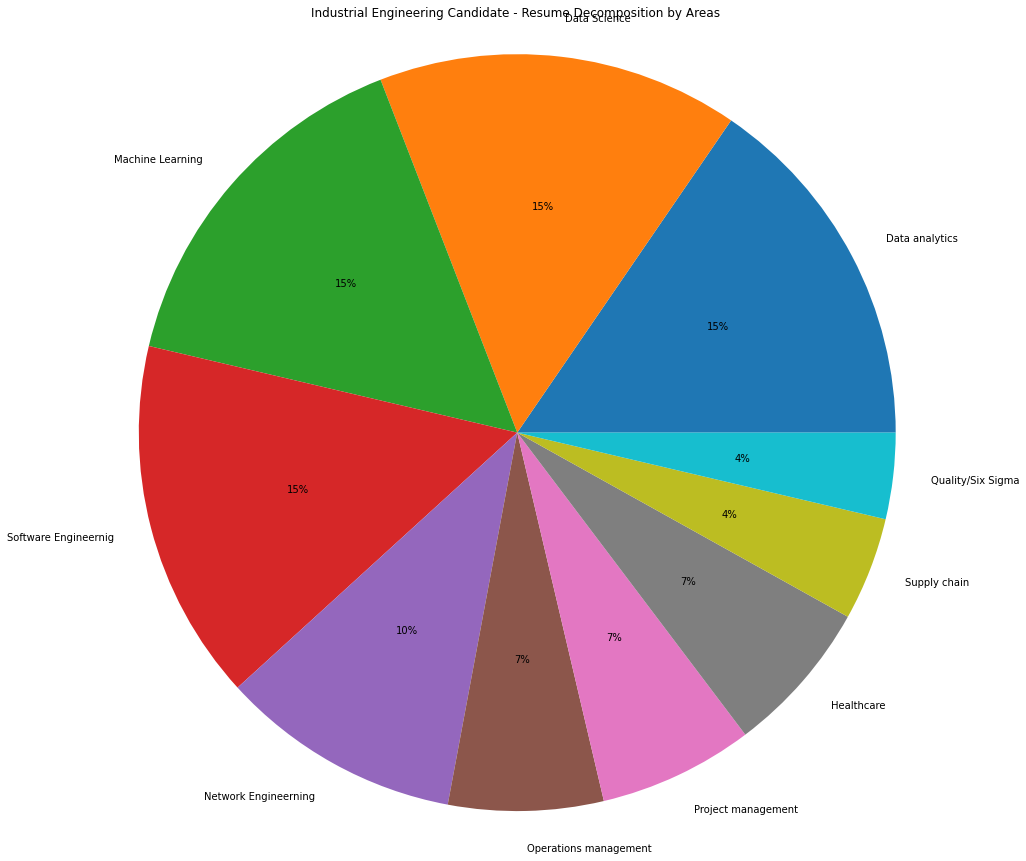

In [27]:
# Create pie chart visualization
pie = plt.figure(figsize=(15,15))
plt.pie(summary['score'], labels=summary.index, explode = (0,0,0,0,0,0,0,0,0,0), autopct='%0.0f%%',shadow=False,startangle=0)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()
# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')

In [28]:
def get_number_of_pages(file_name):
    try:
        if isinstance(file_name, io.BytesIO):
            # for remote pdf file
            count = 0
            for page in PDFPage.get_pages(file_name,caching=True,check_extractable=True):
                count += 1
            return count
        else:
            # for local pdf file
            if file_name.endswith('.pdf'):
                count = 0
                with open(file_name, 'rb') as fh:
                    for page in PDFPage.get_pages(
                        fh,
                        caching=True,
                        check_extractable=True
                    ):
                        count += 1
                return count
            else:
                return None
    except PDFSyntaxError:
        return None

In [29]:
## test get_number_of_pages function
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+resume
    noOfLines = get_number_of_pages(path)
    print(path ,'has ',noOfLines, 'pages')
    print('----------------------------')

data/ahtishamCV-1 (1).pdf has  1 pages
----------------------------
data/ahtishamCV-1.pdf has  1 pages
----------------------------
data/Anas Raza CV(3.6).pdf has  2 pages
----------------------------
data/Azam cv..pdf has  2 pages
----------------------------
data/CVAbdulGhafoor.pdf has  2 pages
----------------------------
data/CVMuhammadShaharyar.pdf has  1 pages
----------------------------
data/CVMuhammadWaris.pdf has  3 pages
----------------------------
data/CVMuhammadZubair.pdf has  2 pages
----------------------------
data/CVSaadShahid.pdf has  1 pages
----------------------------
data/CVSadiaShahbaz.pdf has  1 pages
----------------------------
data/CVShahbazAli.pdf has  1 pages
----------------------------
data/GERALD_GERARD_BROWN_1982.pdf has  2 pages
----------------------------
data/Html and CSS resume.pdf has  1 pages
----------------------------
data/JACK_RAYMOND_BORSTING_1981.pdf has  2 pages
----------------------------
data/LEIGH_WILLIAM_BRADBURY_1990-05.pdf has  2 p

data/Profile (55).pdf has  1 pages
----------------------------
data/Profile (56).pdf has  2 pages
----------------------------
data/Profile (57).pdf has  1 pages
----------------------------
data/Profile (58).pdf has  1 pages
----------------------------
data/Profile (59).pdf has  1 pages
----------------------------
data/Profile (6).pdf has  1 pages
----------------------------
data/Profile (60).pdf has  1 pages
----------------------------
data/Profile (61).pdf has  2 pages
----------------------------
data/Profile (62).pdf has  3 pages
----------------------------
data/Profile (63).pdf has  1 pages
----------------------------
data/Profile (64).pdf has  1 pages
----------------------------
data/Profile (65).pdf has  1 pages
----------------------------
data/Profile (66).pdf has  3 pages
----------------------------
data/Profile (67).pdf has  1 pages
----------------------------
data/Profile (68).pdf has  1 pages
----------------------------
data/Profile (69).pdf has  1 pages
------

### Get Entities from Corpus

In [30]:
def extract_entities_wih_custom_model(custom_nlp_text):
    '''
    Helper function to extract different entities with custom
    trained model using SpaCy's NER

    :param custom_nlp_text: object of `spacy.tokens.doc.Doc`
    :return: dictionary of entities
    '''
    entities = {}
    for ent in custom_nlp_text.ents:
        if ent.label_ not in entities.keys():
            entities[ent.label_] = [ent.text]
        else:
            entities[ent.label_].append(ent.text)
    for key in entities.keys():
        entities[key] = list(set(entities[key]))
    return entities


In [31]:
import string
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    cleaned_text = clean_text(raw_text)
    #print(raw_text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(cleaned_text)
    get_the_entity_sections =extract_entities_wih_custom_model(doc)
    print(get_the_entity_sections)
    print('----------------')

{'PERSON': ['Ali Colony Lahore', 'CSS BOOTSTRA', 'Development Trainee', 'CSS BOOTSTRAP', 'ihtisham khan            ', 'LIST OF PROJECTS'], 'DATE': ['my final year'], 'ORG': ['CSS BOOTSTRAP JAVASCRIPT Backend', 'JAVASCRIPT', 'SKILLS Front', 'HTML', 'SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER'], 'PRODUCT': ['PHP'], 'FAC': ['PHP LARAVEL']}
----------------
{'PERSON': ['Ali Colony Lahore', 'CSS BOOTSTRA', 'Development Trainee', 'CSS BOOTSTRAP', 'ihtisham khan            ', 'LIST OF PROJECTS'], 'DATE': ['my final year'], 'ORG': ['CSS BOOTSTRAP JAVASCRIPT Backend', 'JAVASCRIPT', 'SKILLS Front', 'HTML', 'SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER'], 'PRODUCT': ['PHP'], 'FAC': ['PHP LARAVEL']}
----------------
{'DATE': ['winter'], 'PERSON': ['Dino'], 'LAW': ['Chapter', 'Tools  '], 'LANGUAGE': ['English']}
----------------
{'PERSON': ['Raspberry Pi', 'Skills', 'St John', 'Lahore', 'Azam Ali                         Matriculation', 'Faisalabad', 'Jinnah'], 'ORG': ['GC University', 'Organisational', 'Mark

{'ORG': ['Microsoft', 'XAML', 'Cairo Bachelor', 'Human Computer', 'Security                 Helwan University'], 'NORP': ['Helwan'], 'GPE': ['Cairo', 'Egypt'], 'DATE': ['one month'], 'LOC': ['the Academic AppFactory Manger'], 'PERSON': ['Saint Mary']}
----------------
{'PERSON': ['mohammed basil', 'mohd basil', 'Mohammed Basil Artificial Intelligence', 'Deep'], 'CARDINAL': ['LinkedIn'], 'ORG': ['NLP', 'Education Al Zaytoonah University of Jordan Bachelor', 'Python  Java  Machine'], 'DATE': ['February']}
----------------
{'ORG': ['Bioinformatics Image', 'Ain Shams University', 'Healthcare', 'Supported Topics Electronics', 'Intensive Care Unit', 'El  DeMerdash Hospital'], 'DATE': ['summer', 'June'], 'GPE': ['Biomedical', 'Egypt', 'Cairo']}
----------------
{'ORG': ['Native', 'Egypt Entrepreneurship Rally       Finalists Publications Interactive Virtual Rehabilitation for Aphasic Arabic Speaking Patients', 'Al Jizah Experience Information Technology Institute', 'Education Cairo University

{'ORG': ['Advanced Data Analysis', 'Fiverr Data Analysis', 'CLS', 'BI'], 'DATE': ['February', 'January         year   months', 'July         months', 'November', 'January'], 'LAW': ['Clean'], 'PRODUCT': ['Excel', 'Power', 'Power BI'], 'GPE': ['Egypt', 'Cairo'], 'WORK_OF_ART': ['Education Faculty']}
----------------
{'ORG': ['LinkedIn', 'Mansoura University                                                     Computer', 'Mohamed Maged Data']}
----------------
{'ORG': ['Soteer Group Water Treatment Systems Sales Representative', 'Egypt Education Information Technology Institute', 'Ain Shams University                  Bachelor of Engineering'], 'DATE': ['June', 'April'], 'GPE': ['Cairo']}
----------------
{'CARDINAL': ['LinkedIn'], 'ORG': ['Cairo University       Udacity Bachelor of Science'], 'DATE': ['February', 'July        October', 'September']}
----------------
{'PERSON': ['Mostafa Abbas', 'abbas']}
----------------
{'ORG': ['LinkedIn  ', 'the Machine Learning and Data Science', 'Py

{'GPE': ['Python'], 'PERSON': ['Ahmed Hindi'], 'ORG': ['Cairo Summary Data Scientist'], 'DATE': ['months', 'August', 'years', 'the five years', 'five years', 'October']}
----------------
{'GPE': ['Pakistan'], 'ORG': ['KeepTruckin Data'], 'DATE': ['March'], 'PERSON': ['Lahore', 'Punjab']}
----------------
{'ORG': ['English Education Higher Technological Institute      Computer and Information Sciences and Support Services', 'DS', 'AI   Data'], 'PERSON': ['Al   ML', 'Markaz El Zaqaziq Summary Contact              ', 'ahmed ali'], 'LANGUAGE': ['Arabic']}
----------------
{'PERSON': ['Sara Wageeh'], 'ORG': ['Alexandria Education'], 'PRODUCT': ['Bachelor s degree']}
----------------
{'PERSON': ['afzaal'], 'ORG': ['The Islamia University of Bahawalpur Bahawalpur District Education']}
----------------
{'ORG': ['LinkedIn  '], 'PERSON': ['Markaz Nasser']}
----------------
{'PERSON': ['hassan        ', 'Hassan AI'], 'GPE': ['Cairo'], 'LAW': ['HosamHasan       gmail com www'], 'ORG': ['LinkedIn  

{'CARDINAL': ['LinkedIn'], 'PERSON': ['Ahmed Zaroath'], 'ORG': ['SQL', 'CSS', 'AI Enthusiast'], 'LANGUAGE': ['English'], 'DATE': ['December', 'April', 'September']}
----------------
{'PERSON': ['aaobadaldein gmail'], 'GPE': ['Media', 'pakistan', 'Kar chi'], 'ORG': ['Pakistan News']}
----------------
{'PERSON': ['zickrullah     ', 'Certifications', 'Andhra Pradesh', 'Mohammed Zickrullah Data'], 'ORG': ['SQL', 'Data Analytics Fundamentals Google Data Analytics', 'Tableau', 'India Education Sharda University Bachelor of Arts'], 'DATE': ['January        September         years   months']}
----------------
{'WORK_OF_ART': ['Inception CNN'], 'ORG': ['UCF'], 'NORP': ['Pytorch'], 'PRODUCT': ['Numpy']}
----------------
{'PERSON': ['Lahore', 'arslan ma     ', 'arslan muhammad     ', 'www linkedin'], 'NORP': ['Punjab'], 'GPE': ['Lahore', 'Pakistan'], 'DATE': ['September', 'May         months'], 'ORG': ['Pakistan Education Lancaster University Bachelor of Science']}
----------------
{'PERSON': ['v

{'PERSON': ['Ahmed Hesham', 'Ahmed hesham'], 'CARDINAL': ['LinkedIn'], 'ORG': ['Egypt Education', 'Alexandria University Engineering                 Page', 'Top Skills Java Languages', 'A Theoretical', 'Information Technology Institute', 'Alexandria University', 'Trainee  Artificial Intelligence'], 'DATE': ['months', 'April'], 'GPE': ['Alexandria', 'AI', 'Egypt'], 'LAW': ['Python  Programming Language'], 'LANGUAGE': ['English', 'Arabic']}
----------------
{'CARDINAL': ['seven'], 'GPE': ['Learnt', 'Egypt']}
----------------
{'ORG': ['Controllers  Laravel', 'Assiut University', 'Education National Telecommunication Institute']}
----------------
{'DATE': ['December', 'September', 'November        November         month'], 'GPE': ['Pakistan', 'Website', 'Abu Dhabi', 'Karachi'], 'NORP': ['GAMERHUB'], 'ORG': ['CSS', 'Educational Consultants', 'Computer Software Engineering                 Page', 'JAVA', 'Allied Engineering Enterprises Data Entry', 'Java Programming And Software Engineering',

In [32]:
def extract_entity_sections_professional(text):
    '''
    Helper function to extract all the raw text from sections of
    resume specifically for professionals

    :param text: Raw text of resume
    :return: dictionary of entities
    '''
    text_split = [i.strip() for i in text.split('\n')]
    entities = {}
    key = False
    for phrase in text_split:
        if len(phrase) == 1:
            p_key = phrase
        else:
            p_key = set(phrase.lower().split()) & set(cs.RESUME_SECTIONS_PROFESSIONAL)
        try:
            p_key = list(p_key)[0]
        except IndexError:
            pass
        if p_key in cs.RESUME_SECTIONS_PROFESSIONAL:
            entities[p_key] = []
            key = p_key
        elif key and phrase.strip():
            entities[key].append(phrase)
    return entities


In [33]:
import string
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\DocFiles'):
    #print(resume)
    path='DocFiles/'+resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    cleaned_text = clean_text(raw_text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    get_the_entity_sections =extract_entity_sections_professional(cleaned_text)
    print(get_the_entity_sections)
    
    print('----------------')

{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------
{}
----------------


In [34]:
# def get_number_of_months_from_dates(date1, date2):
#     '''
#     Helper function to extract total months of experience from a resume

#     :param date1: Starting date
#     :param date2: Ending date
#     :return: months of experience from date1 to date2
#     '''
#     if date2.lower() == 'present':
#         date2 = datetime.now().strftime('%b %Y')
#     try:
#         if len(date1.split()[0]) > 3:
#             date1 = date1.split()
#             date1 = date1[0][:3] + ' ' + date1[1]
#         if len(date2.split()[0]) > 3:
#             date2 = date2.split()
#             date2 = date2[0][:3] + ' ' + date2[1]
#     except IndexError:
#         return 0
#     try:
#         date1 = datetime.strptime(str(date1), '%b %Y')
#         date2 = datetime.strptime(str(date2), '%b %Y')
#         months_of_experience = relativedelta.relativedelta(date2, date1)
#         months_of_experience = (months_of_experience.years
#                                 * 12 + months_of_experience.months)
#     except ValueError:
#         return 0
#     return months_of_experience



In [35]:
# def get_total_experience(experience_list):
#     '''
#     Wrapper function to extract total months of experience from a resume

#     :param experience_list: list of experience text extracted
#     :return: total months of experience
#     '''
#     exp_ = []
#     for line in experience_list:
#         experience = re.search(r'(?P<fmonth>\w+.\d+)\s*(\D|to)\s*(?P<smonth>\w+.\d+|present)',line,re.I)
#         if experience:
#             exp_.append(experience.groups())
#     total_exp = sum([get_number_of_months_from_dates(i[0], i[2]) for i in exp_])
#     total_experience_in_months = total_exp
#     return total_experience_in_months



In [36]:
# for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
#     #print(resume)
#     path='data/'+resume
#     raw_text = extract_text(path,'.pdf')
#     #print(raw_text)
#     nlp = spacy.load("en_core_web_sm")
#     doc = nlp(raw_text)
#     get_the_entity_sections =extract_entity_sections_professional(raw_text)
#     experience_list = get_the_entity_sections['experience'] if 'experience' in get_the_entity_sections else []
#     print(get_total_experience(experience_list))
#     print('----------------')

In [37]:
def extract_email(text):
    '''
    Helper function to extract email id from text

    :param text: plain text extracted from resume file
    '''
    #\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b
    #([^@|\s]+@[^@]+\.[^@|\s]+)
    email = re.findall(r"(\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b)", text)
    if email:
        try:
            return email[0].split()[0].strip(';')
        except IndexError:
            return None


In [38]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    email = extract_email(raw_text)
    print(email)
    print('----------------')

ahtishamkhan785@gmail.com
----------------
ahtishamkhan785@gmail.com
----------------
None
----------------
None
----------------
None
----------------
shaharyarkhan3333@gmail.com
----------------
None
----------------
None
----------------
sdshahid033@gmail.com
----------------
sadiashahbaz54@gmail.com
----------------
shahbaz.brame@gmail.com
----------------
None
----------------
rana.zubair971@gmail.com
----------------
None
----------------
None
----------------
None
----------------
None
----------------
numanijaz.engr@gmail.com
----------------
None
----------------
ilya@umich.edu
----------------
None
----------------
None
----------------
m.gamal202180@gmail.com
----------------
fam.ayman10@gmail.com
----------------
None
----------------
mohammed.basil596@gmail.com
----------------
None
----------------
shefaasaied97@gmail.com
----------------
None
----------------
None
----------------
ak4410040@gmail.com
----------------
mohandabdelhalim@gmail.com
----------------
None
-----

In [39]:
import constants as cs

In [40]:
def extract_name(nlp_text, matcher):
    '''
    Helper function to extract name from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param matcher: object of `spacy.matcher.Matcher`
    :return: string of full name
    '''
    pattern = [cs.NAME_PATTERN]

    matcher.add('NAME', None, *pattern)
    matcher.add("PERSON",None, *pattern)
    matcher.add("USER",None, *pattern)
    matches = matcher(nlp_text)

    for _, start, end in matches:
        span = nlp_text[start:end]
        if 'name' not in span.text.lower():
            return span.text


In [41]:
from spacy.matcher import Matcher

In [42]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\DocFiles'):
    path='DocFiles/'+ resume
    raw_text = extract_text(path,'.docx')
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    matcher = Matcher(nlp.vocab)
    name = extract_name(doc,matcher)
    print(name)
    print('----------------')

None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------


In [43]:
def extract_mobile_number(text, custom_regex=None):
    '''
    Helper function to extract mobile number from text

    :param text: plain text extracted from resume file
    :return: string of extracted mobile numbers
    '''
    # Found this complicated regex on :
    # https://zapier.com/blog/extract-links-email-phone-regex/
#     mob_num_regex = r'''(?:(?:\+?([1-9]|[0-9][0-9]|
#         [0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|
#         [2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|
#         [0-9]1[02-9]|[2-9][02-8]1|
#         [2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|
#         [2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{7})
#         (?:\s*(?:#|x\.?|ext\.?|
#         extension)\s*(\d+))?'''
    if not custom_regex:
        mob_num_regex = r'''(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)
                        [-\.\s]*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})'''
        phone = re.findall(re.compile(mob_num_regex), text)
    else:
        phone = re.findall(re.compile(custom_regex), text)
    if phone:
        number = ''.join(phone[0])
        return number


In [44]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    #nlp = spacy.load("en_core_web_sm")
    #doc = nlp(raw_text)
    #matcher = Matcher(nlp.vocab)
    number = extract_mobile_number(raw_text)
    print(number)
    print('----------------')

0302617359
----------------
0302617359
----------------
None
----------------
None
----------------
None
----------------
9230428000
----------------
None
----------------
None
----------------
324 4113048
----------------
3344846360
----------------
320-4340296
----------------
None
----------------
017-2021
----------------
None
----------------
None
----------------
None
----------------
None
----------------
3157162060
----------------
None
----------------
109-2140
----------------
016-2017
----------------
None
----------------
None
----------------
6163691
----------------
None
----------------
962 7701481
----------------
None
----------------
None
----------------
None
----------------
None
----------------
4410040
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
None
----------------
0100570254
----------------
None
----------------
0111876095
------------

In [45]:
def extract_skills(nlp_text, noun_chunks, skills_file=None):
    '''
    Helper function to extract skills from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param noun_chunks: noun chunks extracted from nlp text
    :return: list of skills extracted
    '''
    tokens = [token.text for token in nlp_text if not token.is_stop]
    if not skills_file:
        data = pd.read_csv(
            os.path.join(os.path.dirname(__file__), 'skills.csv')
        )
    else:
        data = pd.read_csv(skills_file)
    skills = list(data.columns.values)
    skillset = []
    # check for one-grams
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)

    # check for bi-grams and tri-grams
    for token in noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    return [i.capitalize() for i in set([i.lower() for i in skillset])]



In [46]:
import spacy

In [47]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    number = extract_mobile_number(raw_text)

    print(extract_skills(doc,doc.noun_chunks,'skills.csv'))

['Php', 'Html', 'Css', 'Javascript', 'Engineering', 'Github', 'Html5', 'Mysql', 'P', 'System']
['Php', 'Html', 'Css', 'Javascript', 'Engineering', 'Github', 'Html5', 'Mysql', 'P', 'System']
['English', 'Transport']
['Php', 'English', 'Communication', 'Excel', 'Research', 'Training', 'Technical', 'Programming', 'Word', 'Architecture']
['Javascript', 'Sublime', 'Python', 'Sql', 'Coding', 'Os', 'Aws', 'C', 'Ubuntu', 'Linux', 'Windows', 'Visual', 'Programming']
['Design', 'Html', 'Css', 'English', 'Installation', 'Swift', 'Computer science', 'Mobile', 'Ios', 'C++', 'Programming', 'Security', 'System']
['Php', 'Js', 'Postgresql', 'Sql server', 'Asp', 'Api', 'Sql', 'Mysql', 'Ruby']
['Php', 'Javascript', 'Wordpress', 'Html5', 'Photoshop', 'Mysql', 'Adobe']
['Php', 'English', 'Certification', 'Engineering', 'Technical', 'Technical skills']
['Design', 'Testing', 'Travel', 'Sublime', 'Mobile', 'C', 'Api', 'Programming', 'Ecommerce', 'Photography', 'Website', 'Visual', 'Computer science', 'Html',

['English', 'Mining', 'Mobile', 'Python', 'Technical']
[]
['English', 'Communication', 'Mobile', 'Python', 'Support services', 'Programming', 'Ai', 'Troubleshooting']
['Analysis', 'Computer science']
['Computer science']
['Computer science']
['Mobile', 'Algorithms', 'Analysis', 'Ai', 'Data analysis']
['Mathematics', 'Research', 'Ibm', 'Machine learning', 'Analysis', 'Technical', 'Ai']
['Business intelligence', 'Analytics', 'English', 'Accounting', 'Training', 'Data analytics', 'C', 'Xml', 'Finance', 'Analysis', 'Sql', 'System']
['French', 'Mobile', 'Training', 'Algorithms', 'Aws', 'Machine learning', 'Analysis', 'Partnership', 'Ai', 'Computer science']
['Research', 'Ai', 'English']
[]
['Engineering', 'German']
['Mobile', 'Python', 'Pandas', 'Analysis', 'Technical', 'Ai']
['Engineering', 'Design']
['Html', 'English', 'Css', 'Java', 'Communication', 'Information technology', 'Biology', 'Mobile', 'Python', 'Tensorflow', 'C++', 'C', 'Sql', 'Ai']
['Computer science']
['Php', 'Css', 'Html', 

In [48]:
def extract_education(nlp_text):
    '''
    Helper function to extract education from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :return: tuple of education degree and year if year if found
             else only returns education degree
    '''
    edu = {}
    # Extract education degree
    #[sent.text.strip() for sent in nlp_text.sents]
    sentence =[sent.text.strip() for sent in nlp_text.sents]
    try:
        for index, text in enumerate(sentence):
            for tex in text.split():
                tex = re.sub(r'[?|$|.|!|,]', r'', tex)
                if tex.upper() in cs.EDUCATION and tex not in cs.STOPWORDS:
                    edu[tex] = text + sentence[index + 1]
    except IndexError:
        pass

    # Extract year
    education = []
    for key in edu.keys():
        year = re.search(re.compile(cs.YEAR), edu[key])
        if year:
            education.append((key, ''.join(year.group(0))))
        else:
            education.append(key)
    return education

In [49]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(raw_text)
    education = extract_education(doc)
    print(education)

[('BSSE', '2020')]
[('BSSE', '2020')]
[]
[]
[]
[]
[]
[]
['MCS', 'BSC', 'FSc', 'SSC']
[]
[]
[('PhD', '1974')]
[]
[('PhD', '1959')]
[]
[]
[]
[]
[]
[]
[]
[('MS', '2019')]
[]
[]
[]
[]
[]
[]
[('FSc', '2011')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('MS', '2015')]
[]
[]
[]
[('BSc', '2016')]
[]
[]
[]
[]
[]
[]
[]
[]
[('X', '2020')]
[]
[]
[('MSCS', '2017')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['MSc', ('MS', '2012')]
[]
[]
[]
[]
[]
[]
[]
[]
[('MSc', '2016'), ('Msc', '2016')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('Bscs', '2017')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('BSCS', '2019')]
['BSc']
[]
[]
[('PhD', '2017')]
[]
[]
[]
[('BSCS', '2017')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('MS', '2016')]
[]
[]
[]
[]
[]
[]
['BSc']
[]
[]
[]
[]
[('BTech', '2021')]
[]
[('BTech', '2021')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('MS', '2021')]
[]
[]
[]
[]
[('MS', '2020')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('PhD', '1961')]
[]
[('PhD', '1967')]
[]
[]
[]
[('PhD', '1967')]
[(

In [50]:
def extract_experience(resume_text):
    '''
    Helper function to extract experience from resume text

    :param resume_text: Plain resume text
    :return: list of experience
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # word tokenization
    word_tokens = nltk.word_tokenize(resume_text)

    # remove stop words and lemmatize
    filtered_sentence = [
            w for w in word_tokens if w not
            in stop_words and wordnet_lemmatizer.lemmatize(w)
            not in stop_words
        ]
    sent = nltk.pos_tag(filtered_sentence)

    # parse regex
    cp = nltk.RegexpParser('P: {<NNP>+}')
    cs = cp.parse(sent)

#     for i in cs.subtrees(filter=lambda x: x.label() == 'P'):
#         print(i)

    test = []

    for vp in list(cs.subtrees(filter=lambda x: x.label() == 'P')):
        test.append(" ".join([i[0] for i in vp.leaves()if len(vp.leaves()) >= 2]))

    # Search the word 'experience' in the chunk and
    # then print out the text after it
    print(test)
#     x = [
#         x[x.lower().index('experience') + 10:]
#         for i, x in enumerate(test)
#         if x and 'experience' in x.lower()
#     ]
    return test

In [51]:
#nltk.download('averaged_perceptron_tagger')

In [52]:

for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    #nlp = spacy.load("en_core_web_sm")
    #doc = nlp(raw_text)
    education = extract_experience(raw_text)
    print(education)

['VIRTUAL UNIVERSTY SOFTWARE LABS', 'Web Development', 'Development Trainee', '', '', 'BOOTSTRA P', '', 'LARAVEL BS Software Engineering VIRTUAL UNIVERSTY OF PAKISTAN', 'LAHOR E INTERESTS \uf004 \uf004 Interest LEARNING NEW SKILLS Interest READING NOVELS PROJECTS', 'COLONY RECORD MANAGEMENT', '', '', '', '', '', 'MYSQL LIST OF PROJECTS', 'BEEN DONE', 'SAHULAT HOME FOOD \uf00c \uf00c ONLINE DOCTOR SEARCH AND APPOINTMENT SYSTEM IHTISHAM KHAN SOFTWARE ENGINEER EDUCATION', 'PROFILE Highly', '', 'SKILLS Front_end HTML5 CSS BOOTSTRAP JAVASCRIPT Backend PHP LARAVEL', 'CONTACT FCW7+G82', '', '', 'Ali Colony Lahore', '', '\uf015 \uf095 \uf10b \uf0e0 \uf0e1']
['VIRTUAL UNIVERSTY SOFTWARE LABS', 'Web Development', 'Development Trainee', '', '', 'BOOTSTRA P', '', 'LARAVEL BS Software Engineering VIRTUAL UNIVERSTY OF PAKISTAN', 'LAHOR E INTERESTS \uf004 \uf004 Interest LEARNING NEW SKILLS Interest READING NOVELS PROJECTS', 'COLONY RECORD MANAGEMENT', '', '', '', '', '', 'MYSQL LIST OF PROJECTS', 'B

['', '', 'Restful API Development', '', '', 'SQL Server', 'PostgreSQL Databases', 'Ruby Rails', '', 'React Native', '', 'Self Learning', 'Git Version Control', '', '', '', 'Mongo DB', '']
['', '', 'Restful API Development', '', '', 'SQL Server', 'PostgreSQL Databases', 'Ruby Rails', '', 'React Native', '', 'Self Learning', 'Git Version Control', '', '', '', 'Mongo DB', '']
['PHP • Laravel • VueJS • WordPress • Git • Bootstrap • HTML5 • CSS3 • JavaScript • MySQL • Mongo DB • Adobe Photoshop']
['PHP • Laravel • VueJS • WordPress • Git • Bootstrap • HTML5 • CSS3 • JavaScript • MySQL • Mongo DB • Adobe Photoshop']
['EDUCATION MCS', '', 'Superior University BSC University Punjab F.Sc SSC Pre-Engineering Leadership College Science Al-Falah School TECHNICAL SKILLS Hafiz Muhammad Saad Shahid CAREER OBJECTIVE Seeking', '', '', 'Gulistan Colony', 'Dharam- -pura', 'Lahore Phone', '', 'CERTIFICATION FULLSTACK WEB-DEVELOPMENT From PNY PHP', 'LARAVEL From EVS URDU ENGLISH']
['EDUCATION MCS', '', 'Su

['RESUME OF LEIGH WILLIAM BRADBURY LCDR Leigh W. Bradbury', '', 'Nebraska November', 'Bachelor Science', 'Aeronautical Tech', 'Arizona State University', '', 'Computer Science Corpus Christi State University', 'Arizona State Uni', 'Instructor Air Force', 'Navy May', '', '', 'Candidate Pro', 'Naval Flight Officer February', 'A-6 Bombar', '', '', '', 'USS RANGER', '', 'LCDR Bradbury', 'Commander U. S. Naval Base Subic Fleet Training Officer', 'Carrier Air Traffic Control Officer', 'NA TTC Memphis', 'USS ENTERPRISE June', 'Pacific Indian Oceans', '', '', 'LCDR Bradbury', 'Assistant Air Opera', 'Officer USS NIMITZ', '', '', 'CNATRA Staff Assistant', '', 'Management Information Systems Officer', '', '', 'Computer Science', '', 'LCDR Bradbury', 'USS AMERICA Air', '', 'Guff Sidra', 'USS AMERICA', 'LCDR Bradbury', 'Naval Postgraduate School February', 'Computer Science Department', 'LCDR Bradbury', 'FAA Airline Transport Pilot', 'FAA Flight Instructor', 'LCDR Bradbury', 'Hot Air Ballooning Am'

['', '', '', '', '', '', 'E-Store Laravel', '', '\uf0fc Designed', '', 'Data Processing Officer TCS Express', 'Logistics Lahore', '', '', 'Data Processing Print Shop', 'Development ADO.NET', 'SQL Server', 'Microsoft Access', 'Crystal Report', 'Excel ADO.NETapplications', 'Anchor Person Literary Society PUCIT New Campus', 'Writer Literary Society PUCIT New Campus', '', '.. II', 'RReessuummee .. HHaaffiizz MMuuhhaammmmaadd AAzzaamm']
['', '', '', '', '', '', 'E-Store Laravel', '', '\uf0fc Designed', '', 'Data Processing Officer TCS Express', 'Logistics Lahore', '', '', 'Data Processing Print Shop', 'Development ADO.NET', 'SQL Server', 'Microsoft Access', 'Crystal Report', 'Excel ADO.NETapplications', 'Anchor Person Literary Society PUCIT New Campus', 'Writer Literary Society PUCIT New Campus', '', '.. II', 'RReessuummee .. HHaaffiizz MMuuhhaammmmaadd AAzzaamm']
['', '', 'Cairo Governorate', 'Egypt ERC Team', '', '', 'Embedded Software Engineer June', '', 'Arena .Ne Developer January', ''

['', '', '', 'Mohand Abdelhalim Machine Learning Intern Information Technology Institute', '', 'Benha Engineering', '', '', 'Experience Top Skills Engineering Project Management English Certifications Python Genomic Data Science Microsoft Certified', 'AI Fundamentals MRI Fundamentals Exploratory Data Analysis MATLAB HCIA-AI Information Technology Institute', '', 'Machine Learning Intern October', '', 'Egypt Welcare Hospital Clinical', '', 'Education Benha University', 'Biomedical/Medical Engineering ·']
['', '', '', 'Mohand Abdelhalim Machine Learning Intern Information Technology Institute', '', 'Benha Engineering', '', '', 'Experience Top Skills Engineering Project Management English Certifications Python Genomic Data Science Microsoft Certified', 'AI Fundamentals MRI Fundamentals Exploratory Data Analysis MATLAB HCIA-AI Information Technology Institute', '', 'Machine Learning Intern October', '', 'Egypt Welcare Hospital Clinical', '', 'Education Benha University', 'Biomedical/Medica

['Tahaluf Al Emarat Technical Solutions لولحلل تارامإلا فلاحت ةينقتلا Deep Learning Engineer', '', '', '', 'RoboEye Tech Computer Vision Engineer June', '', '', '', '', '', '', 'English Arabic', '', '', 'RoboMark OMR', '', '', '', 'EGYPTAIR Engineer Intern July', '', 'Cairo Education Udacity Computer Vision Nanodegree', 'Computer Programming ·']
['Tahaluf Al Emarat Technical Solutions لولحلل تارامإلا فلاحت ةينقتلا Deep Learning Engineer', '', '', '', 'RoboEye Tech Computer Vision Engineer June', '', '', '', '', '', '', 'English Arabic', '', '', 'RoboMark OMR', '', '', '', 'EGYPTAIR Engineer Intern July', '', 'Cairo Education Udacity Computer Vision Nanodegree', 'Computer Programming ·']
['', '', 'Cairo Governorate', '', '', 'Siemens Healthineers Biomedical Engineer', 'Cairo Governorate', 'Egypt Education Cairo University', 'High School Diploma ·', '', '', '', 'Systems Biomedical Engineering ·']
['', '', 'Cairo Governorate', '', '', 'Siemens Healthineers Biomedical Engineer', 'Cairo Gov

['Trainee September', '', 'ML Unique X Data', '', '', '', 'Automation Engineer October', '', 'Education Faculty Electronic Engineering', 'Menoufia University Bachelor', '', 'Electronics Communications Engineering ·']
['Trainee September', '', 'ML Unique X Data', '', '', '', 'Automation Engineer October', '', 'Education Faculty Electronic Engineering', 'Menoufia University Bachelor', '', 'Electronics Communications Engineering ·']
['', '', '', 'Mstr Nabeel Computer Scientist Lahore Top Skills Communication Leadership Analytical Skills Education ·', 'University Engineering Technology', 'Lahore Page']
['', '', '', 'Mstr Nabeel Computer Scientist Lahore Top Skills Communication Leadership Analytical Skills Education ·', 'University Engineering Technology', 'Lahore Page']
['LinkedIn Guide Networking Web Developer دحاو رهش', 'National Telecommunication Institute', '', '', 'Graphics Multimedia ·', 'Al-Azhar University تامولعمو تابتكم', 'ميلعت ايجولونكتو تامولعمو تابتكم', 'ميلعت ايجولونكتو']
[

['Contact Met Ghamr', '', '', '', '', '', '', 'Skills Problem Solving Machine Learning Python', 'Programming Language', 'Certifications Machine Learning', 'Case Study Approach Problem Solving ECPC2021 Intermediate Machine Learning Huawei', 'HCIA-AI V3 Python Programming Course Bundle', 'Applications Antonios Malak Seeking Machine Learning', 'El Mansoura Summary', '', '', '', '', 'Neural Network', '', '', 'Experience ICPC Mansoura Technical Team Member April', '', 'ICPC Mansoura', 'National Telecommunication Institute', '', 'AI Intern July', '', 'Egypt Machine Learning', '', 'Education Mansoura University Bachelor', 'Computer Science ·']
['Contact Met Ghamr', '', '', '', '', '', '', 'Skills Problem Solving Machine Learning Python', 'Programming Language', 'Certifications Machine Learning', 'Case Study Approach Problem Solving ECPC2021 Intermediate Machine Learning Huawei', 'HCIA-AI V3 Python Programming Course Bundle', 'Applications Antonios Malak Seeking Machine Learning', 'El Mansoura

['', '', '', 'Skills Data Analysis Machine Learning Deep Learning Certifications Udacity Advanced Data Analysis Loai Mohamed', 'Giza Summary', '', '', 'MegaPharma Graphic Designer April', '', 'Saudi Arabia', '', 'Megapharm Saudi Arabia Education Cairo University Cairo University Tranning', '', '', '', '', '', '', '', '', '']
['', '', '', 'Skills Data Analysis Machine Learning Deep Learning Certifications Udacity Advanced Data Analysis Loai Mohamed', 'Giza Summary', '', '', 'MegaPharma Graphic Designer April', '', 'Saudi Arabia', '', 'Megapharm Saudi Arabia Education Cairo University Cairo University Tranning', '', '', '', '', '', '', '', '', '']
['Lahore Garrison University Bachelor Information', 'Information Technology ·']
['Lahore Garrison University Bachelor Information', 'Information Technology ·']
['Google Data Analytics Professional Certificate', 'Professional Certificate', '', '', '', 'Decisions 3-Prepare Data Exploration', 'Data Dirty Clean', 'Data Answer Questions', 'Data Thro

['Business Intelligence Specialist July', '', '', '', 'Egypt Data Warehouse', '', '', 'Egypt Smart.net Technical Presales Engineer April', '', '', 'Cairo Governorate', 'Egypt Army Army Officer April', '', 'Data Warehouse', '', '', 'Education Canadian', 'Engineering ·', 'Bachelor Engineering', '', '', 'Electronics Communications Page']
['Business Intelligence Specialist July', '', '', '', 'Egypt Data Warehouse', '', '', 'Egypt Smart.net Technical Presales Engineer April', '', '', 'Cairo Governorate', 'Egypt Army Army Officer April', '', 'Data Warehouse', '', '', 'Education Canadian', 'Engineering ·', 'Bachelor Engineering', '', '', 'Electronics Communications Page']
['Learning Engineer Internship', 'Computer Vision Working Building AutoAI', '', '', 'Optuna Build', 'Object Detection', '', '', '', '', 'Build Script', '', '', 'Education Zagazig University Bachelor', 'Computer Engineering ·', '', 'High School Diploma ·']
['Learning Engineer Internship', 'Computer Vision Working Building Aut

[]
[]
['University Cairo Bachelor', 'Computer Engineering ·']
['University Cairo Bachelor', 'Computer Engineering ·']
['Mohamed Ahmed Gomaa Artificial Intelligence ML Trainee ITI', 'Al Jizah Summary Contact', '', '', 'Top Skills Artificial Intelligence', '', 'Data Science Natural Language Processing', '', 'ITI AI-Pro', '', '', 'ITI Kaggle', 'Certifications Analyzing Police Activity', 'Exploratory Data Analysis Python Python Fundamentals Track Hyperparameter Tuning Python Intermediate Machine Learning', 'Information Technology Institute', '', 'Helwan University Cairo Bachelor', 'Computer Science ·']
['Mohamed Ahmed Gomaa Artificial Intelligence ML Trainee ITI', 'Al Jizah Summary Contact', '', '', 'Top Skills Artificial Intelligence', '', 'Data Science Natural Language Processing', '', 'ITI AI-Pro', '', '', 'ITI Kaggle', 'Certifications Analyzing Police Activity', 'Exploratory Data Analysis Python Python Fundamentals Track Hyperparameter Tuning Python Intermediate Machine Learning', 'Inf

['Contact Cairo', '', '', '', 'Top Skills Python Machine Learning Deep Learning Languages English Arabic', 'Certifications Ibrahim Mostafa AI Trainee Information Technology Institute ITI Cairo Summary', 'ITI AI', 'Experience Information Technology Institute', '', '', 'Trainee Information Technology Institute', '', '', '', '', 'Egypt Natural Language Processing Classification Vector Spaces Certificate', 'Neural Networks TensorFlow Python Data Scientist Python Track Certificate', 'Learning TensorFlow', 'Education El Minia University Graduated Year', 'Computer Science Page']
['Contact Cairo', '', '', '', 'Top Skills Python Machine Learning Deep Learning Languages English Arabic', 'Certifications Ibrahim Mostafa AI Trainee Information Technology Institute ITI Cairo Summary', 'ITI AI', 'Experience Information Technology Institute', '', '', 'Trainee Information Technology Institute', '', '', '', '', 'Egypt Natural Language Processing Classification Vector Spaces Certificate', 'Neural Network

['', 'Architecture ·', '', '']
['', 'Architecture ·', '', '']
['Artificial Intelligence Professional', '', 'Machine Learning Artificial Intelligence', 'Graduate School Computer Science Advanced', '', 'Monoufia University Good ·', '', '']
['Artificial Intelligence Professional', '', 'Machine Learning Artificial Intelligence', 'Graduate School Computer Science Advanced', '', 'Monoufia University Good ·', '', '']
['Contact +94772069832', '', '', '', 'Ahmed Zaroath Undergraduate | B.Sc', 'Information Technology | AI Enthusiast | Deep Learning Ampara District Top Skills English Teamwork Communication Summary IT Undergraduate', 'AI Enthusiast', '', '', '', 'TensorFlow HTML', '', 'Java Script', 'My SQL', 'Freelance January', '', '', 'Sri Lanka Education Rajarata University Sri Lanka Bachelor Science', '', 'Information Technology ·', 'Aquinas College Higher', '', 'English ·', '', '', 'Zahira College Kalmunai', '', 'High School Diploma', '', 'General ·', 'April Page']
['Contact +94772069832', '

['', 'Data Intensive Science ·', '', '', "Jami'at Al-Balqa Al-Tatbiqiyya", '']
['', 'Data Intensive Science ·', '', '', "Jami'at Al-Balqa Al-Tatbiqiyya", '']
['Faculty Electronic Engineering', 'Menoufia University Bachelor', 'Computer Science ·']
['Faculty Electronic Engineering', 'Menoufia University Bachelor', 'Computer Science ·']
['Experienced Developer', '', 'Data Analytics', 'Data Analysis', '', '', 'Computer Programming', 'Specific Applications Languages', '', '', '', 'Top Skills Python Data Analysis Machine Learning English', 'Professional Working', '', 'Native Bilingual', '', '', 'Process Data Dirty Clean Prepare Data Exploration Google Data Analytics Certificate Ahmed Ayman', 'Egypt Summary Experience Self-employed Developer January', '', 'Egypt Education', '', 'Computer Science', 'Information System ·']
['Experienced Developer', '', 'Data Analytics', 'Data Analysis', '', '', 'Computer Programming', 'Specific Applications Languages', '', '', '', 'Top Skills Python Data Analys

['', '', '', 'Top Skills Web Development Data Science Laravel Irtaza Hassan Senior', '| Data Scientist | Machine Learning Engineer |', 'Developer | AWS Islamabad Summary Experienced Web Developer', '', 'Experience Sys Lab', '', '', '', '', '', 'Pakistan Pixiders', '', '', '', '', 'Pakistan Education Shaheed Zulfikar Ali Bhutto Institute Science Technology MS', 'Data Science', 'Data Science ·', 'UOL Bachelor ’ Degree', 'Computer Science ·']
['', '', '', 'Top Skills Web Development Data Science Laravel Irtaza Hassan Senior', '| Data Scientist | Machine Learning Engineer |', 'Developer | AWS Islamabad Summary Experienced Web Developer', '', 'Experience Sys Lab', '', '', '', '', '', 'Pakistan Pixiders', '', '', '', '', 'Pakistan Education Shaheed Zulfikar Ali Bhutto Institute Science Technology MS', 'Data Science', 'Data Science ·', 'UOL Bachelor ’ Degree', 'Computer Science ·']
['', '', '', 'Top Skills Research Training Problem Solving Languages Punjabi', 'Native Bilingual', '', 'Limited 

['Wordpress Developer December', '', 'Abu Dhabi', 'United Arab Emirates GULF ARRIVAL', 'Abu Dhabi', 'United Arab Emirates Shopping E- Commerce Website', 'GAMERHUB LIMITED Wordpress Developer November', '', 'Pakistan GamerzHub', '', '', 'Self-employed Web Designer Developer September', '', '', 'Pakistan Visa Innovative Educational', '', 'MY SQL', '', '', 'JAVA SCRIPT', 'Allied Engineering Enterprises Data Entry Operator', 'Pakistan Education NED University Engineering Technology Certification', 'Java Programming', 'Software Engineering ·', 'APTECH Computer Education High School Diploma', 'Computer Software Engineering ·']
['Wordpress Developer December', '', 'Abu Dhabi', 'United Arab Emirates GULF ARRIVAL', 'Abu Dhabi', 'United Arab Emirates Shopping E- Commerce Website', 'GAMERHUB LIMITED Wordpress Developer November', '', 'Pakistan GamerzHub', '', '', 'Self-employed Web Designer Developer September', '', '', 'Pakistan Visa Innovative Educational', '', 'MY SQL', '', '', 'JAVA SCRIPT', 

['RESUME OF FORREST ROGER WILLIAMS Forrest R. Williams', '', '', '', '', '', 'U. S. Naval Academy', 'Bachelor Science', 'USS NORTHAMPTON', 'Chief Engineer Destroyer GEARING', '', 'Master Science Mete', 'Naval Postgraduate School', 'Gunnery Department Head Amphibious Assault Ship THETIS BAY', '', 'Fleet Weather Central', '', '', 'Forecast Duty Officer Data Systems Officer', 'Master Science Massachusetts Institute Technology', 'Environmental Pre', 'Research Facility Executive Officer August', '', 'Naval Postgraduate School', '', '', '', '', 'U. S. Naval Institute', 'American Meteorological Society', 'Sigma Xi']
['RESUME OF FORREST ROGER WILLIAMS Forrest R. Williams', '', '', '', '', '', 'U. S. Naval Academy', 'Bachelor Science', 'USS NORTHAMPTON', 'Chief Engineer Destroyer GEARING', '', 'Master Science Mete', 'Naval Postgraduate School', 'Gunnery Department Head Amphibious Assault Ship THETIS BAY', '', 'Fleet Weather Central', '', '', 'Forecast Duty Officer Data Systems Officer', 'Master

['RESUME OF WILLIAM REESE William Reese', 'Reed Col Portland', '', '', 'Kansas City', '', 'Bachelor Arts', '', 'University Illinois', 'Master February', 'Doctor Philosophy June', '', '', '', 'Department Physics', 'Physics Chemistry', 'NPS August', 'Naval Intelligence Cur', 'Systems Technology Curri', 'EW C', 'Academic Groups', 'Naval Intelli', '', 'Naval Intelligence Support Center', '', 'Department National Security', 'Academic Associate', 'Naval Intelligence Curriculum', 'Physical Society', 'Sigma Xi', 'Phi Beta Kappa']
['RESUME OF WILLIAM REESE William Reese', 'Reed Col Portland', '', '', 'Kansas City', '', 'Bachelor Arts', '', 'University Illinois', 'Master February', 'Doctor Philosophy June', '', '', '', 'Department Physics', 'Physics Chemistry', 'NPS August', 'Naval Intelligence Cur', 'Systems Technology Curri', 'EW C', 'Academic Groups', 'Naval Intelli', '', 'Naval Intelligence Support Center', '', 'Department National Security', 'Academic Associate', 'Naval Intelligence Curricu

## Categories the resumes and save as CSV

In [53]:
cs.terms.keys()

dict_keys(['Quality/Six Sigma', 'Operations management', 'Supply chain', 'Project management', 'Data analytics', 'Data Science', 'Machine Learning', 'Software Engineernig', 'Network Engineerning', 'Healthcare'])

In [67]:
## get score of resume
def get_resume_score(text):
    # Initializie score counters for each area
    # Initializie score counters for each area
#     quality = 0
#     operations = 0
#     supplychain = 0
#     project = 0
#     data = 0
#     healthcare = 0
#     datascience=0
#     machinelearning =0
#     softwarengineerning=0
    # Create an empty list where the scores will be stored
    scores = {'Quality/Six Sigma':0,'Operations management':0,'Supply chain':0,'Project management':0,
              'Healthcare':0,'Data analytics':0,'Data Science':0,'Machine Learning':0,'Software Engineernig':0}

    # Obtain the scores for each area
    for area in cs.terms.keys():
        if area == 'Quality/Six Sigma':
            for word in cs.terms[area]:
                if word in text:
                    scores['Quality/Six Sigma']+=1
            
        elif area == 'Operations management':
            for word in cs.terms[area]:
                if word in text:
                    scores['Operations management']+=1
            
        elif area == 'Supply chain':
            for word in cs.terms[area]:
                if word in text:
                    scores['Supply chain']+=1
            
        elif area == 'Project management':
            for word in cs.terms[area]:
                if word in text:
                    scores['Project management']+=1
            
        elif area == 'Healthcare':
            for word in cs.terms[area]:
                if word in text:
                    scores['Healthcare']+=1
               
        elif area == 'Data analytics':
            for word in cs.terms[area]:
                if word in text:
                    scores['Data analytics']+=1
            
        elif area == 'Data Science':
            for word in cs.terms[area]:
                if word in text:
                    scores['Data Science']+=1
            
        elif area == 'Machine Learning':
            for word in cs.terms[area]:
                if word in text:
                    scores['Machine Learning']+=1
            
        elif area == 'Software Engineernig':
            for word in cs.terms[area]:
                if word in text:
                    scores['Software Engineernig']+=1
            
        else:
            for word in cs.terms[area]:
                if word in text:
                    if area in scores:
                        scores[area]+=1
                    else:
                        scores[area]=1 
            
    return scores

In [75]:
import pandas as pd
  
# create an Empty DataFrame object
new_resumes = pd.DataFrame(columns = ['Category', 'Resume'])
print(new_resumes.head())

Empty DataFrame
Columns: [Category, Resume]
Index: []


In [76]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\data'):
    path='data/'+ resume
    raw_text = extract_text(path,'.pdf')
    cleaned_text = clean_text(raw_text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(cleaned_text)
    skills = ' '.join(extract_skills(doc,doc.noun_chunks,'skills.csv')) 
    score = get_resume_score(skills)
    print(score)
    max_val= max(score, key=score.get)
    #print(score)
    print(max_val)
    
    new_resumes = new_resumes.append({'Category' : max_val, 'Resume' : raw_text}, ignore_index = True)
    

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 2, 'Data Science': 2, 'Machine Learning': 2, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 2, 'Data Science': 2, 'Machine Learning': 2, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data anal

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 0, 'Data Science': 0, 'Machine Learning': 0, 'Software Engineernig': 0}
Quality/Six Sigma
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1, 'Network Engineerning': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1, 'Network Engineerning': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 1, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1, 'Network Engineerning': 1}
Operations management
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply ch

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 2, 'Data Science': 2, 'Machine Learning': 2, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data anal

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data anal

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data anal

In [77]:
new_resumes

,Category,Resume
0,Data analytics,EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY S...
1,Data analytics,EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY S...
2,Data analytics,...
3,Data analytics,Curriculum vitae Azam Ali 04/07/2010–31/05/2...
4,Data analytics,• Tools: Visual Studio Code / Sublime Text /Ec...
...,...,...
194,Data analytics,RESUME OF WILLIAM MARSHALL TOLLES William...
195,Data analytics,0 0 0 RESUME OF WILLIAM REESE William ...
196,Data analytics,:) REStME OF RICHARD W. BELL Richard W....
197,Data analytics,Robert B. McGhee 7/26/13 9:31 PM Robert B. McG...


In [78]:
for resume in os.listdir('C:\\Users\\mmazhar\\Documents\\Resume Mining NLP\\DocFiles'):
    path='DocFiles/'+ resume
    raw_text = extract_text(path,'.docx')
    cleaned_text = clean_text(raw_text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(cleaned_text)
    skills = ' '.join(extract_skills(doc,doc.noun_chunks,'skills.csv')) 
    score = get_resume_score(skills)
    print(score)
    max_val= max(score, key=score.get)
    #print(score)
    print(max_val)
    
    new_resumes = new_resumes.append({'Category' : max_val, 'Resume' : raw_text}, ignore_index = True)

{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 1, 'Data Science': 1, 'Machine Learning': 1, 'Software Engineernig': 1}
Data analytics
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 0, 'Data Science': 0, 'Machine Learning': 0, 'Software Engineernig': 0}
Quality/Six Sigma
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Data analytics': 0, 'Data Science': 0, 'Machine Learning': 0, 'Software Engineernig': 0}
Quality/Six Sigma
{'Quality/Six Sigma': 0, 'Operations management': 0, 'Supply chain': 0, 'Project management': 0, 'Healthcare': 0, 'Dat

In [80]:
new_resumes.to_csv('ParsedResume.csv')

In [81]:
oldDataset= pd.read_csv('UpdatedResumeDataSet.csv', encoding = 'utf-8')

In [82]:
oldDataset

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [85]:
all_resumes =pd.concat([new_resumes,oldDataset])

In [86]:
all_resumes.shape

(1185, 2)

In [87]:
all_resumes['cleaned_resume'] =''

In [88]:
all_resumes

,Category,Resume,cleaned_resume
0,Data analytics,EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY S...,
1,Data analytics,EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY S...,
2,Data analytics,...,
3,Data analytics,Curriculum vitae Azam Ali 04/07/2010–31/05/2...,
4,Data analytics,• Tools: Visual Studio Code / Sublime Text /Ec...,
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [90]:
# Display Distnict Resume categories
all_resumes['Category'].unique()

array(['Data analytics', 'Quality/Six Sigma', 'Healthcare',
       'Operations management', 'Data Science', 'HR', 'Advocate', 'Arts',
       'Web Designing', 'Mechanical Engineer', 'Sales',
       'Health and fitness', 'Civil Engineer', 'Java Developer',
       'Business Analyst', 'SAP Developer', 'Automation Testing',
       'Electrical Engineering', 'Operations Manager', 'Python Developer',
       'DevOps Engineer', 'Network Security Engineer', 'PMO', 'Database',
       'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain',
       'Testing'], dtype=object)

In [91]:
all_resumes['Category'].value_counts()

Data analytics               200
Java Developer                84
Testing                       70
DevOps Engineer               55
Python Developer              48
Web Designing                 45
HR                            44
Hadoop                        42
Sales                         40
ETL Developer                 40
Operations Manager            40
Data Science                  40
Mechanical Engineer           40
Blockchain                    40
Arts                          36
Database                      33
PMO                           30
Electrical Engineering        30
Health and fitness            30
Business Analyst              28
DotNet Developer              28
Automation Testing            26
Network Security Engineer     25
SAP Developer                 24
Civil Engineer                24
Quality/Six Sigma             21
Advocate                      20
Healthcare                     1
Operations management          1
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

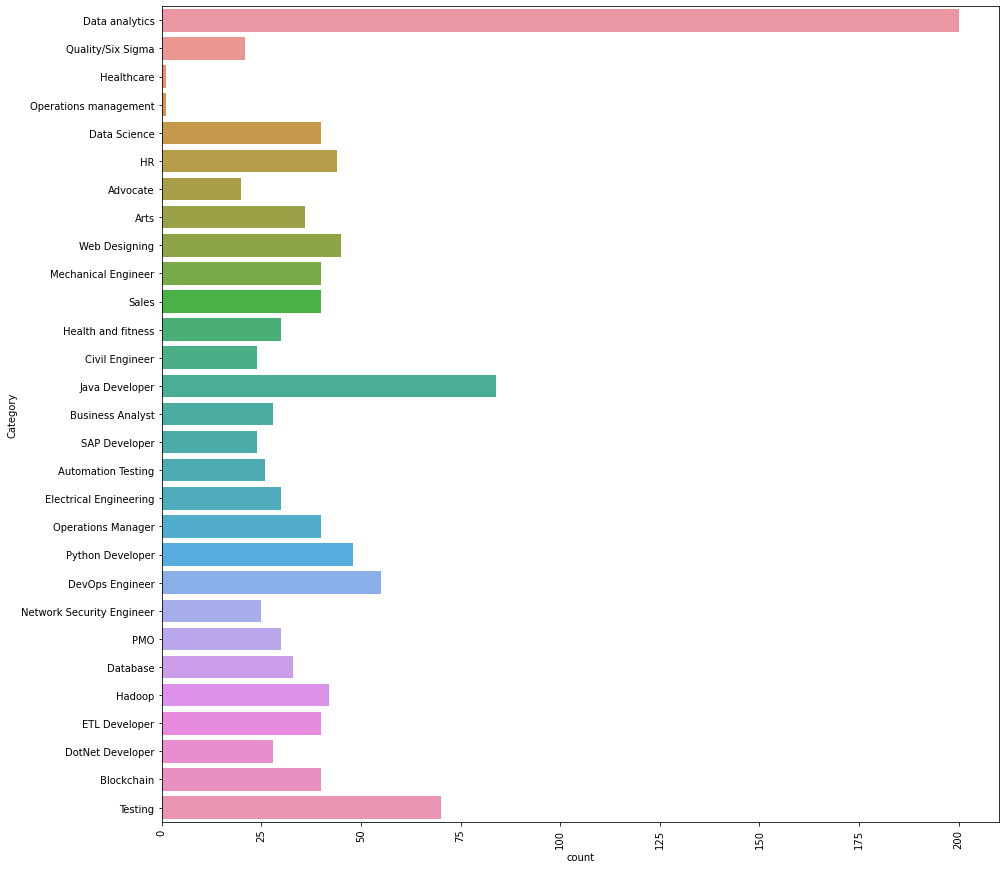

In [92]:
import seaborn as sns 
plt.figure(figsize =(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data= all_resumes)

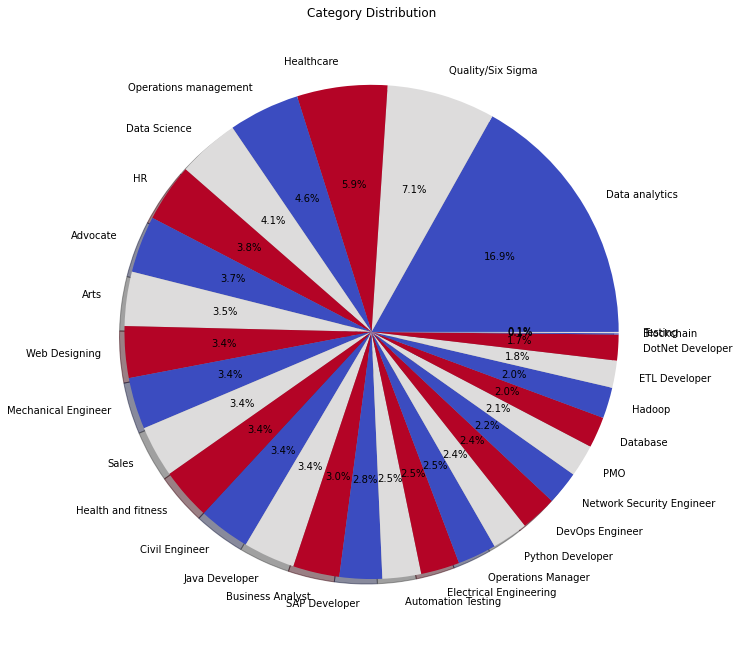

In [93]:

from matplotlib.gridspec import GridSpec
targetCounts = all_resumes['Category'].value_counts()
targetLabels = all_resumes['Category'].unique()

plt.figure(1,figsize=(25,25))
the_grid = GridSpec(2,2)

cmap= plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect =1, title ='Category Distribution')

souce_pie = plt.pie(targetCounts,labels =targetLabels, autopct= '%1.1f%%', shadow =True, colors= colors)
plt.show()

In [94]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    

In [95]:
all_resumes['cleaned_resume'] = all_resumes.Resume.apply(lambda x: cleanResume(x))

In [96]:
all_resumes['cleaned_resume'][0]

0    EXPERIENCE 2019 Present VI UAL UNIVERSTY SOFTW...
0    Skills Programming Languages Python pandas num...
Name: cleaned_resume, dtype: object

In [97]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [99]:
import nltk 
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [100]:
onesetOfStopwords = set(stopwords.words('english')+['``',"''"])

In [101]:
onesetOfStopwords

{"''",
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over

In [102]:
totalWords =[]
Senetnces = all_resumes['Resume'].values
cleanedSentences= ""
for i in range(0, 160):
    cleanedText = cleanResume(Senetnces[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in onesetOfStopwords and word not in string.punctuation:
            totalWords.append(word)

In [103]:
totalWords

['EXPERIENCE',
 '2019',
 'Present',
 'VI',
 'UAL',
 'UNIVERSTY',
 'SOFTWARE',
 'LABS',
 'Web',
 'Development',
 'I',
 'worked',
 'virtual',
 'university',
 'lab',
 'web',
 'Development',
 'Trainee',
 'learned',
 'variety',
 'languages',
 'like',
 'HTML',
 'CSS',
 'BOOTSTRA',
 'P',
 'PHP',
 'LARAVEL',
 'BS',
 'Software',
 'Engineering',
 'VI',
 'UAL',
 'UNIVERSTY',
 'OF',
 'PAKISTAN',
 'LAHOR',
 'E',
 'INTERESTS',
 'Interest',
 'LEARNING',
 'NEW',
 'SKILLS',
 'Interest',
 'READING',
 'NOVELS',
 'PROJECTS',
 '2020',
 'COLONY',
 'RECORD',
 'MANAGEMENT',
 'I',
 'done',
 'final',
 'year',
 'web',
 'based',
 'project',
 'made',
 'colony',
 'record',
 'management',
 'web',
 'based',
 'application',
 'using',
 'different',
 'type',
 'tools',
 'like',
 'HTML',
 'CSS',
 'BOOTSTRAP',
 'JAVASCRIPT',
 'PHP',
 'MYSQL',
 'LIST',
 'OF',
 'PROJECTS',
 'I',
 'HAVE',
 'BEEN',
 'DONE',
 'SAHULAT',
 'HOME',
 'FOOD',
 'ONLINE',
 'DOCTOR',
 'SEARCH',
 'AND',
 'APPOINTMENT',
 'SYSTEM',
 'IHTISHAM',
 'KHAN',
 

In [104]:
wordfreqdist = nltk.FreqDist(totalWords)


In [105]:
wordfreqdist

FreqDist({'Data': 221, '1': 216, 'University': 165, 'Science': 151, 'Page': 142, '2': 135, '2021': 127, 'Learning': 125, 'Computer': 117, 'com': 114, ...})

In [106]:
mostcommon = wordfreqdist.most_common(50)
mostcommon

[('Data', 221),
 ('1', 216),
 ('University', 165),
 ('Science', 151),
 ('Page', 142),
 ('2', 135),
 ('2021', 127),
 ('Learning', 125),
 ('Computer', 117),
 ('com', 114),
 ('Bachelor', 104),
 ('Education', 103),
 ('Machine', 101),
 ('Engineering', 100),
 ('months', 100),
 ('I', 94),
 ('2020', 94),
 ('www', 93),
 ('Cairo', 91),
 ('Egypt', 88),
 ('linkedin', 87),
 ('LinkedIn', 86),
 ('degree', 77),
 ('Skills', 76),
 ('2019', 73),
 ('Python', 71),
 ('Contact', 70),
 ('data', 69),
 ('Present', 68),
 ('learning', 63),
 ('Top', 63),
 ('2017', 61),
 ('Technology', 61),
 ('Information', 60),
 ('Engineer', 59),
 ('3', 56),
 ('Intelligence', 56),
 ('Artificial', 53),
 ('Experience', 53),
 ('AI', 53),
 ('2018', 51),
 ('science', 50),
 ('Certifications', 49),
 ('Summary', 49),
 ('Institute', 49),
 ('English', 46),
 ('September', 44),
 ('Deep', 44),
 ('2015', 41),
 ('Programming', 40)]

In [ ]:
# Convert all strings to lowercase


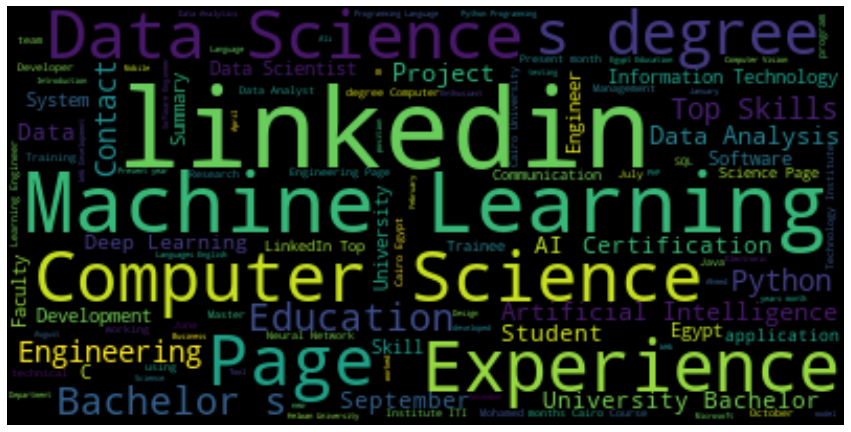

In [107]:
wc  = WordCloud().generate(cleanedSentences)
plt.figure(figsize =(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    all_resumes[i]= le.fit_transform(all_resumes[i])

In [109]:
all_resumes

,Category,Resume,cleaned_resume
0,7,EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY S...,EXPERIENCE 2019 Present VI UAL UNIVERSTY SOFTW...
1,7,EXPERIENCE 2019 - Present VIRTUAL UNIVERSTY S...,EXPERIENCE 2019 Present VI UAL UNIVERSTY SOFTW...
2,7,...,Cargo Ship Simulator City Cargo Transport Gam...
3,7,Curriculum vitae Azam Ali 04/07/2010–31/05/2...,Curriculum vitae Azam Ali 04 07 2010 31 05 201...
4,7,• Tools: Visual Studio Code / Sublime Text /Ec...,Tools Visual Studio Code Sublime Text Eclipse...
...,...,...,...
957,27,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,27,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,27,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,27,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


In [111]:
requiredText = all_resumes['cleaned_resume'].values
requiredtarget = all_resumes['Category'].values
requiredtarget

array([ 7,  7,  7, ..., 27, 27, 27])

In [112]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [113]:
X_train,X_test,Y_train,Y_test = train_test_split(WordFeatures,requiredtarget,random_state=0, test_size=0.2)

In [114]:
X_train.shape

(948, 1500)

In [115]:
X_test.shape

(237, 1500)

In [116]:

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train,Y_train)
prediction = model.predict(X_test)


In [117]:
print('accuracy of KNNeighbors Classifier on training set :{:.2f}'.format(model.score(X_train,Y_train)))
print('accracy of KNeighbors Classifier on test set :{:.2f}'.format(model.score(X_test,Y_test)))

accuracy of KNNeighbors Classifier on training set :0.83
accracy of KNeighbors Classifier on test set :0.76


In [118]:
print('\n Classification report for classifier %s: \n%s\n'% (model,metrics.classification_report(Y_test,prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()): 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         8
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      0.26      0.41        35
           8       1.00      0.23      0.38        13
           9       1.00      0.82      0.90        11
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         7
          13       1.00      0.78      0.88         9
          14       1.00      0.64      0.78        11
          15       1.00      0.25      0